*Lucas De Vrieze - r0665032*

The dataset of this analysis is generated from a SMC3 TF-chip-seq experiment. According to NCBI Gene, SMC3 (structural maintenance of chromosomes 3) is a component of the multimeric cohesin complex that is crucial to hold together the sister chromatids during mitosis. It is ubiquitously expressed in many tissues and has a major role in the formation of open chromatin loops as well. The cohesin complex interacts with the CTCF protein to isolate these loops from the neighbouring sequences, as shown in the picture below. Chromatin loops often increase the transcription of a certain gene as it increases contact with a distant enhancer sequence. As such, these CTCF-SMC3 couples could indirectly indicate which genes have the potential to be actively transcribed.

Some studies supporting this claim:
- https://doi.org/10.1016/j.celrep.2020.108315
- http://dx.doi.org/10.1016/j.molcel.2015.09.023

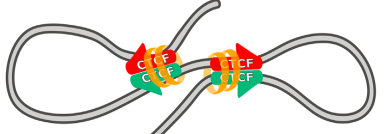
The orange loops represent the cohesin complex.
Figure extracted from the second study above.

Checking the known interaction partners of SMC3 in the NCBI Gene database returns a large list of proteins. For example, reads of the FEZ1 and the MXD1 gene should be enriched here.

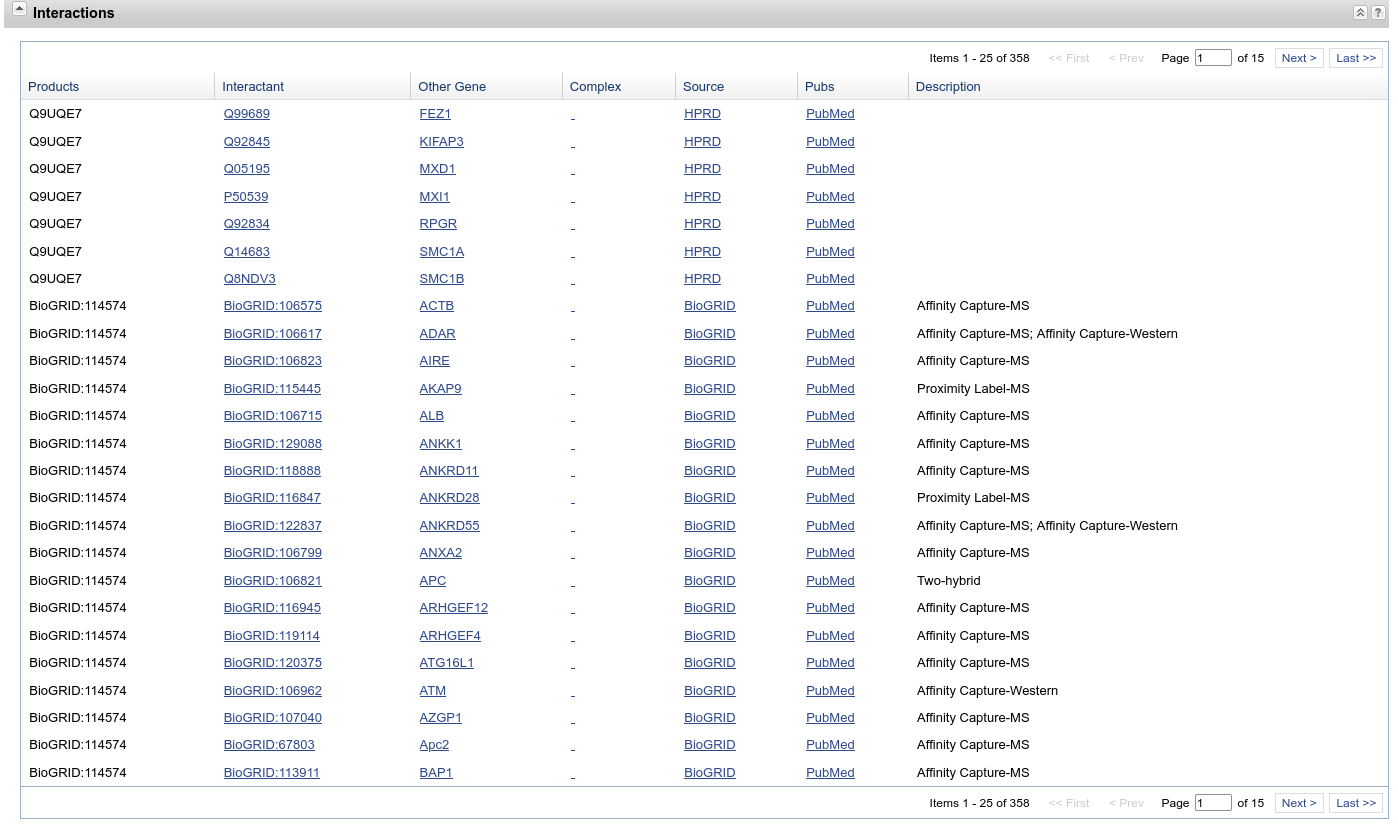

The dataset is downloaded from the ENCODE project with accession number ENCSR404BPV. It concerns a SMC3 TF-chip-seq of '*Homo sapiens* male embryo neural in vitro differentiated cells originated from H1.'
I have taken here the data for biological replicate nr. 2.
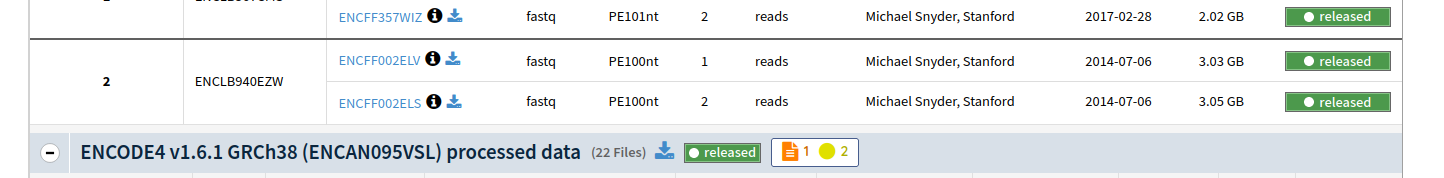
The associated link to the GEO leads to this record.
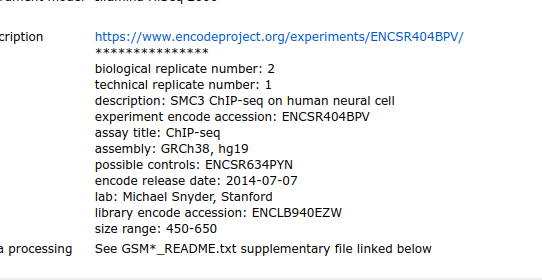
which links to this paired-end reads dataset in the SRA.
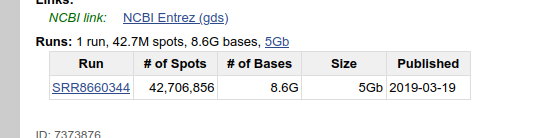

ENCODE also conveniently provides the **control data** for this experiment.
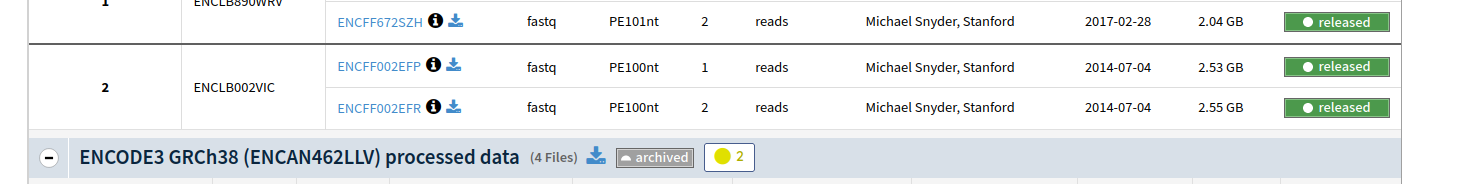
In GEO
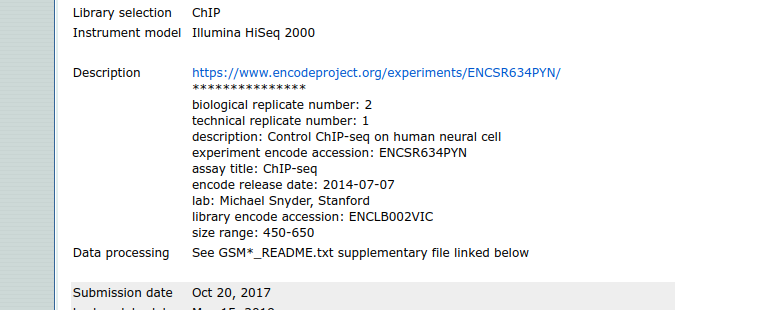
and in the SRA
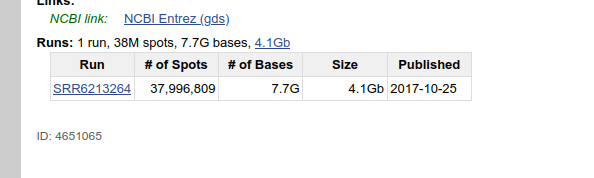

So, SRA records SRR8660344 and SRR6213264 were downloaded using `fastq-dump`.
For convenience, the files were renamed `T` for the Test data and `C` for the Control data. The `--split-files` check was set, which resulted in separate files for both read strands (`_rev` for the reverse read).

In [1]:
cd /mnt/storage/$USER/jupyternotebooks/assignment2
mkdir -p bash
cd bash

In [2]:
dir

C.fastq  C_rev.fastq  T.fastq  T_rev.fastq


In [3]:
wc -l T.fastq
wc -l T_rev.fastq
wc -l C.fastq
wc -l C_rev.fastq

170827424 T.fastq
170827424 T_rev.fastq
151987236 C.fastq
151987236 C_rev.fastq


Number of lines is OK (control sample contains about 38M spots and treatment sample about 42.5M). So, times 4, this makes the numbers above. The files appear to be splitted well as well.

In [4]:
head T.fastq
head T_rev.fastq
head C.fastq
head C_rev.fastq

@SRR8660344.1 MONK:343:C3L2YACXX:7:1101:1445:2119 length=100
CNCAGCCAATATCATACTGAATGGGCAAAAGCTGGAAGCATTCCCTTTGAAAACCAGCACGAGACAAGGATGCCCTCTCTCACCACTCATATTCAACATA
+SRR8660344.1 MONK:343:C3L2YACXX:7:1101:1445:2119 length=100
C#1ADDFFHGHHHIHIJHIHJJEHIGIIJCHIJJIIHEHGIJGIJEHJJGHGHGIIDGIGGGHJJHHFDDBDFFEEDEDDDDDDDDDDDDDEEFEEDDDD
@SRR8660344.2 MONK:343:C3L2YACXX:7:1101:1432:2167 length=100
CATCTTATCTACAGCATCTTATTGCTGCAGTCCTAAAGAAGGAATAATTTTTTTTGTCGGGTTATTTTAGAAAGTCCTTGAGACAGTCTTTATCTCAGAT
+SRR8660344.2 MONK:343:C3L2YACXX:7:1101:1432:2167 length=100
CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJIJJJJJJJHJJJIJIJJJJJJJJJJJHHIHH?DFFEEEEEEDDDC@CDDDDDDDDDCDDEDDDDDDDDDD
@SRR8660344.3 MONK:343:C3L2YACXX:7:1101:1451:2196 length=100
CAGGCTCCCGCCAGCACACCCGGCTAATTTTTCTGTATTTTTTAGTAGAGATGGGGTTTCACTATGTTGCCCAGGCTGGTTTTGAACTCCTGGCCTCAAG
@SRR8660344.1 MONK:343:C3L2YACXX:7:1101:1445:2119 length=102
GTGCTGAAGTTGCTTATCAGCTTAAGGAGTTTTTGGGATGAGAAGATGGGGTTTTCAAAATATACAATCTTGTCATCTGCAAACAGAGAAAGTTTGGCTTCT
+SRR8660344.1 MONK:343:C3L

Fastq files look OK. Accession numbers are corresponding with the ones requested.

## FastQC

In [5]:
mkdir -p fastqc
/usr/bin/fastqc -o ./fastqc T.fastq T_rev.fastq C.fastq C_rev.fastq

Started analysis of T.fastq
Approx 5% complete for T.fastq
Approx 10% complete for T.fastq
Approx 15% complete for T.fastq
Approx 20% complete for T.fastq
Approx 25% complete for T.fastq
Approx 30% complete for T.fastq
Approx 35% complete for T.fastq
Approx 40% complete for T.fastq
Approx 45% complete for T.fastq
Approx 50% complete for T.fastq
Approx 55% complete for T.fastq
Approx 60% complete for T.fastq
Approx 65% complete for T.fastq
Approx 70% complete for T.fastq
Approx 75% complete for T.fastq
Approx 80% complete for T.fastq
Approx 85% complete for T.fastq
Approx 90% complete for T.fastq
Approx 95% complete for T.fastq
Analysis complete for T.fastq
Started analysis of T_rev.fastq
Approx 5% complete for T_rev.fastq
Approx 10% complete for T_rev.fastq
Approx 15% complete for T_rev.fastq
Approx 20% complete for T_rev.fastq
Approx 25% complete for T_rev.fastq
Approx 30% complete for T_rev.fastq
Approx 35% complete for T_rev.fastq
Approx 40% complete for T_rev.fastq
Approx 45% compl

In [6]:
ls -lt

total 54570948
drwxr-xr-x 2 r0665032 domain users         222 Nov  6 13:26 fastqc
-rw-r--r-- 1 r0665032 domain users 14540503878 Nov  6 13:06 T.fastq
-rw-r--r-- 1 r0665032 domain users 14711331302 Nov  6 13:06 T_rev.fastq
-rw-r--r-- 1 r0665032 domain users 13238411024 Nov  6 13:02 C.fastq
-rw-r--r-- 1 r0665032 domain users 13390398260 Nov  6 13:02 C_rev.fastq


The FastQC does not report any important issues. The per base sequence qualities are acceptable, although decreasing towards the yellow zone at the end of the reads.

Per base sequence quality graph of sample C.
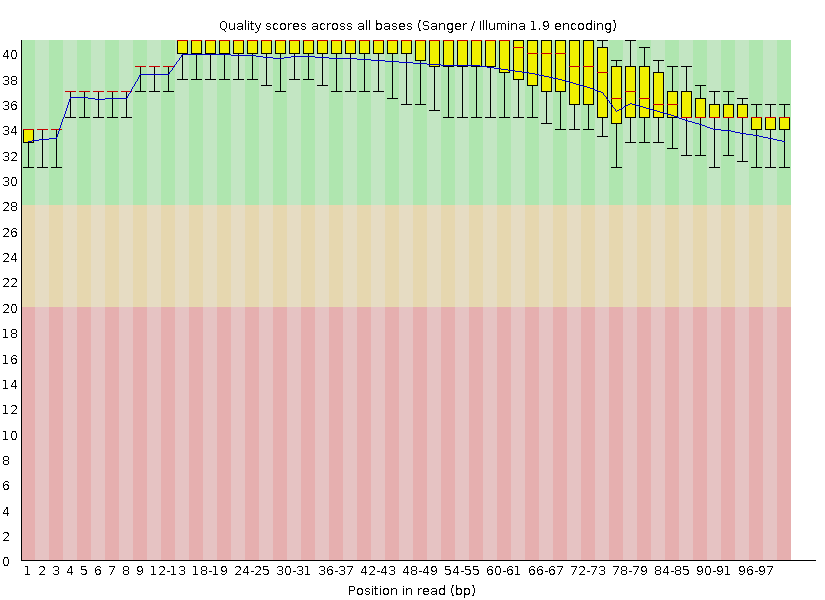

Per base sequence quality graph of sample C_rev.
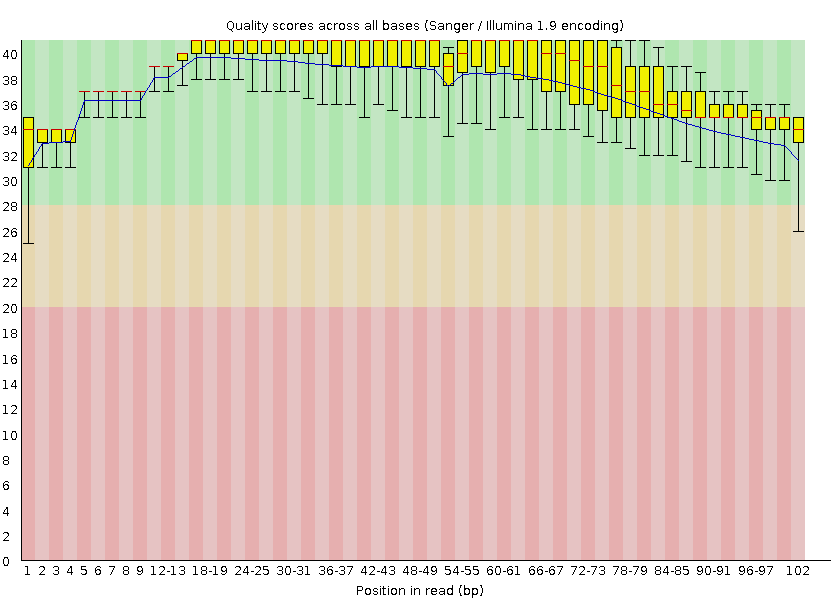

Per base sequence quality graph of sample T.
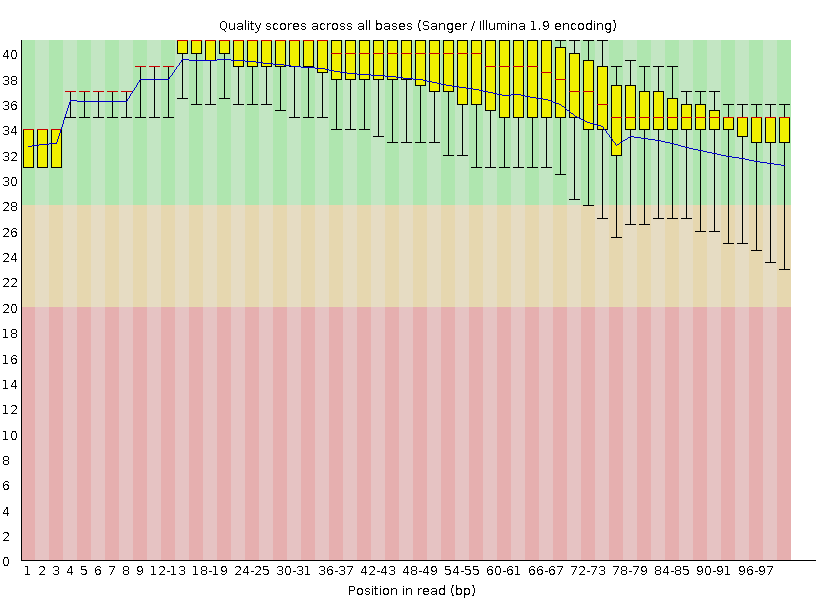

Per base sequence quality graph of sample T_rev.
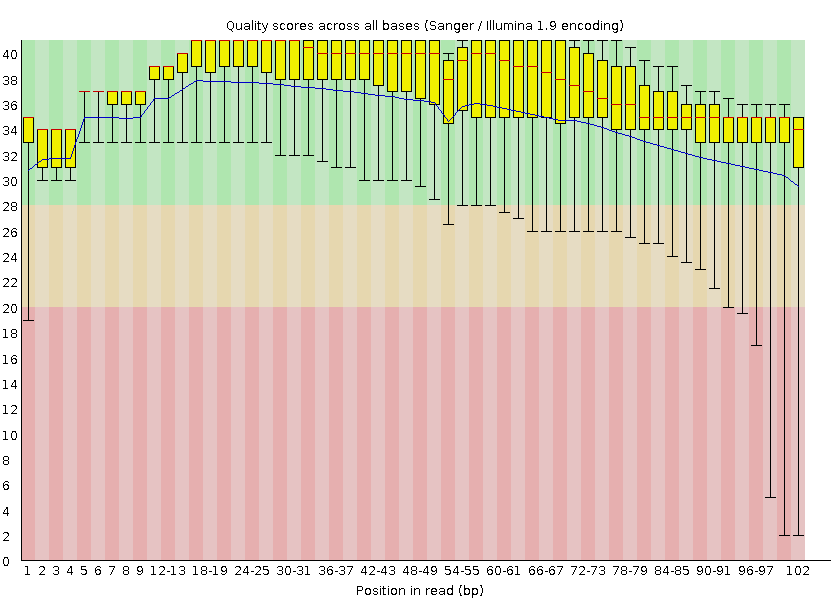

## Mapping with bowtie2

In [7]:
mkdir -p mapping
cd mapping

In [9]:
bowtie2 -x /mnt/storage/data/resources/genomes/hg38/bowtie2/hg38 -1 ../T.fastq -2 ../T_rev.fastq -S T.sam

42706856 reads; of these:
  42706856 (100.00%) were paired; of these:
    3133868 (7.34%) aligned concordantly 0 times
    34933822 (81.80%) aligned concordantly exactly 1 time
    4639166 (10.86%) aligned concordantly >1 times
    ----
    3133868 pairs aligned concordantly 0 times; of these:
      129628 (4.14%) aligned discordantly 1 time
    ----
    3004240 pairs aligned 0 times concordantly or discordantly; of these:
      6008480 mates make up the pairs; of these:
        5492307 (91.41%) aligned 0 times
        333171 (5.55%) aligned exactly 1 time
        183002 (3.05%) aligned >1 times
93.57% overall alignment rate


Good mapping statistics: 93.6 % alignment rate

In [11]:
ls -l T.*

-rw-r--r-- 1 r0665032 domain users 28231748013 Nov  7 16:01 T.sam


In [12]:
head -50 T.sam

@HD	VN:1.0	SO:unsorted
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173
@SQ	SN:chr14_KI270722v1_random	LN:194050
@SQ	SN:chr14_GL000194v1_random	LN:191469
@SQ	SN:chr14_KI270723v1_random	LN:38115
@SQ	SN:chr14_KI270724v1_random	LN:39555
@SQ	SN:chr14_KI270725v1_random	LN:172810
@SQ	SN:chr14_KI270726v1_random	LN:43739
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr15_KI270727v1_random	LN:448248
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr16_KI270728v1_random	LN:1872759
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr17_GL000205v2_random	LN:185591
@SQ	SN:chr17_KI270729v1_random	LN:280839
@SQ	SN:chr17_KI270730v1_random	LN:112551
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr1_KI270706v1_random	LN:175055
@SQ	SN:chr1_KI270707v1_random	LN:32032
@SQ	SN:chr1_KI270708v1_random	LN:127682
@SQ	S

In [13]:
bowtie2 -x /mnt/storage/data/resources/genomes/hg38/bowtie2/hg38 -1 ../C.fastq -2 ../C_rev.fastq -S C.sam

37996809 reads; of these:
  37996809 (100.00%) were paired; of these:
    655378 (1.72%) aligned concordantly 0 times
    32600498 (85.80%) aligned concordantly exactly 1 time
    4740933 (12.48%) aligned concordantly >1 times
    ----
    655378 pairs aligned concordantly 0 times; of these:
      50317 (7.68%) aligned discordantly 1 time
    ----
    605061 pairs aligned 0 times concordantly or discordantly; of these:
      1210122 mates make up the pairs; of these:
        810241 (66.96%) aligned 0 times
        239282 (19.77%) aligned exactly 1 time
        160599 (13.27%) aligned >1 times
98.93% overall alignment rate


Even better mapping statistics: 98.9 % alignment rate

In [14]:
ls -l C.*

-rw-r--r-- 1 r0665032 domain users 25455487243 Nov  7 21:50 C.sam


In [15]:
head -50 C.sam

@HD	VN:1.0	SO:unsorted
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173
@SQ	SN:chr14_KI270722v1_random	LN:194050
@SQ	SN:chr14_GL000194v1_random	LN:191469
@SQ	SN:chr14_KI270723v1_random	LN:38115
@SQ	SN:chr14_KI270724v1_random	LN:39555
@SQ	SN:chr14_KI270725v1_random	LN:172810
@SQ	SN:chr14_KI270726v1_random	LN:43739
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr15_KI270727v1_random	LN:448248
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr16_KI270728v1_random	LN:1872759
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr17_GL000205v2_random	LN:185591
@SQ	SN:chr17_KI270729v1_random	LN:280839
@SQ	SN:chr17_KI270730v1_random	LN:112551
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr1_KI270706v1_random	LN:175055
@SQ	SN:chr1_KI270707v1_random	LN:32032
@SQ	SN:chr1_KI270708v1_random	LN:127682
@SQ	S

## Sorting and indexing

In [16]:
samtools sort -o T.bam T.sam

[bam_sort_core] merging from 30 files and 1 in-memory blocks...


In [17]:
samtools sort -o C.bam C.sam

[bam_sort_core] merging from 26 files and 1 in-memory blocks...


In [18]:
ls -l [CT].bam

-rw-r--r-- 1 r0665032 domain users 5797015556 Nov  7 22:35 C.bam
-rw-r--r-- 1 r0665032 domain users 6533484765 Nov  7 22:14 T.bam


In [19]:
samtools index T.bam

In [20]:
samtools index C.bam

In [3]:
ls -l [CT].bam.bai

-rw-r--r-- 1 r0665032 domain users 2513408 Nov  7 22:38 C.bam.bai
-rw-r--r-- 1 r0665032 domain users 2877224 Nov  7 22:36 T.bam.bai


In [22]:
samtools flagstat C.bam

75993618 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
75183377 + 0 mapped (98.93% : N/A)
75993618 + 0 paired in sequencing
37996809 + 0 read1
37996809 + 0 read2
74682862 + 0 properly paired (98.28% : N/A)
74882212 + 0 with itself and mate mapped
301165 + 0 singletons (0.40% : N/A)
95148 + 0 with mate mapped to a different chr
63174 + 0 with mate mapped to a different chr (mapQ>=5)


Mapped percentage corresponds with the bowtie statistic. Almost everything of the mapped reads are properly paired. It's fine.

In [23]:
samtools flagstat T.bam

85413712 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
79921405 + 0 mapped (93.57% : N/A)
85413712 + 0 paired in sequencing
42706856 + 0 read1
42706856 + 0 read2
79145976 + 0 properly paired (92.66% : N/A)
79506294 + 0 with itself and mate mapped
415111 + 0 singletons (0.49% : N/A)
77930 + 0 with mate mapped to a different chr
44213 + 0 with mate mapped to a different chr (mapQ>=5)


Same conclusion here.

In [24]:
samtools idxstats C.bam

chr1	248956422	6022113	17828
chr10	133797422	3374337	14881
chr11	135086622	3364288	9492
chr11_KI270721v1_random	100316	607	3
chr12	133275309	3411613	10192
chr13	114364328	2725612	8785
chr14	107043718	2324227	6654
chr14_GL000009v2_random	201709	8462	22
chr14_GL000225v1_random	211173	31240	3238
chr14_KI270722v1_random	194050	4880	19
chr14_GL000194v1_random	191469	5591	19
chr14_KI270723v1_random	38115	1221	57
chr14_KI270724v1_random	39555	1395	30
chr14_KI270725v1_random	172810	2391	14
chr14_KI270726v1_random	43739	227	1
chr15	101991189	1952682	5924
chr15_KI270727v1_random	448248	2299	9
chr16	90338345	2006199	8317
chr16_KI270728v1_random	1872759	22587	118
chr17	83257441	1770118	7533
chr17_GL000205v2_random	185591	9460	58
chr17_KI270729v1_random	280839	15665	5223
chr17_KI270730v1_random	112551	1775	282
chr18	80373285	2116872	6139
chr19	58617616	1156775	4854
chr1_KI270706v1_random	175055	4329	14
chr1_KI270707v1_random	32032	628	1
chr1_KI270708v1_random	127682	2335	11
chr1_KI270709v1_random	6

chr21_KI270873v1_alt	143900	2048	4
chr21_GL383579v2_alt	201197	2982	8
chr21_GL383580v2_alt	74653	997	1
chr21_GL383581v2_alt	116689	1380	8
chr21_KI270872v1_alt	82692	822	1
chr22_KI270875v1_alt	259914	2236	4
chr22_KI270878v1_alt	186262	2006	6
chr22_KI270879v1_alt	304135	2971	16
chr22_KI270876v1_alt	263666	3963	4
chr22_KI270877v1_alt	101331	860	4
chr22_GL383583v2_alt	96924	951	3
chr22_GL383582v2_alt	162811	1322	5
chrX_KI270880v1_alt	284869	1534	14
chrX_KI270881v1_alt	144206	1120	3
chr19_KI270882v1_alt	248807	45	0
chr19_KI270883v1_alt	170399	97	0
chr19_KI270884v1_alt	157053	52	0
chr19_KI270885v1_alt	171027	65	0
chr19_KI270886v1_alt	204239	34	0
chr19_KI270887v1_alt	209512	72	0
chr19_KI270888v1_alt	155532	64	0
chr19_KI270889v1_alt	170698	64	0
chr19_KI270890v1_alt	184499	32	0
chr19_KI270891v1_alt	170680	75	0
chr1_KI270892v1_alt	162212	1218	6
chr2_KI270894v1_alt	214158	7548	81
chr2_KI270893v1_alt	161218	1236	2
chr3_KI270895v1_alt	162896	458	2
chr4_KI270896v1_alt	378547	3674	43
chr5_KI270897v1_

In [25]:
samtools idxstats T.bam

chr1	248956422	6875212	29829
chr10	133797422	3727962	21131
chr11	135086622	3918896	16687
chr11_KI270721v1_random	100316	2468	9
chr12	133275309	3675552	16077
chr13	114364328	2517054	11422
chr14	107043718	2491543	10744
chr14_GL000009v2_random	201709	6428	29
chr14_GL000225v1_random	211173	33729	3815
chr14_KI270722v1_random	194050	3460	31
chr14_GL000194v1_random	191469	4295	27
chr14_KI270723v1_random	38115	1028	56
chr14_KI270724v1_random	39555	1437	39
chr14_KI270725v1_random	172810	1647	18
chr14_KI270726v1_random	43739	190	2
chr15	101991189	2250031	9776
chr15_KI270727v1_random	448248	1706	15
chr16	90338345	2507672	12652
chr16_KI270728v1_random	1872759	16716	110
chr17	83257441	2482777	12812
chr17_GL000205v2_random	185591	12061	102
chr17_KI270729v1_random	280839	14031	5094
chr17_KI270730v1_random	112551	1676	297
chr18	80373285	2078767	9103
chr19	58617616	1758811	8939
chr1_KI270706v1_random	175055	3325	17
chr1_KI270707v1_random	32032	538	1
chr1_KI270708v1_random	127682	1933	8
chr1_KI270709v1_

chr21_KI270874v1_alt	166743	1658	6
chr21_KI270873v1_alt	143900	2005	5
chr21_GL383579v2_alt	201197	1964	9
chr21_GL383580v2_alt	74653	2538	4
chr21_GL383581v2_alt	116689	1612	7
chr21_KI270872v1_alt	82692	1153	4
chr22_KI270875v1_alt	259914	2975	15
chr22_KI270878v1_alt	186262	3190	12
chr22_KI270879v1_alt	304135	5551	25
chr22_KI270876v1_alt	263666	4248	26
chr22_KI270877v1_alt	101331	1909	8
chr22_GL383583v2_alt	96924	974	4
chr22_GL383582v2_alt	162811	2675	9
chrX_KI270880v1_alt	284869	2776	20
chrX_KI270881v1_alt	144206	722	11
chr19_KI270882v1_alt	248807	51	0
chr19_KI270883v1_alt	170399	102	0
chr19_KI270884v1_alt	157053	47	0
chr19_KI270885v1_alt	171027	56	0
chr19_KI270886v1_alt	204239	35	1
chr19_KI270887v1_alt	209512	91	1
chr19_KI270888v1_alt	155532	43	1
chr19_KI270889v1_alt	170698	74	1
chr19_KI270890v1_alt	184499	28	0
chr19_KI270891v1_alt	170680	82	0
chr1_KI270892v1_alt	162212	914	4
chr2_KI270894v1_alt	214158	7692	88
chr2_KI270893v1_alt	161218	1863	7
chr3_KI270895v1_alt	162896	558	5
chr4_KI270

Visually checking the distribution of the reads, for example for the FEZ1 gene and the MXD1 gene, two genes interacting with SMC3 (see NCBI table at top of the notebook). These should be enriched in a SMC3 chip-seq.

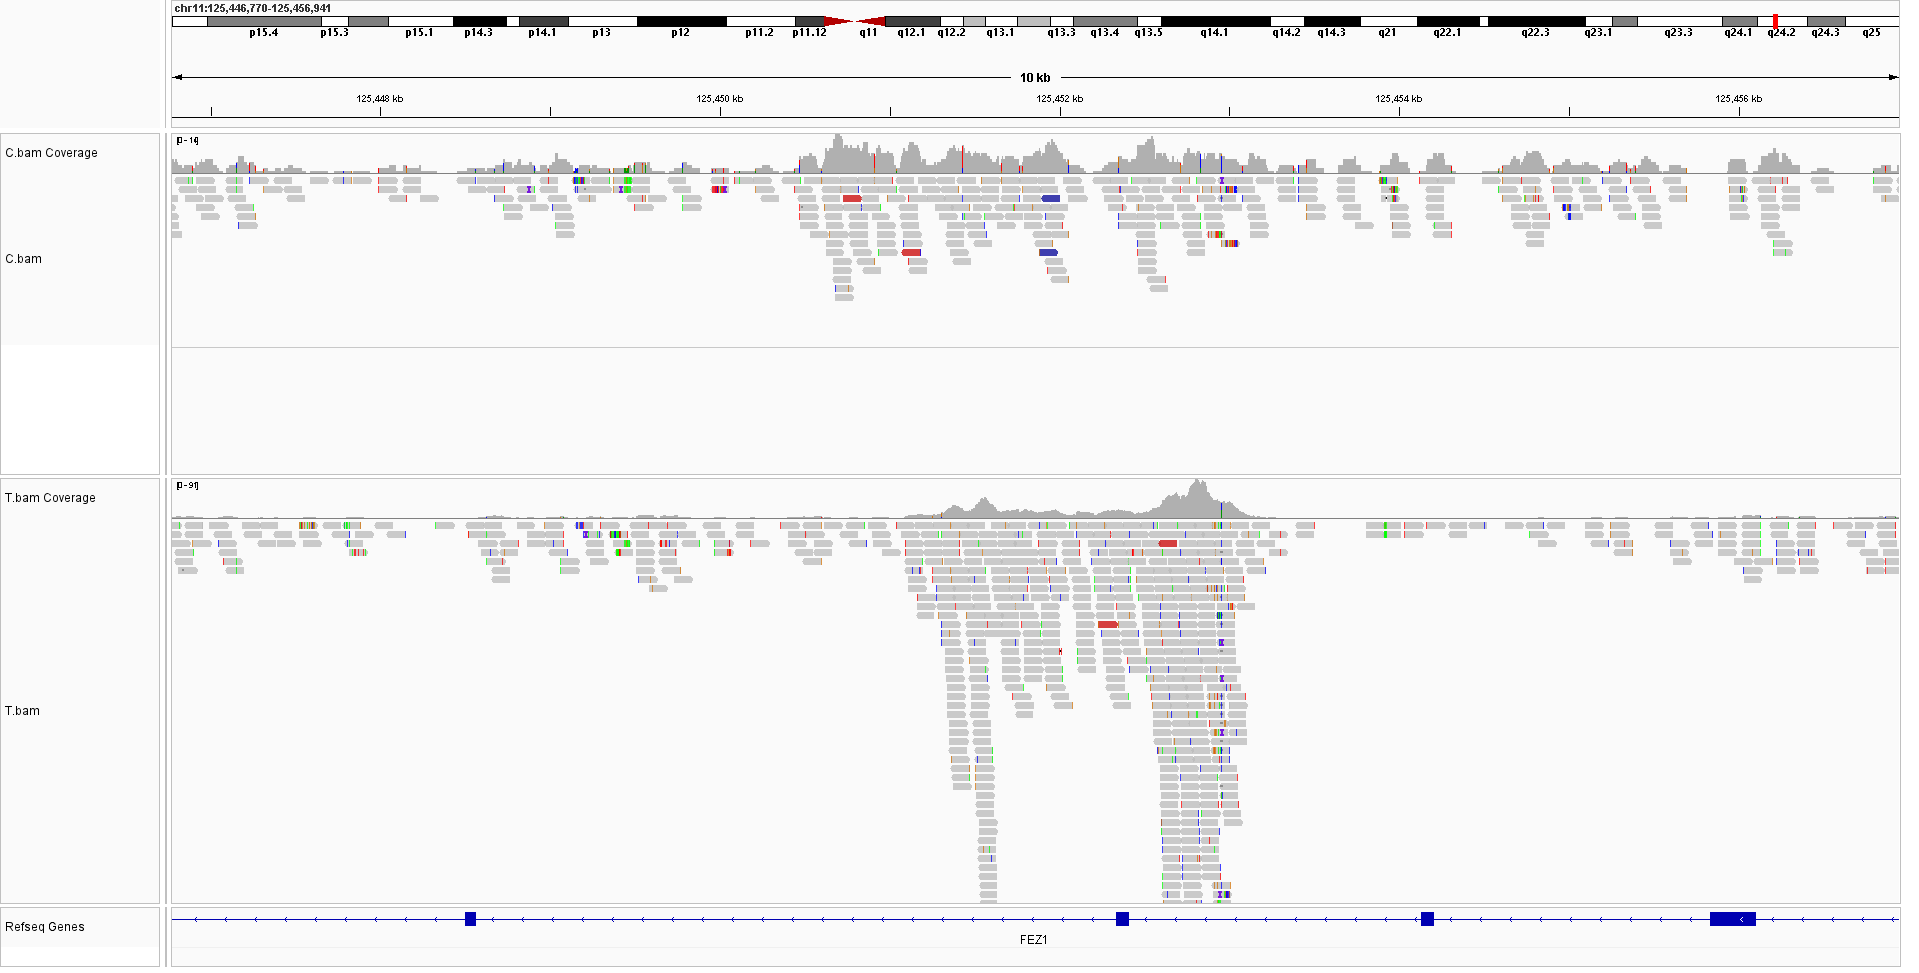

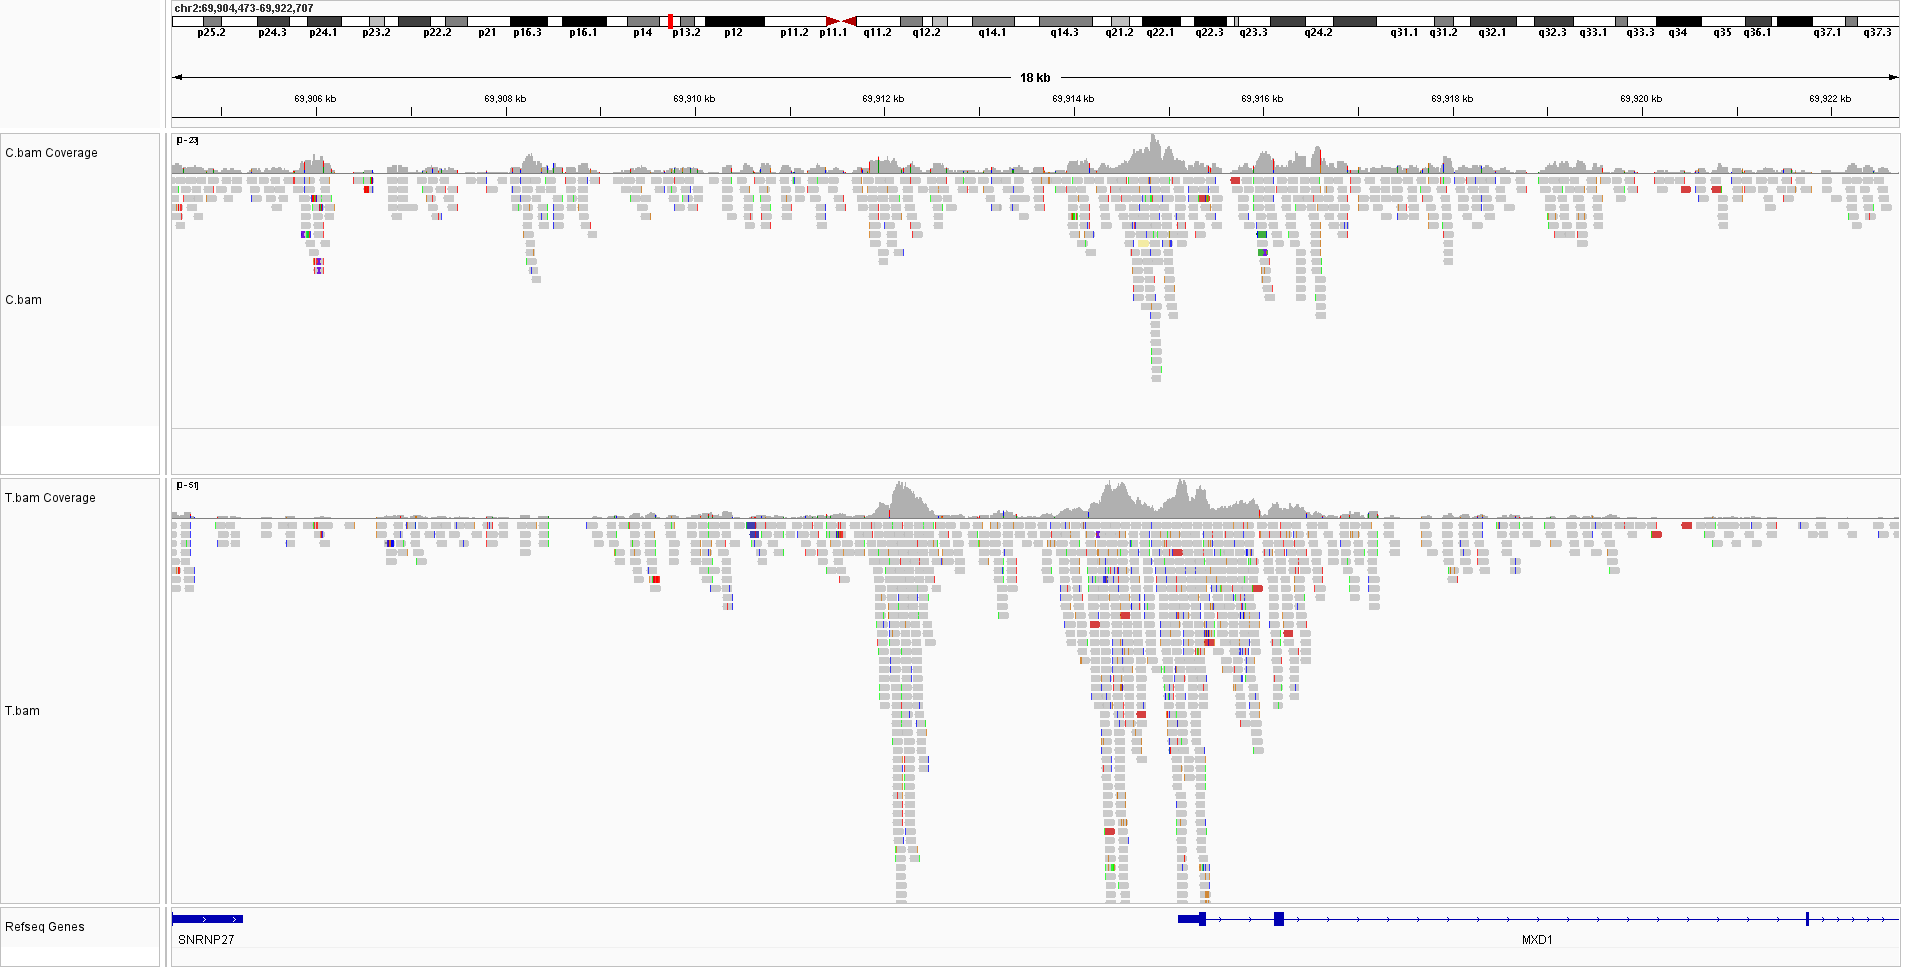

In both cases, there is a nice concentration of reads in the environment of both genes, and the read density is substantially higher than in the control chip-seq data. The SMC3 enrichment has succeeded!

## Coverage plots

In [10]:
bamCoverage -b C.bam -p 20 --normalizeUsing RPGC --effectiveGenomeSize 2913022398 -o C.bw

normalization: 1x (effective genome size 2913022398)
bamFilesList: ['C.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 20
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


In [11]:
bamCoverage -b T.bam -p 20 --normalizeUsing RPGC --effectiveGenomeSize 2913022398 -o T.bw

normalization: 1x (effective genome size 2913022398)
bamFilesList: ['T.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 20
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


Effective genome size from the link in the `bamCoverage` documentation: https://deeptools.readthedocs.io/en/latest/content/feature/effectiveGenomeSize.html

A visual check of the generated BigWig: comparing the BigWig with the coverage plots from the BAM file of IGV .
There is a good correlation between the peaks of both plots. The BigWig has been generated well from the BAM file.

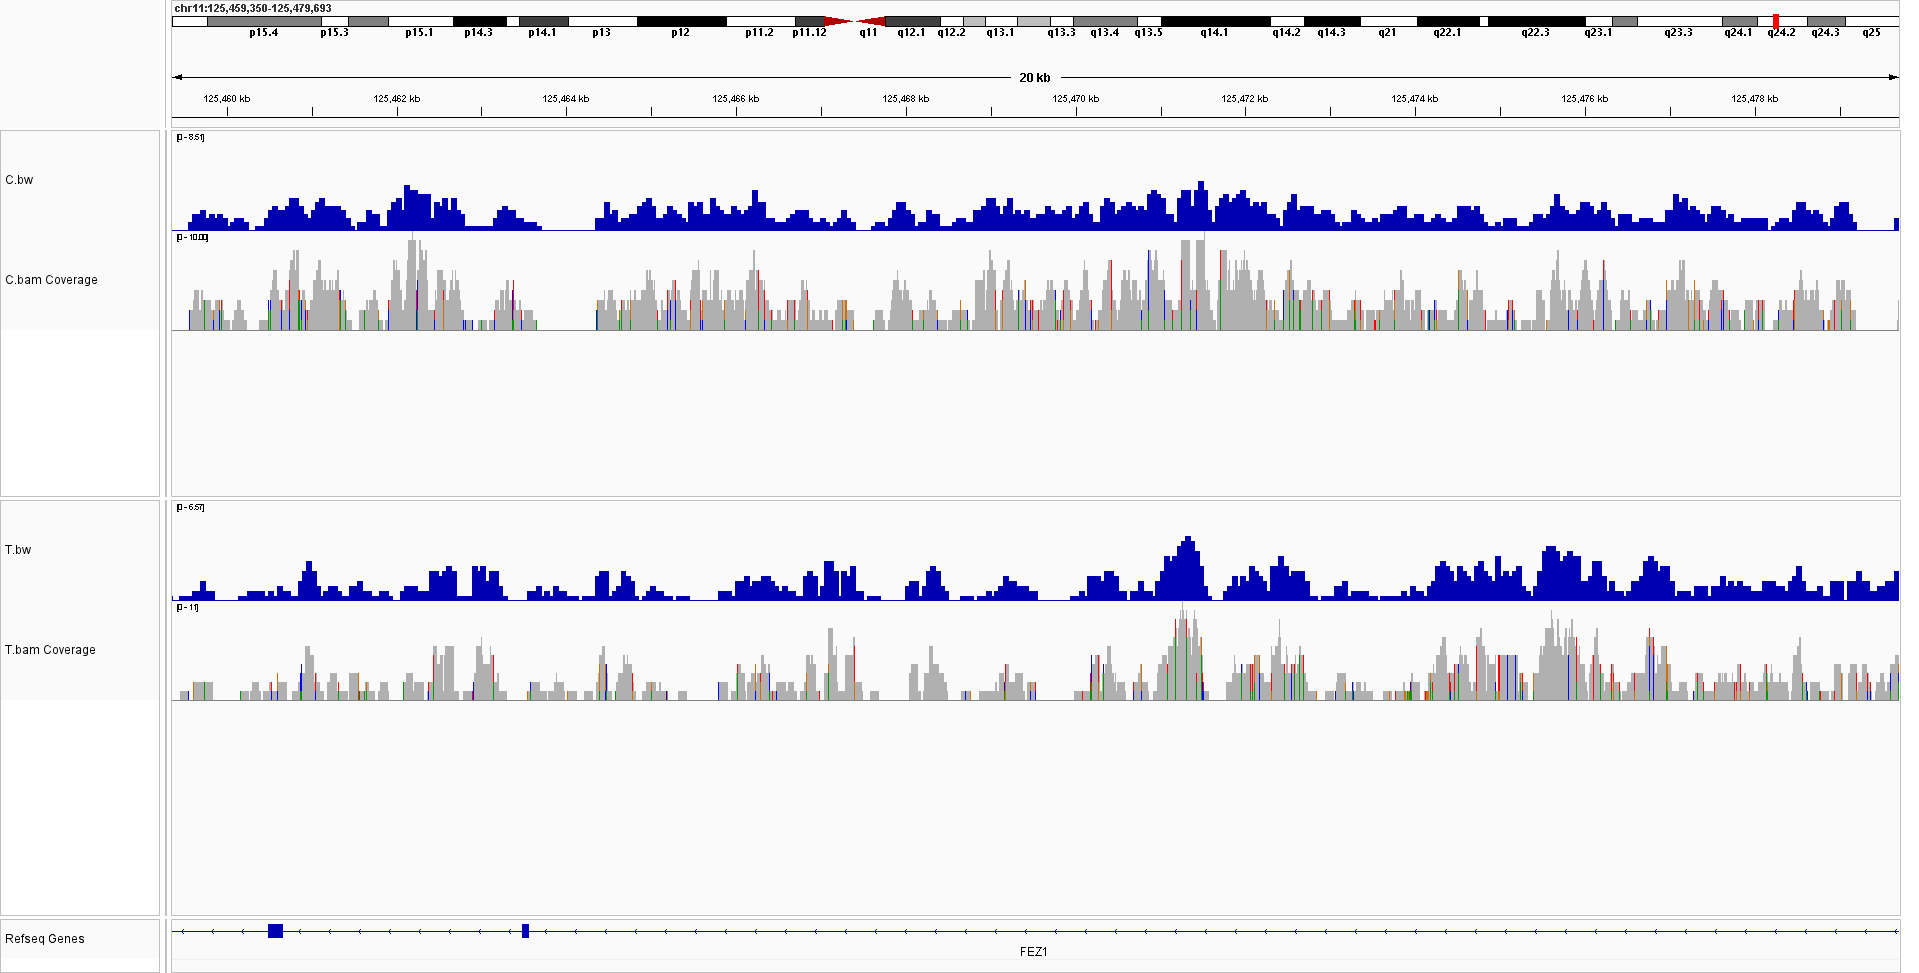

A visual check of the generated BigWig against a BigWig available in ENCODE: accession number ENCFF335XUJ.
To be consistent for this entire analysis: this is the BigWig of biological replicate 2.

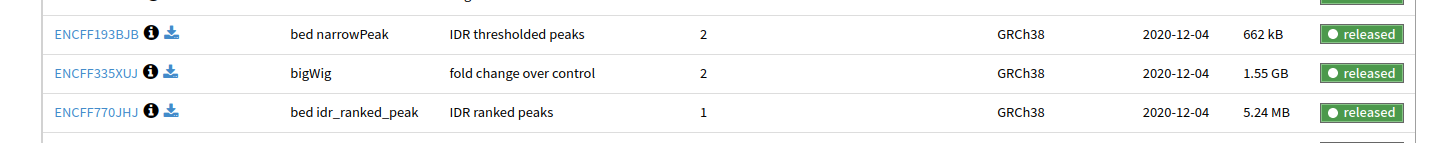

Loading both BigWigs in IGV shows that these correlate. There is a good correspondance with the BAM coverage plot as well. From the plot of the file from ENCODE appears that the ENCODE pipeline applies a smaller bin size: the resolution is finer (smaller intervals, less wide bars). I got a good BigWig here.

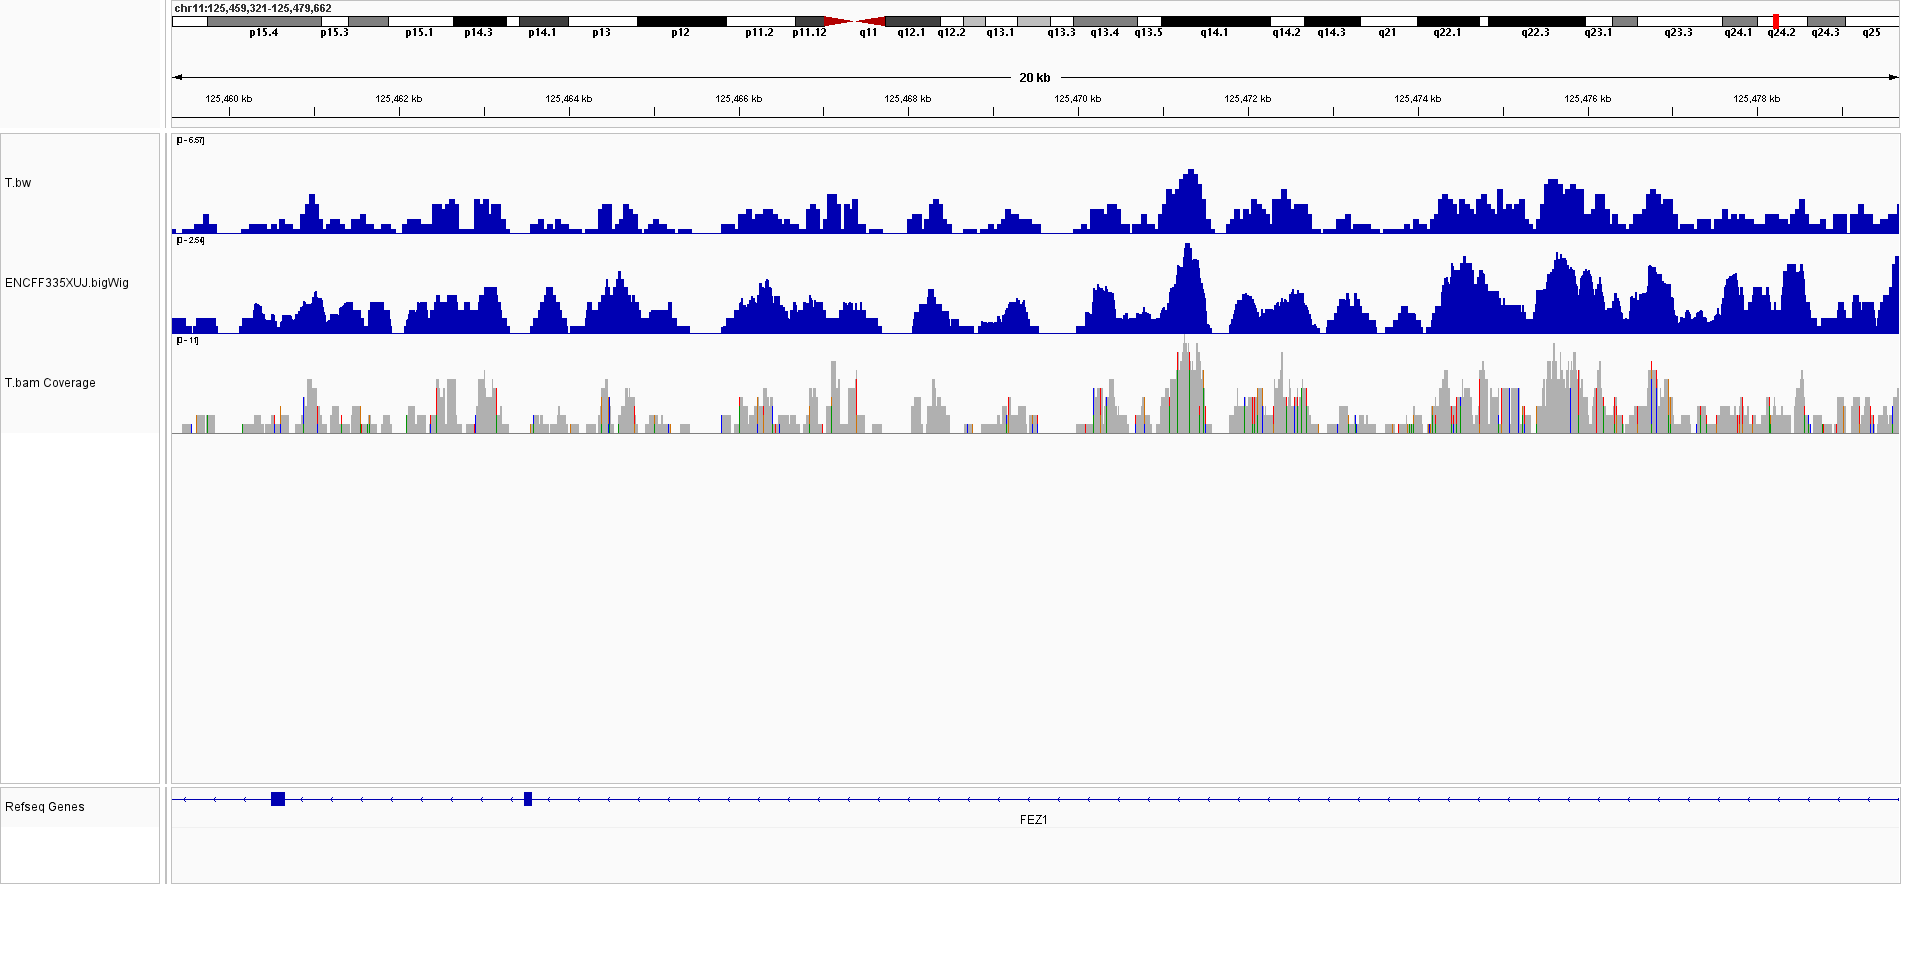

## Peak calling

In [12]:
cd ..

In [13]:
mkdir -p peak_calling

Let's check whether the quality of the data is good enough for peak calling. Due to the binding of SMC3 to the DNA, slightly shifted parts of the sequence are read. This should reflect in the read mapping. Grouping and colouring the reads by read strand in IGV for both samples gives the figure below. Here, I switched to the MXD1 gene.

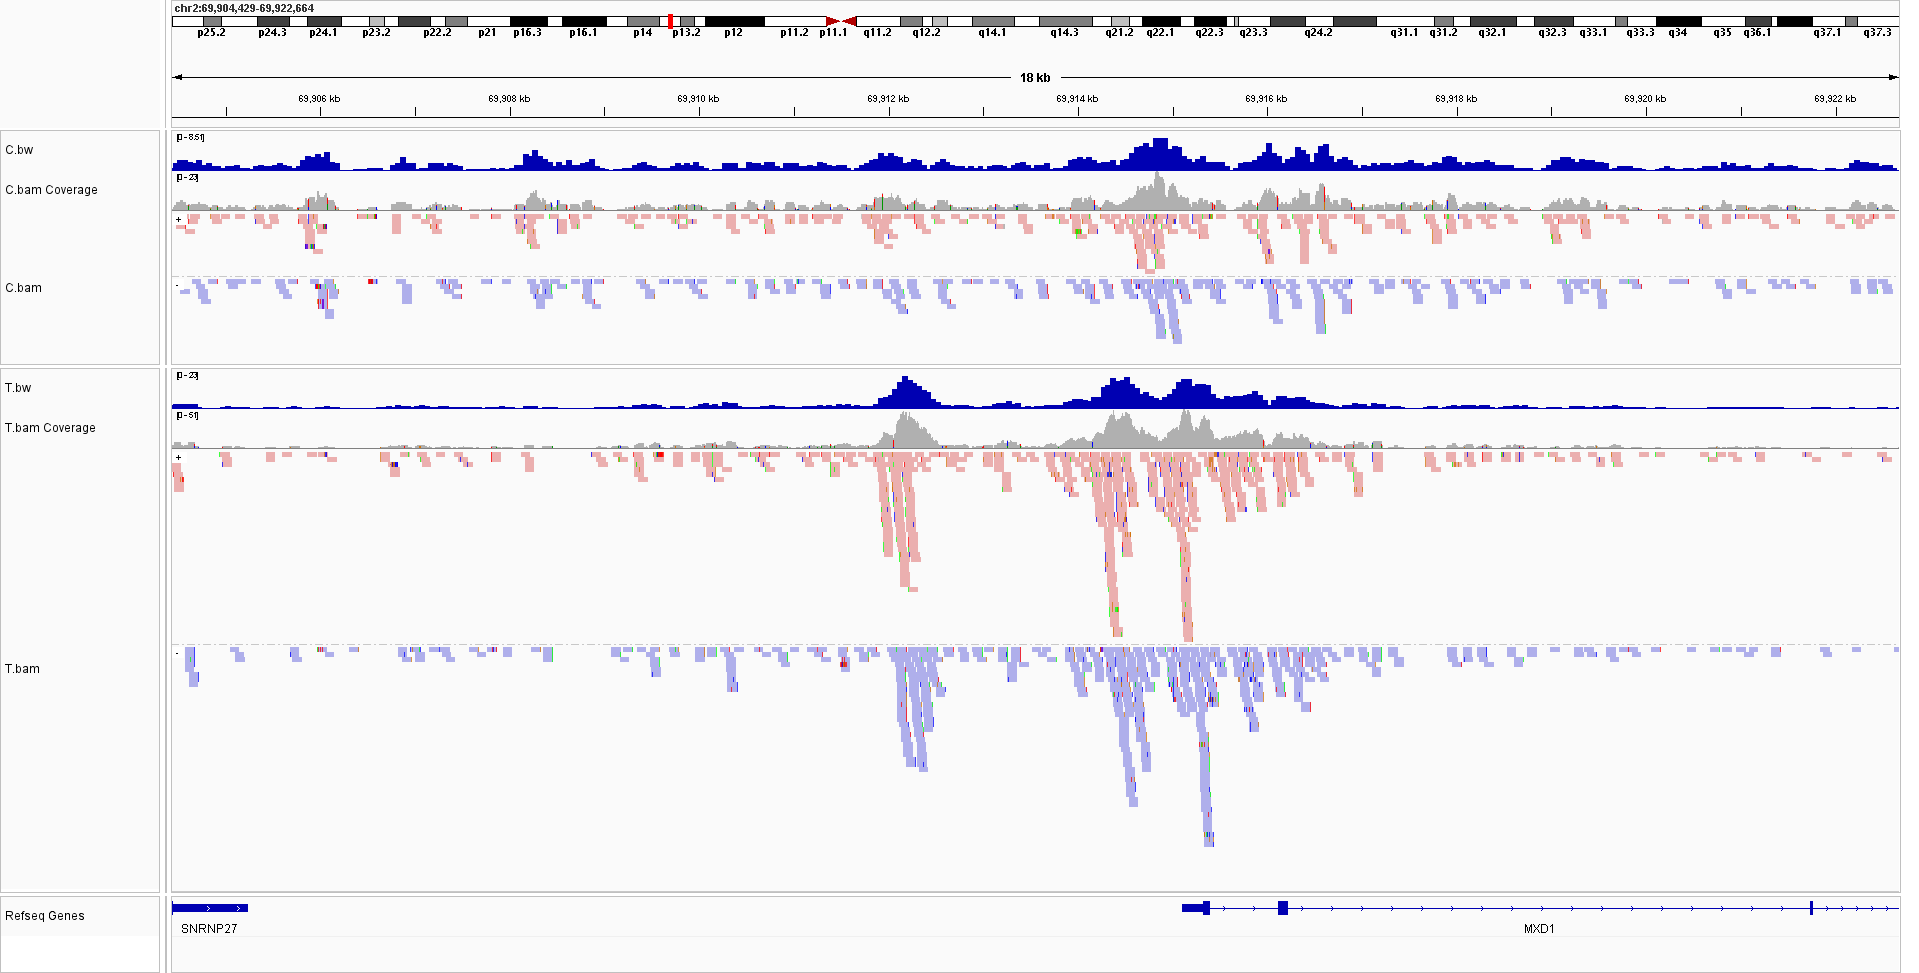

There is a clear shift in reads between forward en reverse strand, which is a go for peak calling.

In [15]:
macs2 callpeak -t ./mapping/T.bam -c ./mapping/C.bam -n SMC3 -g hs --outdir ./peak_calling

INFO  @ Wed, 09 Nov 2022 18:41:54: 
# Command line: callpeak -t ./mapping/T.bam -c ./mapping/C.bam -n SMC3 -g hs --outdir ./peak_calling
# ARGUMENTS LIST:
# name = SMC3
# format = AUTO
# ChIP-seq file = ['./mapping/T.bam']
# control file = ['./mapping/C.bam']
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Wed, 09 Nov 2022 18:41:54: #1 read tag files... 
INFO  @ Wed, 09 Nov 2022 18:41:54: #1 read treatment tags... 
INFO  @ Wed, 09 Nov 2022 18:41:54: Detected format is: BAM 
INFO  @ Wed, 09 Nov 2022 18:41:54: * Input file is gzipped. 
INFO  @ Wed, 09 Nov 2022 18:41:57:  1000000 
INFO 

INFO  @ Wed, 09 Nov 2022 18:48:23:  70000000 
INFO  @ Wed, 09 Nov 2022 18:48:26:  71000000 
INFO  @ Wed, 09 Nov 2022 18:48:28:  72000000 
INFO  @ Wed, 09 Nov 2022 18:48:31:  73000000 
INFO  @ Wed, 09 Nov 2022 18:48:33:  74000000 
INFO  @ Wed, 09 Nov 2022 18:48:36:  75000000 
INFO  @ Wed, 09 Nov 2022 18:48:38: #1 tag size is determined as 101 bps 
INFO  @ Wed, 09 Nov 2022 18:48:38: #1 tag size = 101.0 
INFO  @ Wed, 09 Nov 2022 18:48:38: #1  total tags in treatment: 39572988 
INFO  @ Wed, 09 Nov 2022 18:48:38: #1 user defined the maximum tags... 
INFO  @ Wed, 09 Nov 2022 18:48:38: #1 filter out redundant tags at the same location and the same strand by allowing at most 1 tag(s) 
INFO  @ Wed, 09 Nov 2022 18:48:39: #1  tags after filtering in treatment: 28860087 
INFO  @ Wed, 09 Nov 2022 18:48:39: #1  Redundant rate of treatment: 0.27 
INFO  @ Wed, 09 Nov 2022 18:48:39: #1  total tags in control: 37341431 
INFO  @ Wed, 09 Nov 2022 18:48:39: #1 user defined the maximum tags... 
INFO  @ Wed,

In [17]:
ls -lt ./peak_calling

total 11140
-rw-r--r-- 1 r0665032 domain users 2627108 Nov  9 23:00 SMC3_summits.bed
-rw-r--r-- 1 r0665032 domain users 4072912 Nov  9 23:00 SMC3_peaks.narrowPeak
-rw-r--r-- 1 r0665032 domain users 4598002 Nov  9 23:00 SMC3_peaks.xls
-rw-r--r-- 1 r0665032 domain users   99250 Nov  9 18:48 SMC3_model.r


In [28]:
cd peak_calling

In [19]:
cat SMC3_peaks.narrowPeak | wc -l

53898


Quite a large number, but I'm dealing with an entire genome here.

Checking the peaks for FEZ1 and MXD1 in IGV using the narrowPeak file

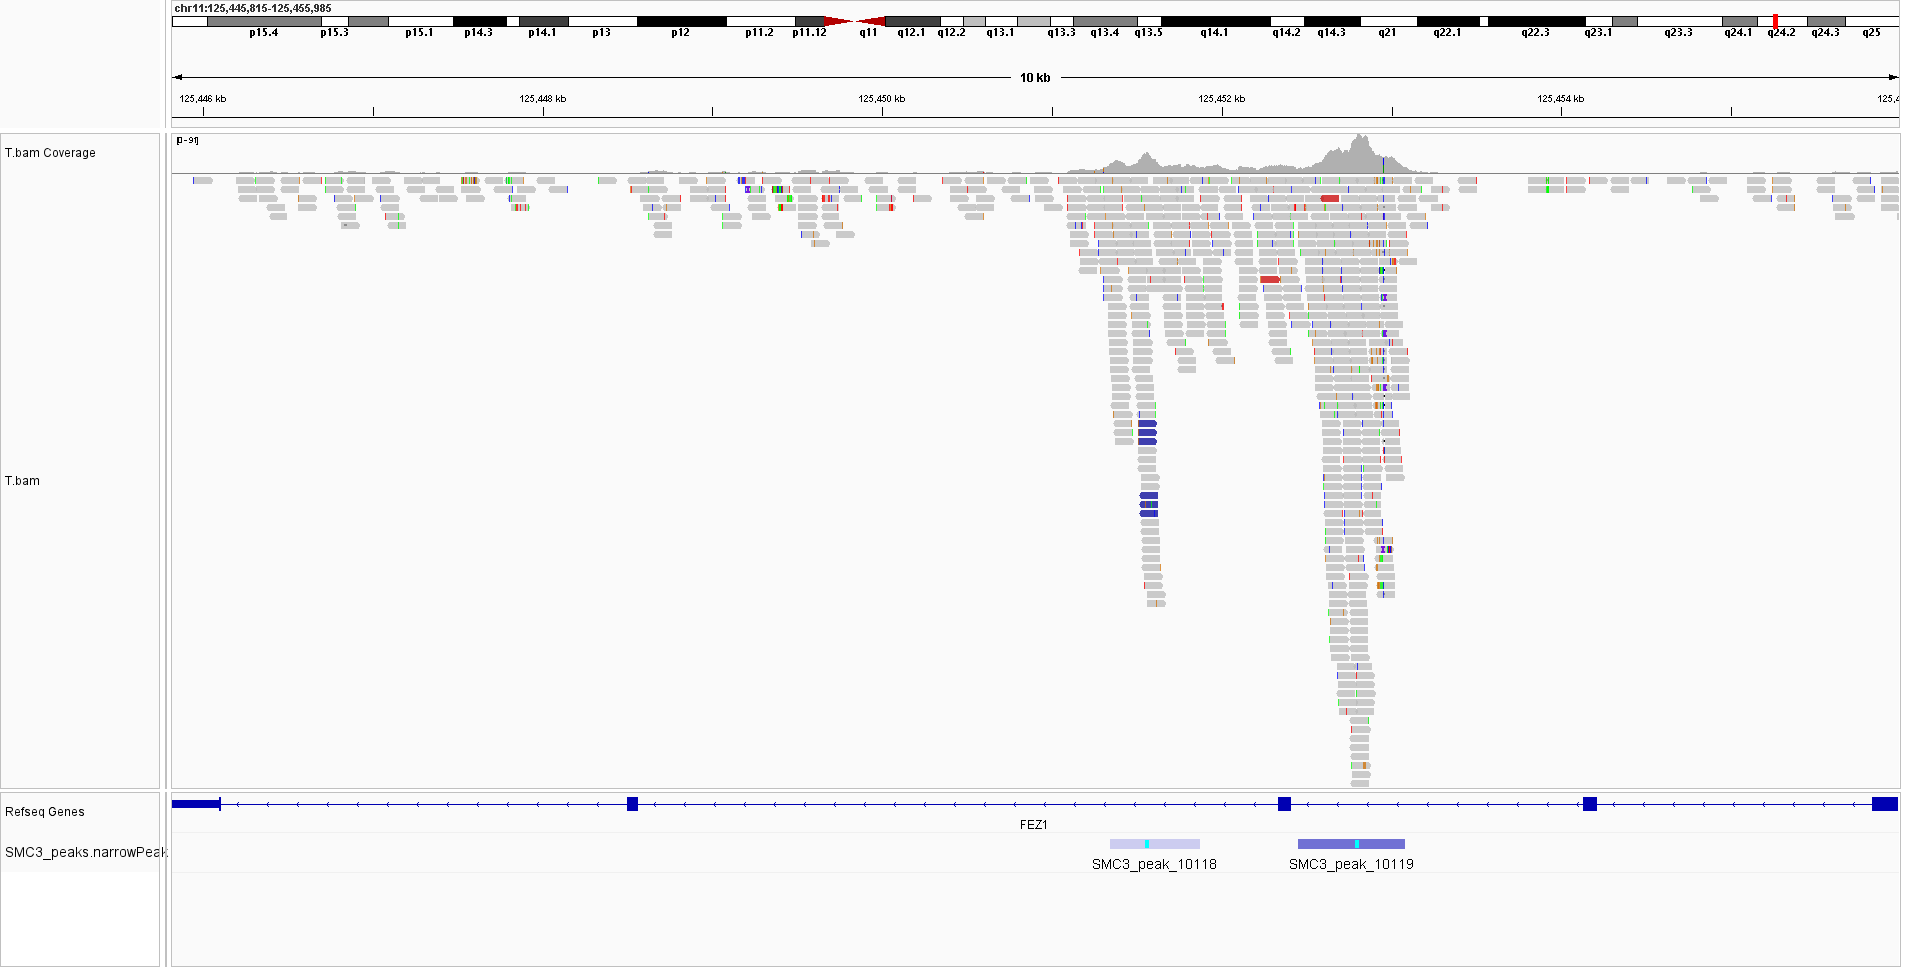

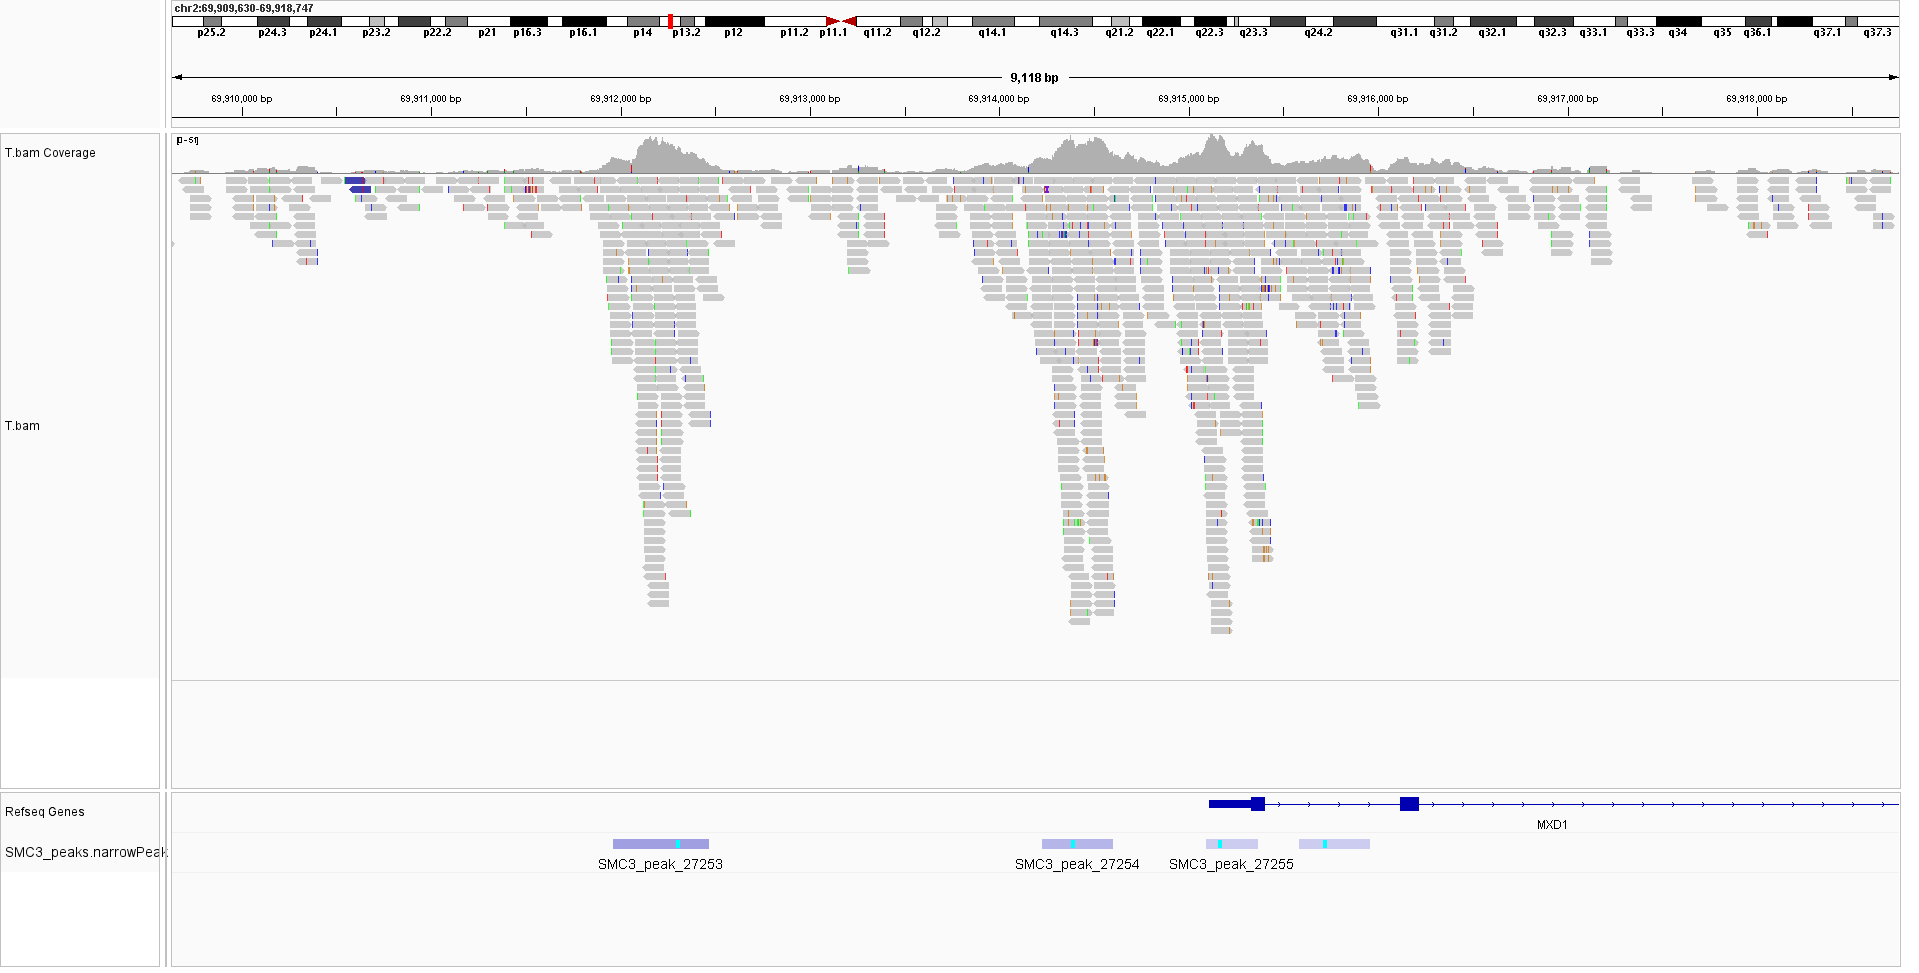

Good, multiple peaks called here! And the summits look good as well!

In [29]:
cat SMC3_peaks.narrowPeak | cut -f 1-3 > SMC3_peaks.bed

In [30]:
cd ..

In [31]:
computeMatrix reference-point \
    -S ./mapping/T.bw \
    -R ./peak_calling/SMC3_peaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out SMC3.tab.gz

In [32]:
plotHeatmap \
    -m SMC3.tab.gz \
    -out SMC3_peaks.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

In [35]:
mv SMC3.tab.gz ./peak_calling/SMC3.tab.gz
mv SMC3_peaks.png ./peak_calling/SMC3_peaks.png

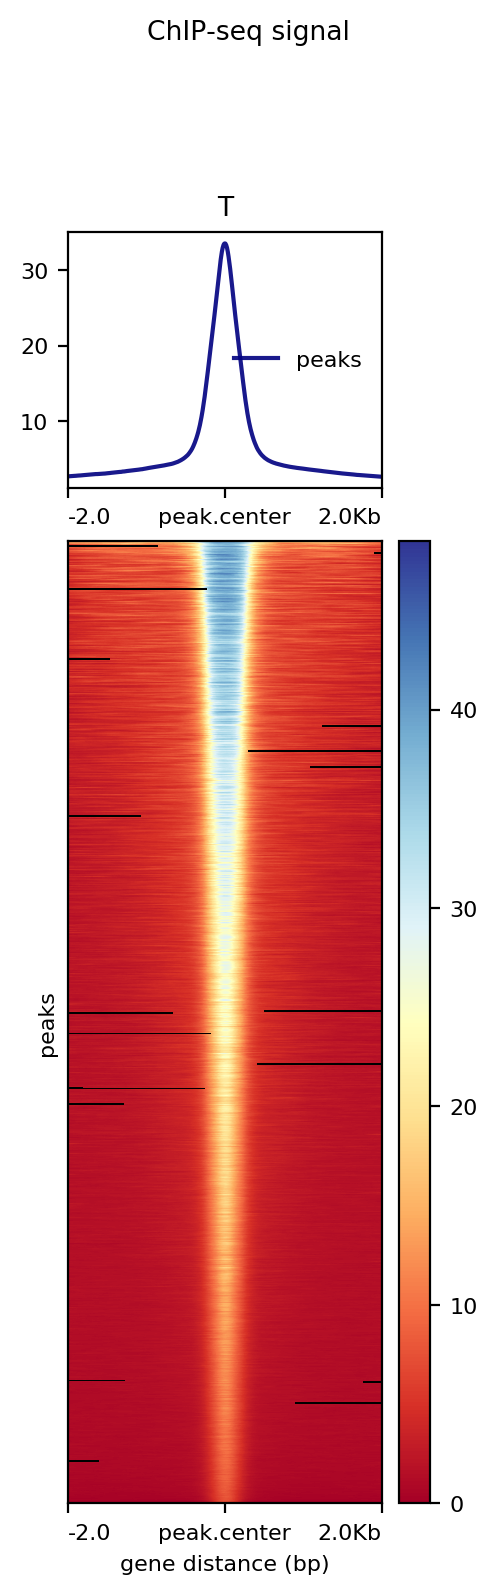

Clear difference! The height of the SMC3 chip-seq peaks is (much) larger than the control chip-seq peaks over the entire genome.

### RSAT de novo motif enrichment discovery

There is no particular motif that sticks out. The reported motifs are all extremely significant (e values smaller than 1e-200) and vary in length and GC-content. My best guess is that, as SMC3 can bind at many places in the genome, it maybe has no strong characteristic motif and only a few bases are critically required to bind.

Anyway, I picked the first motif that has a site distribution curve with a narrow peak around the y axis, i.e. a motif site very close to the peak location. This was motif 6. About 27 % of the peaks is associated with at least one motif site, which seems quite low to me. The mean number of predicted motif sites per peak is close to 1.

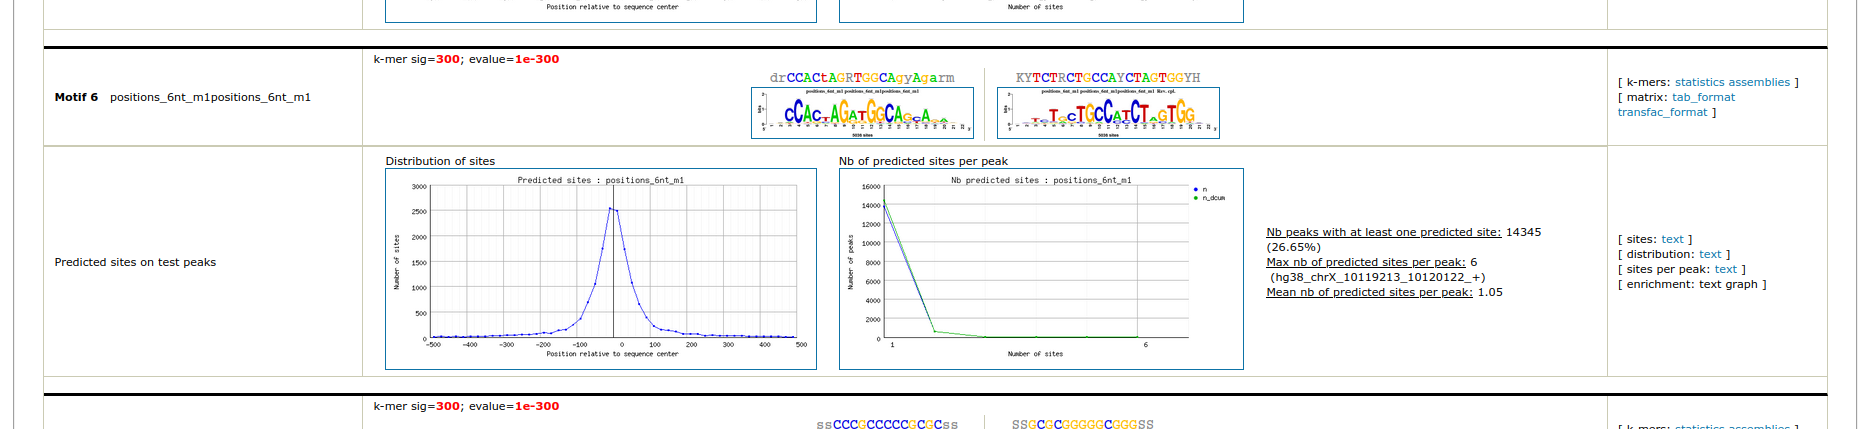

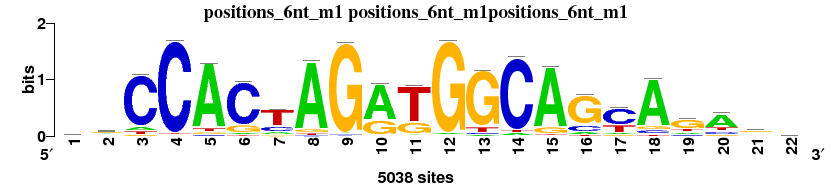

In [36]:
mkdir -p RSAT
cd RSAT

In [162]:
cat peak-motifs_positions_6nt_m1_sites.tab | grep -v ";" | grep -v '#'

hg38_chr1_91188_91807_+	site	positions_6nt_m1positions_6nt_m1	D	-77	-56	TGGCACCAGGTGGCAGCAGAGG	14.1
hg38_chr1_267716_268511_+	site	positions_6nt_m1positions_6nt_m1	D	-114	-93	CAGCACCAGGTGGCAGCAGAGG	13.5
hg38_chr1_357118_357709_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	CGGCACCAGGTGGCAGCAGAGG	14.2
hg38_chr1_449694_450020_+	site	positions_6nt_m1positions_6nt_m1	D	-66	-45	CTCCACCAGGGGGCAACCAATG	8.5
hg38_chr1_586016_586437_+	site	positions_6nt_m1positions_6nt_m1	D	-73	-52	CGGCACCAGGTGGCAGCAGAGG	14.2
hg38_chr1_684612_684966_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	CTCCACCAGGGGGCAACCAATG	8.5
hg38_chr1_904457_904978_+	site	positions_6nt_m1positions_6nt_m1	D	51	72	CGCCACCAGGGGGCGCCACAGC	11.3
hg38_chr1_984272_984559_+	site	positions_6nt_m1positions_6nt_m1	D	-98	-77	GGCCACCAGAGGGCACCAGGAC	13.7
hg38_chr1_1063688_1064304_+	site	positions_6nt_m1positions_6nt_m1	R	-36	-15	GGCCACCAGGTGGCGGCCTGGT	10.1
hg38_chr1_1349580_1350001_+	site	positions_6nt_m1positions_6nt_m1	D	160	181	GGCCACTAGA

hg38_chr1_10941816_10942467_+	site	positions_6nt_m1positions_6nt_m1	R	-14	7	GAGCAGCAGGGGGCAGCGTAAC	8.6
hg38_chr1_11037513_11038058_+	site	positions_6nt_m1positions_6nt_m1	D	-13	8	GGCCATTAGGTGGCGCCATCGG	11.0
hg38_chr1_11241465_11242275_+	site	positions_6nt_m1positions_6nt_m1	D	5	26	ATCCAGCAGATGGCAGTAAAGT	15.2
hg38_chr1_11642143_11642882_+	site	positions_6nt_m1positions_6nt_m1	R	82	103	TACCACTAGGTGTCAGCATTGT	16.2
hg38_chr1_11645487_11646121_+	site	positions_6nt_m1positions_6nt_m1	R	44	65	GTCCAGCAGGGGGCACCCCAGG	8.0
hg38_chr1_11719700_11720228_+	site	positions_6nt_m1positions_6nt_m1	R	-7	14	GGACAGTAGAGGGCACTCTCGG	8.7
hg38_chr1_11838329_11839379_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	TGCCAGCAGATGGCACCAGCGT	14.6
hg38_chr1_11893786_11894350_+	site	positions_6nt_m1positions_6nt_m1	R	42	63	CTCCAGCAGGTGGCGCTGGAGG	8.0
hg38_chr1_11967008_11967548_+	site	positions_6nt_m1positions_6nt_m1	R	9	30	AGCCACACGGTGGCAACAGCAG	10.2
hg38_chr1_12079599_12079915_+	site	positions_6nt_m1positions_6nt_m1	R

hg38_chr1_22548039_22548758_+	site	positions_6nt_m1positions_6nt_m1	D	-97	-76	CCCCACTGGATGACAGCCGAGC	10.5
hg38_chr1_22641794_22642647_+	site	positions_6nt_m1positions_6nt_m1	R	-27	-6	GTCCAGCAGGTGGCAGCCTCGG	10.8
hg38_chr1_22665607_22666310_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	TGCCACCAGGGGGGAGCAGACA	11.3
hg38_chr1_22674019_22674677_+	site	positions_6nt_m1positions_6nt_m1	R	-34	-13	CGCCACCTGGTGGCAGTGTACC	10.5
hg38_chr1_22674019_22674677_+	site	positions_6nt_m1positions_6nt_m1	D	-27	-6	TGCCACCAGGTGGCGGTAGGCA	12.8
hg38_chr1_22704325_22704981_+	site	positions_6nt_m1positions_6nt_m1	D	-31	-10	GACCACCAGGTGGCAGTCAAGA	14.0
hg38_chr1_22964076_22964693_+	site	positions_6nt_m1positions_6nt_m1	R	-17	4	GTCCACAAGGTGGCAGTGTTCG	11.7
hg38_chr1_22976370_22977092_+	site	positions_6nt_m1positions_6nt_m1	D	-135	-114	GGCCCCAGGATGGCAGTAGATG	10.5
hg38_chr1_22976370_22977092_+	site	positions_6nt_m1positions_6nt_m1	D	137	158	ATCCAGTAGATGTCCCTATGGG	7.7
hg38_chr1_23098614_23099256_+	site	positions_6nt_m1

hg38_chr1_31334938_31335438_+	site	positions_6nt_m1positions_6nt_m1	R	18	39	TACCACCAGATGGCAAGAGTCT	12.6
hg38_chr1_31394479_31395224_+	site	positions_6nt_m1positions_6nt_m1	D	-50	-29	GTCCACCGGGGGGCACTACGGA	9.4
hg38_chr1_31422481_31423218_+	site	positions_6nt_m1positions_6nt_m1	R	54	75	AGACAGCAGGTGGCGGTCTAAC	8.5
hg38_chr1_31548650_31549619_+	site	positions_6nt_m1positions_6nt_m1	R	-89	-68	GGCCAGTAGGTGGCAGTAAGTC	13.8
hg38_chr1_31563953_31564829_+	site	positions_6nt_m1positions_6nt_m1	D	-160	-139	AGCCATGAGGGGGCAGTGGTGT	7.7
hg38_chr1_31663694_31664488_+	site	positions_6nt_m1positions_6nt_m1	D	-79	-58	CACCAGGAGGGGTCAGCAGAGC	10.6
hg38_chr1_31666114_31666572_+	site	positions_6nt_m1positions_6nt_m1	R	-72	-51	AGCCAGGAGGTGGCAGGACGAG	8.8
hg38_chr1_31764429_31765609_+	site	positions_6nt_m1positions_6nt_m1	D	350	371	AACCAGCAGGGGGCAGCTTTGC	8.3
hg38_chr1_31963920_31964698_+	site	positions_6nt_m1positions_6nt_m1	R	-41	-20	GACCACAAGAGGACAGTAGTGA	13.6
hg38_chr1_32003473_32003894_+	site	positions_6nt_m1po

hg38_chr1_40612196_40612914_+	site	positions_6nt_m1positions_6nt_m1	D	-107	-86	TGTCAGTAGATGGCGCTGGTAG	9.2
hg38_chr1_40630519_40630931_+	site	positions_6nt_m1positions_6nt_m1	D	-30	-9	TGACACCAGGGGGTACCACACA	8.7
hg38_chr1_40774157_40774619_+	site	positions_6nt_m1positions_6nt_m1	D	-31	-10	GGCCACAAGGGGGCAGCATGCA	11.6
hg38_chr1_40848477_40848932_+	site	positions_6nt_m1positions_6nt_m1	D	7	28	GGCCACAAGGCGTCAGTAAAGA	11.0
hg38_chr1_40952370_40952980_+	site	positions_6nt_m1positions_6nt_m1	R	224	245	AGTCACCAGAGGACAGCCAAGG	8.1
hg38_chr1_41267996_41268752_+	site	positions_6nt_m1positions_6nt_m1	D	-30	-9	GGACACGAGGTGGCGCTGGTGG	7.5
hg38_chr1_41280176_41280596_+	site	positions_6nt_m1positions_6nt_m1	D	1	22	ACCCACTAGATGCCAGTAACAT	13.7
hg38_chr1_41416784_41417682_+	site	positions_6nt_m1positions_6nt_m1	R	21	42	TGCCACCAGAGGGCACCATGAT	13.0
hg38_chr1_41423400_41423764_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	GGCCACAAGAGGGCATCTGAGC	11.4
hg38_chr1_41516041_41516606_+	site	positions_6nt_m1positions_

hg38_chr1_52685923_52686711_+	site	positions_6nt_m1positions_6nt_m1	D	39	60	AAACAGTAGATGGTGACAGAAT	9.5
hg38_chr1_52700828_52701299_+	site	positions_6nt_m1positions_6nt_m1	D	-3	18	GAGCGGTAGAGGGCACAAGAGA	8.3
hg38_chr1_52748182_52748497_+	site	positions_6nt_m1positions_6nt_m1	R	-38	-17	AGCCAGCAGATGGCAGAGCAAG	9.8
hg38_chr1_53185565_53186104_+	site	positions_6nt_m1positions_6nt_m1	R	53	74	GGCCACTAGAGGGCTCCTTGGT	7.5
hg38_chr1_53681999_53682643_+	site	positions_6nt_m1positions_6nt_m1	R	-44	-23	TGCCACCAGGTGTCAGCTGTGT	12.0
hg38_chr1_53754718_53755089_+	site	positions_6nt_m1positions_6nt_m1	R	-28	-7	GGCCAGCAGAGGTCACTATTTC	9.0
hg38_chr1_53860769_53861376_+	site	positions_6nt_m1positions_6nt_m1	D	-12	9	AGCCAGAAGGGGGCACCAACAC	9.9
hg38_chr1_53948999_53949448_+	site	positions_6nt_m1positions_6nt_m1	R	-18	3	ATCCAGCAGAGGGCACAAGCAG	9.7
hg38_chr1_54069942_54070510_+	site	positions_6nt_m1positions_6nt_m1	D	11	32	AATCACTAGGGGGCAATAAGAC	9.7
hg38_chr1_54069942_54070510_+	site	positions_6nt_m1positions_6nt_m1

hg38_chr1_68442998_68443487_+	site	positions_6nt_m1positions_6nt_m1	R	9	30	TTCCCCTAGGGGGCAATAACAC	8.4
hg38_chr1_68570822_68571238_+	site	positions_6nt_m1positions_6nt_m1	D	-41	-20	AGCCACACGATGGTAGTGTTGC	7.9
hg38_chr1_68783019_68783336_+	site	positions_6nt_m1positions_6nt_m1	D	-97	-76	AACCACTAGATGTCTCCAGACT	12.8
hg38_chr1_69737538_69737987_+	site	positions_6nt_m1positions_6nt_m1	R	-112	-91	GACCACTACATAGAAGTAAACT	8.3
hg38_chr1_69737538_69737987_+	site	positions_6nt_m1positions_6nt_m1	R	2	23	AACCACAAGATGGCAGTATTGC	16.1
hg38_chr1_70034440_70034746_+	site	positions_6nt_m1positions_6nt_m1	D	18	39	GCTCACCAGGAGGCAGCACAAG	8.8
hg38_chr1_70132915_70133512_+	site	positions_6nt_m1positions_6nt_m1	D	-92	-71	CACCACTAGATGGAGACCTCAT	7.8
hg38_chr1_70142151_70142514_+	site	positions_6nt_m1positions_6nt_m1	R	-29	-8	TGACGCTAGGTGTCATCAAAGC	9.2
hg38_chr1_70509994_70510512_+	site	positions_6nt_m1positions_6nt_m1	R	26	47	GACCACTAGATGGCACTTTCTG	12.3
hg38_chr1_70528695_70529215_+	site	positions_6nt_m1positions_6

hg38_chr1_91511328_91511863_+	site	positions_6nt_m1positions_6nt_m1	D	-8	13	TTCCACTAGGGGGCAAGATAAT	12.0
hg38_chr1_91927117_91927755_+	site	positions_6nt_m1positions_6nt_m1	R	27	48	AGCCACGAGGTGGCAGAATATG	14.0
hg38_chr1_92291328_92291764_+	site	positions_6nt_m1positions_6nt_m1	R	17	38	GTCCTATAGATGGCAGTGTTTG	8.9
hg38_chr1_92310060_92310504_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	ATCCACTAGAGGTCACTGTTTT	9.3
hg38_chr1_92831784_92832607_+	site	positions_6nt_m1positions_6nt_m1	R	190	211	TCACACTAGACGGCAGTATCCG	11.9
hg38_chr1_92858775_92859435_+	site	positions_6nt_m1positions_6nt_m1	D	-73	-52	AACCAGGAGATGGCACTCTTTA	8.3
hg38_chr1_92858775_92859435_+	site	positions_6nt_m1positions_6nt_m1	D	8	29	TACCACAAGGGGGCAATAACAA	11.3
hg38_chr1_92993894_92994581_+	site	positions_6nt_m1positions_6nt_m1	R	55	76	TGCCACCAGGTGGCAGTCTTTT	11.1
hg38_chr1_93062096_93062618_+	site	positions_6nt_m1positions_6nt_m1	R	18	39	TACCACCAGGTGGCCTCAGTCA	9.9
hg38_chr1_93304571_93305107_+	site	positions_6nt_m1positions_6nt_

hg38_chr1_109277284_109278002_+	site	positions_6nt_m1positions_6nt_m1	D	-29	-8	AGCCGCCAGGTGGCAACAACAC	10.2
hg38_chr1_109490448_109491286_+	site	positions_6nt_m1positions_6nt_m1	D	-79	-58	TCCCAGCAGATGGCAGCAACTC	12.5
hg38_chr1_109532087_109533207_+	site	positions_6nt_m1positions_6nt_m1	R	-189	-168	AACCACAAGGGGGCAGTGTTGG	10.3
hg38_chr1_109546061_109546757_+	site	positions_6nt_m1positions_6nt_m1	D	29	50	TGCCAGCAGGTGGCAGTGTGAG	9.6
hg38_chr1_109640143_109640749_+	site	positions_6nt_m1positions_6nt_m1	D	-46	-25	GTCCACAGGGTGGCGGTACCTC	9.1
hg38_chr1_109776613_109777397_+	site	positions_6nt_m1positions_6nt_m1	D	4	25	GGCCAGCAGGGGGCAGAACAAG	10.0
hg38_chr1_109984171_109985112_+	site	positions_6nt_m1positions_6nt_m1	R	-65	-44	TGCCACCAGGTGGCACCATCAG	13.8
hg38_chr1_109984171_109985112_+	site	positions_6nt_m1positions_6nt_m1	D	-58	-37	TGCCACCTGGTGGCACAAAGGG	7.6
hg38_chr1_110029518_110030045_+	site	positions_6nt_m1positions_6nt_m1	D	-30	-9	AACCACCAGATGGCGCGTTTTC	8.0
hg38_chr1_110053719_110054417_+	site	

hg38_chr1_120995041_120995442_+	site	positions_6nt_m1positions_6nt_m1	R	9	30	AACCAGCAGATGGAGACAAAAG	7.9
hg38_chr1_121148412_121149054_+	site	positions_6nt_m1positions_6nt_m1	D	-16	5	AGACAGCAGGTGGCAGCAGAAT	13.3
hg38_chr1_121447295_121447555_+	site	positions_6nt_m1positions_6nt_m1	D	63	84	TACCACTAGAGGGCAGAAAATA	16.1
hg38_chr1_123157211_123157469_+	site	positions_6nt_m1positions_6nt_m1	R	-77	-56	GGCCACAAGATGTCAGAATATC	13.8
hg38_chr1_143334295_143334861_+	site	positions_6nt_m1positions_6nt_m1	D	8	29	ACCCACGAGGTGGCGCCGCAGA	9.6
hg38_chr1_143393152_143393888_+	site	positions_6nt_m1positions_6nt_m1	D	-20	1	AGACACAAGATGGCGCTTTAAG	8.2
hg38_chr1_143936447_143937004_+	site	positions_6nt_m1positions_6nt_m1	D	-57	-36	AGACAGCAGGTGGCAGCAGAAT	13.3
hg38_chr1_143972659_143973924_+	site	positions_6nt_m1positions_6nt_m1	D	-209	-188	GTCCACCGTAGGGCAGTCGTCG	7.6
hg38_chr1_144078570_144079180_+	site	positions_6nt_m1positions_6nt_m1	D	-53	-32	TGCCTCTAGATGGCAAACAAAC	9.4
hg38_chr1_144159859_144160448_+	site	positi

hg38_chr1_153352402_153352941_+	site	positions_6nt_m1positions_6nt_m1	D	-59	-38	GGCCACAAGGTGGCAGCATGCG	13.7
hg38_chr1_153465717_153466120_+	site	positions_6nt_m1positions_6nt_m1	D	-10	11	TTCCACACGGTGGCGCCACCGA	8.6
hg38_chr1_153494796_153495393_+	site	positions_6nt_m1positions_6nt_m1	R	-22	-1	GGCCAGCAGGGGGCGGAGTAGA	7.6
hg38_chr1_153510853_153511390_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	TTCCTCCACGTGGCAGGAGACC	8.0
hg38_chr1_153568419_153568973_+	site	positions_6nt_m1positions_6nt_m1	R	2	23	AGCCACCAGAGGGCACGAAGCA	9.9
hg38_chr1_153670735_153671570_+	site	positions_6nt_m1positions_6nt_m1	D	16	37	AGACATTAGGTGGCACTAAAGA	11.3
hg38_chr1_153749338_153749895_+	site	positions_6nt_m1positions_6nt_m1	R	-37	-16	GAGCACTAGGTGGCACTGCACA	9.5
hg38_chr1_153771858_153772378_+	site	positions_6nt_m1positions_6nt_m1	R	-38	-17	GACCACTAGATGTCGCCCACAA	10.7
hg38_chr1_153797211_153797661_+	site	positions_6nt_m1positions_6nt_m1	D	-44	-23	AGCCACTAGGGGGCTCCAGGGT	10.2
hg38_chr1_153920185_153920670_+	site	posit

hg38_chr1_159197883_159198493_+	site	positions_6nt_m1positions_6nt_m1	R	-36	-15	TACCACCAGGCGTCAGCACTGG	10.4
hg38_chr1_159211448_159212069_+	site	positions_6nt_m1positions_6nt_m1	R	-49	-28	TGCCACAGGGGGGCGACAGAGG	9.0
hg38_chr1_159780411_159781286_+	site	positions_6nt_m1positions_6nt_m1	D	-172	-151	TGCCGCCAGGGTGCAGCAGAGC	9.0
hg38_chr1_159798761_159799314_+	site	positions_6nt_m1positions_6nt_m1	R	90	111	GGCCTACAGAGGGCAGAAAACG	8.2
hg38_chr1_159891499_159891929_+	site	positions_6nt_m1positions_6nt_m1	R	-7	14	GGGCACCAGGTGGCAGCAGCAC	12.8
hg38_chr1_159891499_159891929_+	site	positions_6nt_m1positions_6nt_m1	R	56	77	GGGCAGTAGAGGGCAGAAGTGG	10.6
hg38_chr1_159936193_159937015_+	site	positions_6nt_m1positions_6nt_m1	D	-20	1	GGCCAGCAGAGGGAGGCAGCAC	8.2
hg38_chr1_160007445_160008009_+	site	positions_6nt_m1positions_6nt_m1	R	48	69	GACCAATAGATGTCACTATATG	13.4
hg38_chr1_160084031_160084404_+	site	positions_6nt_m1positions_6nt_m1	R	33	54	AGCCACCAGATGGCGCCGAAGA	12.3
hg38_chr1_160085554_160086062_+	site	posi

hg38_chr1_168433418_168433777_+	site	positions_6nt_m1positions_6nt_m1	D	136	157	TACCTCGAGAGGATAGCACAGA	7.7
hg38_chr1_168545982_168546290_+	site	positions_6nt_m1positions_6nt_m1	D	-16	5	TCCCACTAGATGGCAGACTCTT	11.7
hg38_chr1_168574278_168574596_+	site	positions_6nt_m1positions_6nt_m1	R	19	40	TCCCACTAGATGGCAGACTCTT	11.7
hg38_chr1_168603348_168604090_+	site	positions_6nt_m1positions_6nt_m1	D	-50	-29	AGCCGCTTGAGGGCAGCACCTC	8.4
hg38_chr1_168709957_168710363_+	site	positions_6nt_m1positions_6nt_m1	D	146	167	AACCAGCAGGTGGAACCACACC	9.3
hg38_chr1_168735001_168735413_+	site	positions_6nt_m1positions_6nt_m1	D	-78	-57	ATCCACTAGATGCCAGTAGCAT	15.1
hg38_chr1_169108884_169110241_+	site	positions_6nt_m1positions_6nt_m1	R	-488	-467	CTCCAGCAGGTGACAGGCGAGT	7.8
hg38_chr1_169348283_169349014_+	site	positions_6nt_m1positions_6nt_m1	R	-32	-11	GAACACTAGGTGGCACTCTTCC	9.4
hg38_chr1_169466222_169466673_+	site	positions_6nt_m1positions_6nt_m1	D	2	23	CCCCAGAAGAGGGCAGCGGCAG	9.1
hg38_chr1_169546353_169546820_+	site	po

hg38_chr1_182080883_182081415_+	site	positions_6nt_m1positions_6nt_m1	R	5	26	TACCACTAGGTGGGGCAAGTGT	9.1
hg38_chr1_182084324_182085507_+	site	positions_6nt_m1positions_6nt_m1	D	-361	-340	GTCCTCTTGGGGGCAGCAAAGA	9.6
hg38_chr1_182084324_182085507_+	site	positions_6nt_m1positions_6nt_m1	D	170	191	GACCAGGAGGTGGCAGCGTTGC	10.6
hg38_chr1_182143128_182143601_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	GGCCACCAGAGGGCGCTAGAGT	13.7
hg38_chr1_182396631_182397443_+	site	positions_6nt_m1positions_6nt_m1	R	-141	-120	TTCCACAAGAGGGCACTAGGTT	11.9
hg38_chr1_182398785_182399095_+	site	positions_6nt_m1positions_6nt_m1	D	53	74	TTCCACATGGTGGCACCACTTT	9.0
hg38_chr1_182446005_182446356_+	site	positions_6nt_m1positions_6nt_m1	D	27	48	GTGCACCAGAGGGCACCATATT	11.6
hg38_chr1_182782268_182782660_+	site	positions_6nt_m1positions_6nt_m1	R	18	39	GGCCACTGGGGGGCAGTGTCTC	8.4
hg38_chr1_182784229_182785009_+	site	positions_6nt_m1positions_6nt_m1	R	135	156	CACCGCTAGGTGACAGTCTATC	9.4
hg38_chr1_182786599_182787186_+	site	po

hg38_chr1_201876129_201876498_+	site	positions_6nt_m1positions_6nt_m1	R	10	31	CGCCAGCAGAGGGCTCTAGGAA	7.5
hg38_chr1_201877756_201878342_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	TGCCACTAGGTGTCCCCAGTGT	11.0
hg38_chr1_201999585_202000139_+	site	positions_6nt_m1positions_6nt_m1	D	-55	-34	GGCCACAAGGAGGCAGCACAGT	12.3
hg38_chr1_202009439_202010216_+	site	positions_6nt_m1positions_6nt_m1	D	-116	-95	GACCACTAGAGGGCAGCAGAAG	18.5
hg38_chr1_202118912_202119338_+	site	positions_6nt_m1positions_6nt_m1	R	2	23	GGCCACTAGGTGGAACCAAATG	12.8
hg38_chr1_202135097_202135732_+	site	positions_6nt_m1positions_6nt_m1	R	-67	-46	AGCCACACGGTGGCAGCAGAGC	14.0
hg38_chr1_202184627_202185199_+	site	positions_6nt_m1positions_6nt_m1	D	-61	-40	GGCCACCAGGTGGCGCACGTTC	9.1
hg38_chr1_202189037_202189432_+	site	positions_6nt_m1positions_6nt_m1	D	-138	-117	AGCCACCAGGTGGCGCTGTGGA	8.4
hg38_chr1_202192757_202193393_+	site	positions_6nt_m1positions_6nt_m1	D	-74	-53	GGCCTCCAGGTGGCACCAATCC	9.9
hg38_chr1_202315370_202316047_+	si

hg38_chr1_209248561_209249116_+	site	positions_6nt_m1positions_6nt_m1	R	4	25	GGCCACTAGGTGGCAACAAAGG	15.5
hg38_chr1_209354113_209354748_+	site	positions_6nt_m1positions_6nt_m1	R	55	76	GAACACTAGGTGGCAGCACGGA	14.5
hg38_chr1_209513286_209513724_+	site	positions_6nt_m1positions_6nt_m1	R	-12	9	TACCATTAGGTGGCGATACATG	11.1
hg38_chr1_209569395_209570102_+	site	positions_6nt_m1positions_6nt_m1	D	-128	-107	GGCCAGCAGAGGGCGATAGTCT	9.1
hg38_chr1_209576669_209577187_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	TGTCACTAGAGGGCAGTGCAGC	12.0
hg38_chr1_209601974_209602577_+	site	positions_6nt_m1positions_6nt_m1	D	-38	-17	ACCCACTAGATGCCAGCAGCAC	14.6
hg38_chr1_209627457_209628305_+	site	positions_6nt_m1positions_6nt_m1	R	-62	-41	CTCCAGCAGGTGGCAGCACACG	13.0
hg38_chr1_209747735_209748172_+	site	positions_6nt_m1positions_6nt_m1	R	64	85	GACCACTAGCTGTCGCTATTGA	9.4
hg38_chr1_209860229_209860729_+	site	positions_6nt_m1positions_6nt_m1	D	1	22	GAACACCAGGTGGCGCTGTAAA	8.6
hg38_chr1_209875446_209875967_+	site	posi

hg38_chr1_223628265_223628594_+	site	positions_6nt_m1positions_6nt_m1	D	-65	-44	CGCCACCTAGTGGCAGCAGGAA	8.6
hg38_chr1_223684038_223684653_+	site	positions_6nt_m1positions_6nt_m1	R	40	61	GACATCTAGGGGGCAGCAGAGA	11.1
hg38_chr1_223712005_223712870_+	site	positions_6nt_m1positions_6nt_m1	D	-72	-51	TGTCCGCAGATGGCAGCACCGG	9.0
hg38_chr1_223748854_223749586_+	site	positions_6nt_m1positions_6nt_m1	R	88	109	GGCCACCAGGTGGCAGCGCGGC	12.3
hg38_chr1_223748854_223749586_+	site	positions_6nt_m1positions_6nt_m1	D	95	116	TGCCACCTGGTGGCCGCAGTGG	9.8
hg38_chr1_223920788_223921191_+	site	positions_6nt_m1positions_6nt_m1	R	0	21	CAACAGCAGGTGGCAGCCTCAT	7.6
hg38_chr1_224113885_224114987_+	site	positions_6nt_m1positions_6nt_m1	D	-315	-294	GCCCCCAAGATGGCGGCAGCGG	10.2
hg38_chr1_224116128_224116617_+	site	positions_6nt_m1positions_6nt_m1	D	-60	-39	TGCCACTAGGTGTCAGCATTAA	15.5
hg38_chr1_224333247_224333768_+	site	positions_6nt_m1positions_6nt_m1	R	3	24	TACCACTAGGTGGGGTTACACC	8.9
hg38_chr1_224457427_224458101_+	site	posi

hg38_chr1_237386490_237387017_+	site	positions_6nt_m1positions_6nt_m1	R	12	33	AGCCATTAGATGGCGATATTTC	10.3
hg38_chr1_237562113_237562798_+	site	positions_6nt_m1positions_6nt_m1	R	-53	-32	TGCCACTAGAGGGCAGTCAAGA	14.7
hg38_chr1_237677840_237678302_+	site	positions_6nt_m1positions_6nt_m1	D	-29	-8	CTACAGATGGTGGCAGCAGAGG	9.6
hg38_chr1_237806662_237807291_+	site	positions_6nt_m1positions_6nt_m1	D	-26	-5	GTCCACTGGGTGGCGACATATT	11.4
hg38_chr1_237814375_237814711_+	site	positions_6nt_m1positions_6nt_m1	D	-39	-18	TTACAGTAGGGGGCGCCATAGC	10.1
hg38_chr1_237877567_237877951_+	site	positions_6nt_m1positions_6nt_m1	D	17	38	AGCCCTTAGAGGGCAGAAACGT	7.8
hg38_chr1_238252170_238252729_+	site	positions_6nt_m1positions_6nt_m1	D	50	71	GGCCAGGAGGTGGCAGCAGCAA	12.4
hg38_chr1_239405441_239405957_+	site	positions_6nt_m1positions_6nt_m1	D	-43	-22	TGCCAGTAGATGGCAGACAACT	12.4
hg38_chr1_239897869_239898583_+	site	positions_6nt_m1positions_6nt_m1	R	89	110	AACCACTAGGTGGCAAAGCAGA	10.8
hg38_chr1_239951492_239951996_+	site	po

hg38_chr10_6669168_6670131_+	site	positions_6nt_m1positions_6nt_m1	D	-194	-173	TGACACAAGAGGGAAGCAGAAA	11.4
hg38_chr10_6786203_6786952_+	site	positions_6nt_m1positions_6nt_m1	D	52	73	AGCCACACGATGGCAGTGTGCG	9.0
hg38_chr10_6843423_6843811_+	site	positions_6nt_m1positions_6nt_m1	D	-77	-56	CGCCAGATGGAGGCAGCAGAGA	9.1
hg38_chr10_6919927_6920483_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	CGCCCATAGATGGCAGCAGCCC	10.7
hg38_chr10_7121064_7121643_+	site	positions_6nt_m1positions_6nt_m1	D	44	65	CACCTCTAGAGGGCAGCAATGC	12.9
hg38_chr10_7260364_7260727_+	site	positions_6nt_m1positions_6nt_m1	D	-85	-64	GGGCTCAAGATGGCTGCAGAAA	8.1
hg38_chr10_7416859_7417540_+	site	positions_6nt_m1positions_6nt_m1	R	53	74	TTCCAGTAGATGGCACTGCAAA	11.7
hg38_chr10_7525109_7525927_+	site	positions_6nt_m1positions_6nt_m1	D	73	94	ACCCAGTAGATGGCGCTCATTG	8.3
hg38_chr10_7687134_7687747_+	site	positions_6nt_m1positions_6nt_m1	R	29	50	CTCCGCTAGATGGCGTGAGGTG	7.6
hg38_chr10_7871949_7872513_+	site	positions_6nt_m1positions_6nt_m1	D

hg38_chr10_23068148_23068562_+	site	positions_6nt_m1positions_6nt_m1	R	-8	13	GACCACTAGGGGGCGCCCAACG	10.7
hg38_chr10_23314709_23315255_+	site	positions_6nt_m1positions_6nt_m1	D	-20	1	GGTCTCCAGAGGGCAGCAGAGA	12.0
hg38_chr10_23530016_23530354_+	site	positions_6nt_m1positions_6nt_m1	R	55	76	TACCACTAGGTGGCTCAAATGG	10.4
hg38_chr10_23994429_23994898_+	site	positions_6nt_m1positions_6nt_m1	D	-13	8	TCCCACCAGGGGGCAGTAGGAA	12.7
hg38_chr10_24196358_24197025_+	site	positions_6nt_m1positions_6nt_m1	R	-82	-61	GGCCACTAGGGGGCGAGAGAGT	11.6
hg38_chr10_24503557_24504080_+	site	positions_6nt_m1positions_6nt_m1	R	1	22	GGCCAGCAGATGGTGCCAAAAG	8.3
hg38_chr10_24518908_24519498_+	site	positions_6nt_m1positions_6nt_m1	R	-26	-5	GACCACTAGGGGGCAGTAAGTG	14.0
hg38_chr10_24557044_24557692_+	site	positions_6nt_m1positions_6nt_m1	R	-42	-21	GACCACCAGATGGCAGGAGGTG	13.9
hg38_chr10_24642837_24643374_+	site	positions_6nt_m1positions_6nt_m1	D	-37	-16	TACCACTAGGTGTCGGACATGA	10.5
hg38_chr10_25080880_25081437_+	site	positions_6nt_

hg38_chr10_43093360_43093779_+	site	positions_6nt_m1positions_6nt_m1	R	5	26	GTCCTCCAGATGGTGGCAGTGG	9.4
hg38_chr10_43105197_43106022_+	site	positions_6nt_m1positions_6nt_m1	R	34	55	GCCCAGCAGGTGGCGGTCGCGC	9.7
hg38_chr10_43204923_43205525_+	site	positions_6nt_m1positions_6nt_m1	R	125	146	CACCTCAAGGTGGCATGATACA	8.4
hg38_chr10_43293156_43293651_+	site	positions_6nt_m1positions_6nt_m1	D	-5	16	TACCAGCAGGTGTCAGCAGAAT	14.4
hg38_chr10_43348342_43348910_+	site	positions_6nt_m1positions_6nt_m1	R	3	24	GGCCAGAAGGGGGCGGTCTAGG	8.1
hg38_chr10_43461804_43462387_+	site	positions_6nt_m1positions_6nt_m1	R	-29	-8	CACCACTAGAGGTCACTGCTGA	9.5
hg38_chr10_43671539_43672177_+	site	positions_6nt_m1positions_6nt_m1	D	-39	-18	GTCCAGCAGATGGCAGTAAAGT	15.4
hg38_chr10_44384152_44384905_+	site	positions_6nt_m1positions_6nt_m1	R	181	202	GACCTCAAGCTGGCTGCAGAGC	7.7
hg38_chr10_44386545_44387252_+	site	positions_6nt_m1positions_6nt_m1	R	-176	-155	CGCCACCAGAGGGCGCCGGAGC	11.9
hg38_chr10_44857642_44858144_+	site	positions_6nt_m1

hg38_chr10_58291510_58292011_+	site	positions_6nt_m1positions_6nt_m1	R	-13	8	CAACACTAGGTGGCATCCAGGG	8.2
hg38_chr10_58414602_58414944_+	site	positions_6nt_m1positions_6nt_m1	D	-59	-38	AAACATCAGAGGGCAGCATTTG	8.6
hg38_chr10_58952582_58953454_+	site	positions_6nt_m1positions_6nt_m1	D	-170	-149	CACCAGTAGATGGCAGACTCGC	12.3
hg38_chr10_59065122_59065591_+	site	positions_6nt_m1positions_6nt_m1	D	-233	-212	TGACAATAGATGCCACTACATC	8.9
hg38_chr10_59240541_59241072_+	site	positions_6nt_m1positions_6nt_m1	D	-36	-15	GGCCACTGGAGGGCAGTATCTC	12.4
hg38_chr10_59465136_59465388_+	site	positions_6nt_m1positions_6nt_m1	R	-23	-2	AGCAGCCAGAGGGCAGCACAGC	7.7
hg38_chr10_59580014_59580697_+	site	positions_6nt_m1positions_6nt_m1	R	74	95	TTCCACTTGGGGTCAGTATTGT	9.9
hg38_chr10_59622273_59622796_+	site	positions_6nt_m1positions_6nt_m1	R	-37	-16	TCCCACTAGGTGGCGTAAGCAC	11.4
hg38_chr10_59625693_59626567_+	site	positions_6nt_m1positions_6nt_m1	D	58	79	AACCACAAGGTGGTGCCAAAGT	9.6
hg38_chr10_59809344_59809785_+	site	positions_

hg38_chr10_71956057_71956550_+	site	positions_6nt_m1positions_6nt_m1	D	-44	-23	GGCCACTAGAGGGCTCCTTGGT	7.5
hg38_chr10_72048428_72049072_+	site	positions_6nt_m1positions_6nt_m1	D	16	37	TTCCACTAGAGGTCACAAACTG	10.1
hg38_chr10_72336890_72337589_+	site	positions_6nt_m1positions_6nt_m1	R	83	104	AGCCAGCAGGGGGCAGAGTCGG	7.6
hg38_chr10_72340241_72340990_+	site	positions_6nt_m1positions_6nt_m1	R	-16	5	TGACACCAGAGGGCGCCACACG	10.5
hg38_chr10_72364172_72364835_+	site	positions_6nt_m1positions_6nt_m1	D	-54	-33	TGCCAGCAGGTGGCACTTGAAG	10.2
hg38_chr10_72834142_72834690_+	site	positions_6nt_m1positions_6nt_m1	R	-6	15	CACCATCAGAGGGCACAACAGT	9.4
hg38_chr10_72875286_72875546_+	site	positions_6nt_m1positions_6nt_m1	R	23	44	TGTCACTTGGGGGCAGCAAGAC	8.8
hg38_chr10_73167729_73168520_+	site	positions_6nt_m1positions_6nt_m1	D	92	113	GGCCGGTAGGTGGCGGGAGGGG	8.4
hg38_chr10_73252604_73253009_+	site	positions_6nt_m1positions_6nt_m1	D	148	169	GACCGTGAGATGACAGCAGAGA	9.7
hg38_chr10_73848846_73849747_+	site	positions_6nt_m1p

hg38_chr10_88810311_88810578_+	site	positions_6nt_m1positions_6nt_m1	R	1	22	GGCCACTAGAGGGAAGTATTCT	12.3
hg38_chr10_88835557_88836104_+	site	positions_6nt_m1positions_6nt_m1	R	-123	-102	CACCACATGATGTCACGATCAG	8.3
hg38_chr10_88835557_88836104_+	site	positions_6nt_m1positions_6nt_m1	D	-34	-13	TTCCACTAGGGGGCAGCGCAGC	13.3
hg38_chr10_88865463_88865792_+	site	positions_6nt_m1positions_6nt_m1	R	58	79	ATACACCAGATGGCACTCTAAG	11.3
hg38_chr10_88932433_88933241_+	site	positions_6nt_m1positions_6nt_m1	R	-6	15	TACCACCAGGCGGCATGAGCTC	8.2
hg38_chr10_88934702_88935938_+	site	positions_6nt_m1positions_6nt_m1	D	-334	-313	GACCACTAGAGGGAGCCATCCT	8.8
hg38_chr10_89029780_89030254_+	site	positions_6nt_m1positions_6nt_m1	D	1	22	GGCCACAAGGTGGCAGTGTTTC	11.3
hg38_chr10_89213131_89213698_+	site	positions_6nt_m1positions_6nt_m1	R	-23	-2	TGCCACAAGAGGGCACTCTTGG	9.6
hg38_chr10_89217054_89217431_+	site	positions_6nt_m1positions_6nt_m1	D	-87	-66	GGCCACAAGGTGGCGCCTGGTA	8.9
hg38_chr10_89217560_89218093_+	site	positions_6nt

hg38_chr10_97759332_97759885_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	AGCCACCAGAGGGCAGCAGCGA	16.0
hg38_chr10_97869368_97869870_+	site	positions_6nt_m1positions_6nt_m1	D	3	24	TGCCACTGAGTGGCAGGATTAT	7.9
hg38_chr10_97914660_97915299_+	site	positions_6nt_m1positions_6nt_m1	D	-58	-37	GGCCACTAGATGGCACTGTGAC	13.2
hg38_chr10_98028132_98028546_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	GTCCAGTAGGGGGCGCCAAAGG	11.1
hg38_chr10_98041346_98041835_+	site	positions_6nt_m1positions_6nt_m1	R	29	50	AGCCACCAGGTGGCGGTCTTTC	9.7
hg38_chr10_98242737_98243343_+	site	positions_6nt_m1positions_6nt_m1	D	-28	-7	TGCCACAAGATGGTGCCCAAAT	7.7
hg38_chr10_98309309_98309991_+	site	positions_6nt_m1positions_6nt_m1	R	89	110	GGCCATAAGAGGGCGGAAGAGG	10.1
hg38_chr10_98467358_98467959_+	site	positions_6nt_m1positions_6nt_m1	D	-50	-29	GGCCACTAGAGGTCACTCTTGT	10.3
hg38_chr10_98790814_98791294_+	site	positions_6nt_m1positions_6nt_m1	D	-35	-14	TGCCACAAGATGGCACTCATAG	11.7
hg38_chr10_99042635_99043046_+	site	positions_6nt_

hg38_chr10_110306088_110306605_+	site	positions_6nt_m1positions_6nt_m1	D	10	31	TTGCAGCAGAGGGCAGCAGTGT	10.5
hg38_chr10_110311294_110311845_+	site	positions_6nt_m1positions_6nt_m1	D	-33	-12	TTCCATTAGGTGGCAGTCAGGA	9.6
hg38_chr10_110547069_110547635_+	site	positions_6nt_m1positions_6nt_m1	R	-9	12	TACCACTAGAGGGCGGTGAAGA	13.8
hg38_chr10_110600372_110600934_+	site	positions_6nt_m1positions_6nt_m1	R	30	51	ACACACTAGGTGGCAGAATTCC	11.4
hg38_chr10_110609581_110609976_+	site	positions_6nt_m1positions_6nt_m1	R	29	50	TGCCACATGGTGGCAGATTTAT	7.7
hg38_chr10_110746202_110746912_+	site	positions_6nt_m1positions_6nt_m1	D	-20	1	GACCACCAGATGGTGGCATTGC	11.8
hg38_chr10_110803827_110804254_+	site	positions_6nt_m1positions_6nt_m1	D	-27	-6	CTCCTCTAGGTGGCATGATGGC	7.8
hg38_chr10_110893406_110894065_+	site	positions_6nt_m1positions_6nt_m1	R	5	26	TACCACTAGAGGGCACTAACAA	15.3
hg38_chr10_111075972_111077575_+	site	positions_6nt_m1positions_6nt_m1	D	-498	-477	GACCACGAGCGGCCAGCAGGTG	7.7
hg38_chr10_111075972_111077575_+	si

hg38_chr10_125000351_125001024_+	site	positions_6nt_m1positions_6nt_m1	D	-6	15	TCCCAGAAGGTGTCACCAGAGG	11.2
hg38_chr10_125047946_125048649_+	site	positions_6nt_m1positions_6nt_m1	D	-53	-32	GGCCAGCAGAGGGCACTGCACA	8.3
hg38_chr10_125212049_125212534_+	site	positions_6nt_m1positions_6nt_m1	R	-84	-63	TTCCACACGAAGGCAGTACATG	9.4
hg38_chr10_125343119_125343768_+	site	positions_6nt_m1positions_6nt_m1	R	-126	-105	AGCCAGAAGGTGGAAGCACCTC	8.3
hg38_chr10_125375221_125375616_+	site	positions_6nt_m1positions_6nt_m1	R	31	52	ACCCACTAGATGCCAGCAGCAC	14.6
hg38_chr10_125629668_125630337_+	site	positions_6nt_m1positions_6nt_m1	R	-58	-37	TACCACAAGAGGGCAGGTGTAC	11.9
hg38_chr10_125982144_125983064_+	site	positions_6nt_m1positions_6nt_m1	D	-106	-85	TGACGCTAGGTGGCAGAATTAG	10.3
hg38_chr10_126748806_126749634_+	site	positions_6nt_m1positions_6nt_m1	R	0	21	TACCACCAGAGGGCACTGTGCC	9.5
hg38_chr10_126969414_126969692_+	site	positions_6nt_m1positions_6nt_m1	R	-80	-59	AGCCACCAGAGGGCAGAGCCAC	9.3
hg38_chr10_127576962_1275779

hg38_chr11_5204832_5205161_+	site	positions_6nt_m1positions_6nt_m1	D	-33	-12	CACCACTAGGGGTCAGAAGTAG	12.6
hg38_chr11_5369813_5370309_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	AACCATAAGATGGCAGGAGAGG	13.0
hg38_chr11_5476183_5476698_+	site	positions_6nt_m1positions_6nt_m1	D	-39	-18	GGCCACAAGGGGGCACTCAGAG	7.6
hg38_chr11_5600303_5600687_+	site	positions_6nt_m1positions_6nt_m1	D	-50	-29	GAACACTAGATGGCAGCGCCAA	12.8
hg38_chr11_5891085_5891545_+	site	positions_6nt_m1positions_6nt_m1	R	79	100	TACCACTAGATGTCAGTCATGC	14.2
hg38_chr11_6315625_6316235_+	site	positions_6nt_m1positions_6nt_m1	R	62	83	GACCACACGATGTCAGTGTCGG	9.5
hg38_chr11_6353272_6354001_+	site	positions_6nt_m1positions_6nt_m1	R	-22	-1	TACCAGTAGATGGCACTGCAAC	13.2
hg38_chr11_6362927_6363497_+	site	positions_6nt_m1positions_6nt_m1	R	33	54	AGCCAGCAGATGGCACTGTGGC	9.2
hg38_chr11_6505560_6506092_+	site	positions_6nt_m1positions_6nt_m1	R	1	22	AGCCACTAGGTGTCAGTATCAC	15.4
hg38_chr11_6705806_6706368_+	site	positions_6nt_m1positions_6nt_m1	R	

hg38_chr11_17598830_17599443_+	site	positions_6nt_m1positions_6nt_m1	R	-279	-258	GAACACTAGGAGTCAGGAGACA	9.2
hg38_chr11_17598830_17599443_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	GACCACTAGAGGGCAAGCTGAG	8.5
hg38_chr11_17730435_17731539_+	site	positions_6nt_m1positions_6nt_m1	R	-269	-248	GTCCACTAGGTGTCGGTAGAAG	15.5
hg38_chr11_17730435_17731539_+	site	positions_6nt_m1positions_6nt_m1	D	213	234	GGCCACAAGATGGCACCCCAGC	12.4
hg38_chr11_17846715_17847195_+	site	positions_6nt_m1positions_6nt_m1	R	-6	15	AGCCACTAGGGGGTAATACACA	11.0
hg38_chr11_17930601_17931019_+	site	positions_6nt_m1positions_6nt_m1	R	-84	-63	ATCCAGTAGGTGGCAGAGTTTG	9.8
hg38_chr11_17978565_17979218_+	site	positions_6nt_m1positions_6nt_m1	R	-28	-7	GGCCACCAGATGGCAGCAGTAG	17.4
hg38_chr11_17979423_17980205_+	site	positions_6nt_m1positions_6nt_m1	R	122	143	AACCACTAGAGGGAAGCATTGT	13.6
hg38_chr11_18105842_18106410_+	site	positions_6nt_m1positions_6nt_m1	R	16	37	GAACAGCAGATGGCGCTGTAGG	7.7
hg38_chr11_18115405_18116018_+	site	positio

hg38_chr11_30960317_30960867_+	site	positions_6nt_m1positions_6nt_m1	D	-14	7	TAGCACTAGGTGGAGACAGTGA	8.6
hg38_chr11_31236019_31236664_+	site	positions_6nt_m1positions_6nt_m1	D	-107	-86	AAACTCTAGATGGCAATATTGC	10.3
hg38_chr11_31397129_31397766_+	site	positions_6nt_m1positions_6nt_m1	D	-17	4	AAGCAATAGGTGGCAGTAGTGT	11.8
hg38_chr11_31487916_31488375_+	site	positions_6nt_m1positions_6nt_m1	D	-106	-85	GTCCAGCAGGGAGCAGCATTAC	8.6
hg38_chr11_32006738_32007310_+	site	positions_6nt_m1positions_6nt_m1	R	-45	-24	GTCCAACAGAGGGCAGTCCATT	8.7
hg38_chr11_32173293_32173914_+	site	positions_6nt_m1positions_6nt_m1	R	11	32	GGACAGCAGGAGGCAGCAGTGC	8.9
hg38_chr11_32175592_32176682_+	site	positions_6nt_m1positions_6nt_m1	R	242	263	GCCCACTAGAGGGCACAAGAGA	14.6
hg38_chr11_32323487_32323914_+	site	positions_6nt_m1positions_6nt_m1	D	4	25	AGCCACAAGGGGGCACAGTTGA	7.8
hg38_chr11_32792744_32793319_+	site	positions_6nt_m1positions_6nt_m1	R	18	39	GTCCACCAGGCGGCAGCATAGG	13.5
hg38_chr11_32809216_32809592_+	site	positions_6nt_m

hg38_chr11_46389141_46390606_+	site	positions_6nt_m1positions_6nt_m1	D	-313	-292	CACCGCTAGATGGCAATGTCGG	10.1
hg38_chr11_46446508_46446818_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	ACCCACTAGATGCCAGTAGCAC	14.7
hg38_chr11_46808784_46809110_+	site	positions_6nt_m1positions_6nt_m1	R	29	50	ATCCACTAGATGTCAGTAATAC	16.6
hg38_chr11_47101458_47101789_+	site	positions_6nt_m1positions_6nt_m1	R	13	34	TGGCTTTAGGTGGCAGCAAAGA	8.5
hg38_chr11_47160943_47162042_+	site	positions_6nt_m1positions_6nt_m1	R	-285	-264	CCCCACAAGGGGGCAGTATCCT	10.4
hg38_chr11_47160943_47162042_+	site	positions_6nt_m1positions_6nt_m1	R	234	255	CAGCAGCAGAGGGCAGCACAGC	9.8
hg38_chr11_47177074_47177967_+	site	positions_6nt_m1positions_6nt_m1	R	-64	-43	GGCCACCAGAGGGCATCTAGAG	8.7
hg38_chr11_47373908_47374285_+	site	positions_6nt_m1positions_6nt_m1	D	-14	7	AGCCACCAGGGGGCGCCTGTCC	7.5
hg38_chr11_47454108_47454595_+	site	positions_6nt_m1positions_6nt_m1	R	27	48	GACCAGCAGATGGCAGTGTAGT	13.9
hg38_chr11_47593834_47594509_+	site	positions_6

hg38_chr11_62394698_62395518_+	site	positions_6nt_m1positions_6nt_m1	D	-119	-98	TGCCACAAGAGGGCAGCAAACT	14.4
hg38_chr11_62424678_62425131_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	GGCCACTAGGGGGCAGCATCGT	16.0
hg38_chr11_62497099_62497421_+	site	positions_6nt_m1positions_6nt_m1	D	31	52	GACCACTATGTGGCAGGAAAGG	11.8
hg38_chr11_62551648_62552484_+	site	positions_6nt_m1positions_6nt_m1	D	229	250	GATCACTTGAGGTCAGCAGCTC	9.1
hg38_chr11_62560423_62560952_+	site	positions_6nt_m1positions_6nt_m1	R	26	47	CTCCACCTGGGGGCAGCAGTTA	10.4
hg38_chr11_62593518_62593958_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	TAACACCAGAGGGCGCCCAACC	7.5
hg38_chr11_62646189_62646626_+	site	positions_6nt_m1positions_6nt_m1	R	179	200	CTGCACAAGATGGCGGCGGTAG	9.5
hg38_chr11_62664341_62665808_+	site	positions_6nt_m1positions_6nt_m1	R	-21	0	TCGCACGAGATGGGATCAGTGA	7.8
hg38_chr11_62694559_62695133_+	site	positions_6nt_m1positions_6nt_m1	R	20	41	CACCAGAAGGGGGCAGCACCTT	9.3
hg38_chr11_62709227_62709928_+	site	positions_6nt_m1p

hg38_chr11_69915347_69915891_+	site	positions_6nt_m1positions_6nt_m1	D	1	22	CGCCTCTAGGGGGCAGCACAGT	13.2
hg38_chr11_69918736_69919327_+	site	positions_6nt_m1positions_6nt_m1	D	-29	-8	CGCCGCCAGGGGGCAGCATCGC	11.3
hg38_chr11_70195876_70196681_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	AGCCAGAAGAGGGCAGCAGCCA	11.9
hg38_chr11_70449035_70449372_+	site	positions_6nt_m1positions_6nt_m1	D	-25	-4	AGCCACTAGGTGGGGCCACTAA	8.6
hg38_chr11_70466795_70468085_+	site	positions_6nt_m1positions_6nt_m1	D	231	252	TACCACCGGGGGGCGGCACAGC	11.1
hg38_chr11_70502994_70504343_+	site	positions_6nt_m1positions_6nt_m1	D	366	387	TGTCTCTAGGTGGCAGCAGGGA	12.0
hg38_chr11_70660138_70661221_+	site	positions_6nt_m1positions_6nt_m1	D	-266	-245	ACCCAGTGGGTGGCTACAGATT	7.6
hg38_chr11_70755309_70756185_+	site	positions_6nt_m1positions_6nt_m1	R	-59	-38	GGCCACTAGATGGCAGCCGCGG	17.0
hg38_chr11_70814610_70815413_+	site	positions_6nt_m1positions_6nt_m1	D	31	52	TGCCAGTGGACGCCACCAGAGG	7.6
hg38_chr11_70814610_70815413_+	site	positions_6

hg38_chr11_78000073_78000542_+	site	positions_6nt_m1positions_6nt_m1	R	-5	16	GTCCACCAGAGGGCACCCATTC	10.2
hg38_chr11_78228290_78228925_+	site	positions_6nt_m1positions_6nt_m1	D	-46	-25	GGCCACCAGATGGTGTTAGAAA	10.9
hg38_chr11_78564254_78564871_+	site	positions_6nt_m1positions_6nt_m1	R	32	53	GGCCACTAGGTGGTGGTATTGA	12.3
hg38_chr11_78645123_78645847_+	site	positions_6nt_m1positions_6nt_m1	D	-94	-73	GGCCGGTAGATGGCAGCTCAGG	11.0
hg38_chr11_78646415_78647097_+	site	positions_6nt_m1positions_6nt_m1	D	34	55	GGCCACTAGGTGGCGTTATCAA	12.6
hg38_chr11_79063203_79063642_+	site	positions_6nt_m1positions_6nt_m1	D	-55	-34	AGCCAGCAGGGGGCACTGGCAC	7.8
hg38_chr11_79100110_79100612_+	site	positions_6nt_m1positions_6nt_m1	R	-85	-64	TGCCACTGGATGTCAGTGATGT	10.4
hg38_chr11_80155300_80155869_+	site	positions_6nt_m1positions_6nt_m1	R	22	43	AACCGCTAGATGGCACTGCTAT	10.2
hg38_chr11_81006964_81007555_+	site	positions_6nt_m1positions_6nt_m1	R	-26	-5	AGACACAAGGTGGCACTATTAG	11.6
hg38_chr11_81236840_81237586_+	site	positions_6

hg38_chr11_100682344_100682667_+	site	positions_6nt_m1positions_6nt_m1	D	-57	-36	TGCCACAAGAGGGCAATACTAA	11.9
hg38_chr11_100930059_100930626_+	site	positions_6nt_m1positions_6nt_m1	R	19	40	TGCCTCTAGATGGCAGCAAAGT	15.9
hg38_chr11_100932459_100932869_+	site	positions_6nt_m1positions_6nt_m1	R	14	35	TATCACAAGGTGGCAGTACTGA	13.0
hg38_chr11_101456751_101457271_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	TACCACTTGGTGGCAGAAAATC	12.6
hg38_chr11_101848162_101848832_+	site	positions_6nt_m1positions_6nt_m1	R	-48	-27	CACCAGCAGGTGGCAATATAAT	12.4
hg38_chr11_101860677_101861209_+	site	positions_6nt_m1positions_6nt_m1	D	-2	19	TACCACTTGGTGGCAGTAGTGA	15.5
hg38_chr11_102007771_102008240_+	site	positions_6nt_m1positions_6nt_m1	R	16	37	AACCACTAGAGGGCAGTCATTA	13.4
hg38_chr11_102287849_102288402_+	site	positions_6nt_m1positions_6nt_m1	D	-2	19	TGCCACTAGATGGCACTGTTTA	13.4
hg38_chr11_102341687_102342251_+	site	positions_6nt_m1positions_6nt_m1	D	-39	-18	GACCACAAGGTGGCAGTAGCAT	15.9
hg38_chr11_102367446_102367752

hg38_chr11_117465984_117466384_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	AGCCAGAAGGTGGAAGCAACTC	8.8
hg38_chr11_117808955_117809791_+	site	positions_6nt_m1positions_6nt_m1	R	100	121	TGGCACTAGGGGGAGGCAGACA	8.5
hg38_chr11_117818795_117819815_+	site	positions_6nt_m1positions_6nt_m1	D	-42	-21	AGACGCTAGGTGGTGCCAGAAT	7.6
hg38_chr11_117823154_117823662_+	site	positions_6nt_m1positions_6nt_m1	D	-40	-19	ATCCACAAGAGGGTGGAAGTGC	8.5
hg38_chr11_117843744_117844464_+	site	positions_6nt_m1positions_6nt_m1	D	52	73	GGCCACCAGGGGTCAGAACGAC	9.7
hg38_chr11_117946598_117947445_+	site	positions_6nt_m1positions_6nt_m1	R	58	79	TGCCACTAGGTGGCGCCCTAAG	12.2
hg38_chr11_118145108_118145880_+	site	positions_6nt_m1positions_6nt_m1	D	-20	1	GACCACCAGGGGTCACCCCAAC	9.1
hg38_chr11_118171332_118172252_+	site	positions_6nt_m1positions_6nt_m1	R	-1	20	GACCACTAGAGGGCACGCGTGT	13.4
hg38_chr11_118198222_118198710_+	site	positions_6nt_m1positions_6nt_m1	D	-7	14	AACCAGCAGGGGGCAGCAGGAG	11.4
hg38_chr11_118565830_118566351_+	sit

hg38_chr11_127003076_127004119_+	site	positions_6nt_m1positions_6nt_m1	D	105	126	TGCCAGCAGGTGGCATCCTCTC	7.6
hg38_chr11_127017425_127017886_+	site	positions_6nt_m1positions_6nt_m1	D	-14	7	CACCAGTAGGTGGACGTAGTCC	9.3
hg38_chr11_127345657_127346440_+	site	positions_6nt_m1positions_6nt_m1	R	-19	2	AGCCACCAGATGGCGGTGTTGC	11.7
hg38_chr11_127789809_127790177_+	site	positions_6nt_m1positions_6nt_m1	R	82	103	AACCACCAGGTGGCCGCGGGCA	9.1
hg38_chr11_128021444_128022119_+	site	positions_6nt_m1positions_6nt_m1	R	45	66	GCCCACTAGGTGGTAGTGGAAT	12.8
hg38_chr11_128031442_128032049_+	site	positions_6nt_m1positions_6nt_m1	D	-24	-3	GGGCACTAGATGGCAGCAAAGT	15.7
hg38_chr11_128157610_128158181_+	site	positions_6nt_m1positions_6nt_m1	R	182	203	GACCACTAGGGGGCCGTTATCA	8.5
hg38_chr11_128830848_128831763_+	site	positions_6nt_m1positions_6nt_m1	R	34	55	GGCCAGCAGGTGGCGCCATATA	12.0
hg38_chr11_128956068_128956998_+	site	positions_6nt_m1positions_6nt_m1	R	97	118	AGCCACCAGATGGTGCTAGTGA	10.9
hg38_chr11_129117532_129118083_+	s

hg38_chr12_4276683_4277406_+	site	positions_6nt_m1positions_6nt_m1	R	62	83	TTCCACTAGATGGCAGCAGAGC	19.6
hg38_chr12_4307757_4308316_+	site	positions_6nt_m1positions_6nt_m1	D	-57	-36	GTCCACTAGGTGGTACTAATGC	13.2
hg38_chr12_4307757_4308316_+	site	positions_6nt_m1positions_6nt_m1	R	164	185	AGTCACGATGTGGCGGTAGTGA	8.6
hg38_chr12_4353657_4354331_+	site	positions_6nt_m1positions_6nt_m1	D	-54	-33	TTCCACCAGATGGCACTGGAGA	13.9
hg38_chr12_4421570_4421898_+	site	positions_6nt_m1positions_6nt_m1	D	-59	-38	AGCCACAAGGGGGCAGTACTAA	12.9
hg38_chr12_4526889_4527420_+	site	positions_6nt_m1positions_6nt_m1	R	-11	10	ATCCACTAGAGGGAACATGTGT	8.8
hg38_chr12_4579796_4580245_+	site	positions_6nt_m1positions_6nt_m1	D	-121	-100	GATCACTGGGTGGCAGCATGAG	10.6
hg38_chr12_4758054_4758535_+	site	positions_6nt_m1positions_6nt_m1	R	-18	3	GGCCACTAGATGTCAGAATAAA	15.9
hg38_chr12_4848966_4849397_+	site	positions_6nt_m1positions_6nt_m1	D	1	22	ATGCTGTAGGTGGCGCCATAGA	8.0
hg38_chr12_4855323_4856707_+	site	positions_6nt_m1positions_6nt_

hg38_chr12_11486484_11487088_+	site	positions_6nt_m1positions_6nt_m1	R	26	47	AACCGATAGGTGGCAGCAGAGC	13.6
hg38_chr12_11506518_11506868_+	site	positions_6nt_m1positions_6nt_m1	R	12	33	GCCCAGAAGAGGGCACTGGTGG	8.0
hg38_chr12_11553885_11554359_+	site	positions_6nt_m1positions_6nt_m1	D	3	24	GGCCGCTAGATGGAACCCGTGA	10.1
hg38_chr12_11581166_11581754_+	site	positions_6nt_m1positions_6nt_m1	D	-107	-86	GCCCAGCAGGTGGCAGCACTAG	11.8
hg38_chr12_12032914_12033842_+	site	positions_6nt_m1positions_6nt_m1	R	134	155	GGTCACCAGGTGGCGCTACACA	10.2
hg38_chr12_12327737_12328219_+	site	positions_6nt_m1positions_6nt_m1	R	6	27	GAGCACTAGAGGGCAGTAGCTG	13.1
hg38_chr12_12376532_12377237_+	site	positions_6nt_m1positions_6nt_m1	D	-76	-55	TACCACTAGATGTCACTAGACT	17.0
hg38_chr12_12704445_12705134_+	site	positions_6nt_m1positions_6nt_m1	R	-58	-37	CAGCACAGGAGGGCAGCACAAG	8.2
hg38_chr12_12704445_12705134_+	site	positions_6nt_m1positions_6nt_m1	R	46	67	GGCCACAGGAGGACAGAAGAGG	8.8
hg38_chr12_12812960_12813636_+	site	positions_6nt_m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



hg38_chr16_KI270853v1_alt_773902_774248_+	site	positions_6nt_m1positions_6nt_m1	R	60	81	CGCCAGTAAGTGGCAGTCTTTC	7.5
hg38_chr16_KI270853v1_alt_889249_889605_+	site	positions_6nt_m1positions_6nt_m1	R	27	48	CGCCAGTAAGTGGCAGTCTTTC	7.5
hg38_chr16_KI270853v1_alt_1085601_1085890_+	site	positions_6nt_m1positions_6nt_m1	D	-38	-17	AGCCAGCAGGTGGCAGAGTCAG	8.5
hg38_chr16_KI270853v1_alt_1301292_1301732_+	site	positions_6nt_m1positions_6nt_m1	R	157	178	TGCCACTAGGTTGCACTAGATT	12.7
hg38_chr16_KI270853v1_alt_1423850_1424314_+	site	positions_6nt_m1positions_6nt_m1	D	-26	-5	AACCACTAGATGTCAGTGGTGG	14.4
hg38_chr16_KI270853v1_alt_1852773_1853292_+	site	positions_6nt_m1positions_6nt_m1	R	-11	10	AGCCACTAGGTAGCGCCATTGC	10.3
hg38_chr16_KI270853v1_alt_2191855_2192200_+	site	positions_6nt_m1positions_6nt_m1	D	5	26	CACCACGAGATGGCGCTATTGA	12.4
hg38_chr16_KI270853v1_alt_2254414_2254977_+	site	positions_6nt_m1positions_6nt_m1	D	-27	-6	TCCCTGTAGGTGGCAGGGTAGG	8.3
hg38_chr16_KI270853v1_alt_2256363_2256848_+	site	positions

hg38_chr17_7352118_7352724_+	site	positions_6nt_m1positions_6nt_m1	R	60	81	AACCAGCAGGTGACGGTGGCGA	7.7
hg38_chr17_7479724_7480548_+	site	positions_6nt_m1positions_6nt_m1	D	153	174	AAACACCAGGTGGAAGCACACA	10.2
hg38_chr17_7572081_7572845_+	site	positions_6nt_m1positions_6nt_m1	D	-356	-335	ATCCCCGAGATGGGAGCAGAGA	9.9
hg38_chr17_7716514_7717610_+	site	positions_6nt_m1positions_6nt_m1	R	325	346	GTCCAGCAGATGGCGCCGGGCG	8.8
hg38_chr17_7743443_7744006_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	TGCCACTAGATGGCCATAATGG	11.5
hg38_chr17_7822588_7823222_+	site	positions_6nt_m1positions_6nt_m1	D	-23	-2	AACCAGCAGAGGGCGCCAGCTT	9.3
hg38_chr17_7834429_7835573_+	site	positions_6nt_m1positions_6nt_m1	D	6	27	AGCCACAAGATGGCGAGGGCGA	8.6
hg38_chr17_7862474_7863179_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	GGCCACCAGGTGGCTGTAATTA	11.4
hg38_chr17_7912881_7913399_+	site	positions_6nt_m1positions_6nt_m1	D	-30	-9	AGTCAGTAGAGGTCACTACAGC	10.4
hg38_chr17_8016701_8017099_+	site	positions_6nt_m1positions_6nt_m1	D	

hg38_chr17_18712303_18712865_+	site	positions_6nt_m1positions_6nt_m1	D	-16	5	CCCCACGAGGTGGCGGTACAGC	12.4
hg38_chr17_18791370_18791749_+	site	positions_6nt_m1positions_6nt_m1	R	34	55	AGCCACTAGATGTCAATAGCAC	14.7
hg38_chr17_18816753_18817347_+	site	positions_6nt_m1positions_6nt_m1	D	-98	-77	GTCCTCTAGATGGCAATATACT	13.6
hg38_chr17_18960915_18961206_+	site	positions_6nt_m1positions_6nt_m1	D	-74	-53	TCCCACTAGGGGGCGCCAAAAG	11.6
hg38_chr17_19031650_19032773_+	site	positions_6nt_m1positions_6nt_m1	D	332	353	CGCCTGAAGAGGGCAGCACACT	9.8
hg38_chr17_19070236_19070875_+	site	positions_6nt_m1positions_6nt_m1	R	-54	-33	CGCCGCAAGAGGGCAGAGGCGG	8.1
hg38_chr17_19141824_19142233_+	site	positions_6nt_m1positions_6nt_m1	R	-47	-26	CGCCTGAAGAGGGCAGCACACT	9.8
hg38_chr17_19181368_19181947_+	site	positions_6nt_m1positions_6nt_m1	D	19	40	CGCCGCAAGAGGGCAGAGGCGG	8.1
hg38_chr17_19196247_19196903_+	site	positions_6nt_m1positions_6nt_m1	R	-12	9	CGCCGCAAGAGGGCAGAGGCGG	8.1
hg38_chr17_19362465_19363374_+	site	positions_6nt_

hg38_chr17_32676449_32676853_+	site	positions_6nt_m1positions_6nt_m1	D	-5	16	AACCACAAGGGGGAGCCAGACT	7.9
hg38_chr17_32769910_32770215_+	site	positions_6nt_m1positions_6nt_m1	R	-30	-9	AAACAGTAGAGGGCAACACTCC	9.1
hg38_chr17_32783442_32784085_+	site	positions_6nt_m1positions_6nt_m1	D	-65	-44	CACCACTAGGTGGTGCCAATAT	10.5
hg38_chr17_32909816_32910318_+	site	positions_6nt_m1positions_6nt_m1	R	1	22	GGTCACTGGGTGTCACCACTGC	8.2
hg38_chr17_32936784_32937334_+	site	positions_6nt_m1positions_6nt_m1	R	37	58	AGCCACCAGGTGGCAGCACAAA	15.7
hg38_chr17_32998226_32998836_+	site	positions_6nt_m1positions_6nt_m1	R	-35	-14	CGCCACGAGAGGGCACCAGAGA	15.5
hg38_chr17_33038627_33039128_+	site	positions_6nt_m1positions_6nt_m1	D	-30	-9	CACCAGTAGGTGGCGCTGCAGC	9.1
hg38_chr17_33288961_33289345_+	site	positions_6nt_m1positions_6nt_m1	D	-12	9	AGCCACTAGGGGTCACCTGAGT	11.7
hg38_chr17_33520225_33520995_+	site	positions_6nt_m1positions_6nt_m1	D	-3	18	GACCACGAGAGGGCGGCAGTGA	14.4
hg38_chr17_33725632_33726145_+	site	positions_6nt_m1po

hg38_chr17_42116543_42117249_+	site	positions_6nt_m1positions_6nt_m1	R	-14	7	CCCCACAAGGTGGCAGCCGTAC	13.0
hg38_chr17_42312163_42312623_+	site	positions_6nt_m1positions_6nt_m1	D	-14	7	GACCAGCAGGTGGCACCACGCG	11.4
hg38_chr17_42322661_42323258_+	site	positions_6nt_m1positions_6nt_m1	D	-48	-27	ACCCACCAGGGGGCAGTAGGTG	12.3
hg38_chr17_42527121_42527671_+	site	positions_6nt_m1positions_6nt_m1	R	13	34	GGCCACCAGAGAGCAGCCTACA	9.5
hg38_chr17_42763412_42763841_+	site	positions_6nt_m1positions_6nt_m1	R	-33	-12	GGACACCAGGGGGCAGTGTGTT	7.7
hg38_chr17_43084550_43084964_+	site	positions_6nt_m1positions_6nt_m1	R	-11	10	TACCACGTGGTGGCAATGGCAT	8.0
hg38_chr17_43084550_43084964_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	TGCCACCACGTGGTACTCGTGA	7.8
hg38_chr17_43334105_43334529_+	site	positions_6nt_m1positions_6nt_m1	R	53	74	GGCCACTAGAGGGCTCCTTGGT	7.5
hg38_chr17_43393824_43394556_+	site	positions_6nt_m1positions_6nt_m1	D	-68	-47	ATCCACCAGGGGGCAGCATCTA	13.2
hg38_chr17_43520523_43521053_+	site	positions_6nt_m1p

hg38_chr17_49998028_49998720_+	site	positions_6nt_m1positions_6nt_m1	R	25	46	CACCACTAGATGGCGCCACTCC	13.1
hg38_chr17_50026372_50027397_+	site	positions_6nt_m1positions_6nt_m1	D	112	133	CGCCACCAGGTGGCAAGCATGC	8.1
hg38_chr17_50087413_50087726_+	site	positions_6nt_m1positions_6nt_m1	R	51	72	TGCCAGTAGGGGGCAGCCTGGG	9.7
hg38_chr17_50139780_50140401_+	site	positions_6nt_m1positions_6nt_m1	D	-45	-24	AGCCACCAGGGGGCGACCACGC	8.0
hg38_chr17_50169179_50169776_+	site	positions_6nt_m1positions_6nt_m1	D	-12	9	CCCCACAAGAGGGCAACAGAGT	13.2
hg38_chr17_50200443_50201422_+	site	positions_6nt_m1positions_6nt_m1	D	-269	-248	GGCCACTAGGTGTCGGGCAACG	9.5
hg38_chr17_50273030_50273599_+	site	positions_6nt_m1positions_6nt_m1	R	-1	20	GGCCGGCAGGTGGCAGCGTCGC	9.4
hg38_chr17_50296995_50297943_+	site	positions_6nt_m1positions_6nt_m1	R	83	104	CTCCAGGCGATGGCAGCAGAAG	10.5
hg38_chr17_50625976_50626542_+	site	positions_6nt_m1positions_6nt_m1	R	37	58	GGCCGCCAGGGGGCAGGAGGTC	8.0
hg38_chr17_50630503_50631276_+	site	positions_6nt_m1

hg38_chr17_61635928_61636376_+	site	positions_6nt_m1positions_6nt_m1	D	-38	-17	CAGCACTAGATGGCGCCTTAAG	9.2
hg38_chr17_62065697_62066344_+	site	positions_6nt_m1positions_6nt_m1	R	88	109	ACCCAGCAGATGGCGCTATGTT	8.9
hg38_chr17_62553078_62553556_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	TTCCACCAGATGGCGCATTTGT	8.1
hg38_chr17_62672169_62672878_+	site	positions_6nt_m1positions_6nt_m1	D	-45	-24	TGCCAGAAGGTGGCATCAGAAC	13.1
hg38_chr17_62968191_62969037_+	site	positions_6nt_m1positions_6nt_m1	R	-14	7	AGACAGTAGGGGGTGGCAGTAC	8.4
hg38_chr17_62968191_62969037_+	site	positions_6nt_m1positions_6nt_m1	R	45	66	TTACACAAGGGGGCAGTGATAA	8.6
hg38_chr17_63405605_63406091_+	site	positions_6nt_m1positions_6nt_m1	D	-19	2	AACCACTAGAGGGCAATAAAGG	14.8
hg38_chr17_63406625_63407191_+	site	positions_6nt_m1positions_6nt_m1	R	6	27	CTCCACTAGATGGCACTGCAGA	13.3
hg38_chr17_63425360_63425907_+	site	positions_6nt_m1positions_6nt_m1	D	-67	-46	TACCACTAGGTGTCACTGTGGC	11.0
hg38_chr17_63478848_63479266_+	site	positions_6nt_m1

hg38_chr17_74062216_74062718_+	site	positions_6nt_m1positions_6nt_m1	R	-37	-16	GATCACTAGGTGTCGCCGATGG	8.1
hg38_chr17_74176370_74177355_+	site	positions_6nt_m1positions_6nt_m1	R	6	27	AACCACTAGATGCCAGTGTTTC	11.3
hg38_chr17_74203292_74204426_+	site	positions_6nt_m1positions_6nt_m1	D	-309	-288	GACCACAAGGGGGCAGGGCTGC	7.8
hg38_chr17_74301084_74301600_+	site	positions_6nt_m1positions_6nt_m1	D	-10	11	TTCCAGCAGGGGGCAGCAGAGC	13.3
hg38_chr17_74368197_74368800_+	site	positions_6nt_m1positions_6nt_m1	D	-61	-40	GGCCACCAGGGGGCAGCAGGGC	13.4
hg38_chr17_74533095_74533402_+	site	positions_6nt_m1positions_6nt_m1	R	-13	8	TTCTACTAGGTGGCACTGTTGG	8.5
hg38_chr17_74602045_74602415_+	site	positions_6nt_m1positions_6nt_m1	R	-83	-62	CACCAGTAGGTGTCAGTGTCGG	11.0
hg38_chr17_74657351_74657875_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	GTCCACAAGGAGGAGGCAGCGA	7.5
hg38_chr17_74744680_74744992_+	site	positions_6nt_m1positions_6nt_m1	D	-61	-40	CACCAGCAGAGGGCAGGCAACG	8.4
hg38_chr17_74770577_74771178_+	site	positions_6n

hg38_chr17_81253171_81254017_+	site	positions_6nt_m1positions_6nt_m1	D	-98	-77	TACCACCAGATGGCGGCACGAG	14.6
hg38_chr17_81291704_81292016_+	site	positions_6nt_m1positions_6nt_m1	D	46	67	GCACACTAGGGGTCAGCAGTGT	12.0
hg38_chr17_81551657_81553657_+	site	positions_6nt_m1positions_6nt_m1	D	-386	-365	GCCCCCGAGAGGGCAGCAGAAG	10.8
hg38_chr17_81601412_81601968_+	site	positions_6nt_m1positions_6nt_m1	R	8	29	AGACACTAGATGGCAGTAGAGA	18.4
hg38_chr17_81733644_81734221_+	site	positions_6nt_m1positions_6nt_m1	D	-33	-12	GGCCTCTGGGTGGCAGCCATGT	7.9
hg38_chr17_81871326_81872287_+	site	positions_6nt_m1positions_6nt_m1	R	-348	-327	AGCCGCAAGATGGCGACGGCGT	9.0
hg38_chr17_82021019_82021602_+	site	positions_6nt_m1positions_6nt_m1	D	-113	-92	CCCCAGCAGCGGGCAGCAGGGT	8.0
hg38_chr17_82021019_82021602_+	site	positions_6nt_m1positions_6nt_m1	R	-8	13	GACCAGCAGGTGGCACTGGGCT	8.1
hg38_chr17_82037046_82037727_+	site	positions_6nt_m1positions_6nt_m1	R	5	26	AGCCAGGAGGGGGCGGCAGCGA	10.0
hg38_chr17_82153794_82154361_+	site	positions_

hg38_chr17_KI270910v1_alt_20136_20746_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	TTCCATTAGGTGGCGATGGATG	8.3
hg38_chr18_596965_597348_+	site	positions_6nt_m1positions_6nt_m1	D	-70	-49	CGCCTCCAGGGGGCAGCACTCA	9.3
hg38_chr18_616229_616854_+	site	positions_6nt_m1positions_6nt_m1	R	6	27	AAACACTAGAGGGCAGGCTGTG	7.7
hg38_chr18_741826_742288_+	site	positions_6nt_m1positions_6nt_m1	D	-33	-12	CACCACTAGATGGAACTACATC	13.7
hg38_chr18_830694_831442_+	site	positions_6nt_m1positions_6nt_m1	R	41	62	AAACACTAGAGGGCACAATTGA	11.2
hg38_chr18_839224_839840_+	site	positions_6nt_m1positions_6nt_m1	R	-26	-5	GACCACCAGGTGGCGCCCGCAG	10.8
hg38_chr18_864705_865256_+	site	positions_6nt_m1positions_6nt_m1	D	-17	4	CGCCACTAGGTGACGGTGCTGC	9.0
hg38_chr18_1585817_1586363_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	TATCACTAGGTGGCAGTGTATC	13.8
hg38_chr18_2541843_2542328_+	site	positions_6nt_m1positions_6nt_m1	R	37	58	TCCCAGTAGAGAGCAGCACAAA	10.9
hg38_chr18_2932172_2932663_+	site	positions_6nt_m1positions_6nt_m1	D	-48	-

hg38_chr18_25832031_25832433_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	CGCCCCCATGTGGCAGCAGAAC	9.6
hg38_chr18_25895907_25896606_+	site	positions_6nt_m1positions_6nt_m1	D	124	145	GACCCCTAGTGGGCACCAGTGG	8.5
hg38_chr18_26017584_26018371_+	site	positions_6nt_m1positions_6nt_m1	R	146	167	CTACTCTAGATGGCAACATTGG	10.3
hg38_chr18_26307065_26307660_+	site	positions_6nt_m1positions_6nt_m1	D	6	27	AAACACCAGAGGGTGCCAGAGA	8.5
hg38_chr18_26383514_26384193_+	site	positions_6nt_m1positions_6nt_m1	D	19	40	GACCAGCAGAGGGCAGTGAATT	10.6
hg38_chr18_26405506_26405795_+	site	positions_6nt_m1positions_6nt_m1	D	-77	-56	TGACAGTTGGTGGCAGCACAGG	10.5
hg38_chr18_26649450_26650235_+	site	positions_6nt_m1positions_6nt_m1	R	45	66	ATCCAGCAGATGGCAGTGACAC	11.4
hg38_chr18_26804535_26804863_+	site	positions_6nt_m1positions_6nt_m1	D	-94	-73	CACCATTAGGTGGCAGGCACAC	8.6
hg38_chr18_27004395_27004890_+	site	positions_6nt_m1positions_6nt_m1	R	-23	-2	TGTCACTAGGGGGCACTTAGGG	7.5
hg38_chr18_27363877_27364381_+	site	positions_6nt_m

hg38_chr18_46073526_46074175_+	site	positions_6nt_m1positions_6nt_m1	R	70	91	TGTCACCAGATGGCGGAAGAGG	12.8
hg38_chr18_46148683_46149315_+	site	positions_6nt_m1positions_6nt_m1	D	-72	-51	AGCCACCAGAGGGCAGTCATAT	12.1
hg38_chr18_46173207_46174271_+	site	positions_6nt_m1positions_6nt_m1	D	-245	-224	CACCAGCAGGTGGCGGTCGATC	11.1
hg38_chr18_46281152_46281904_+	site	positions_6nt_m1positions_6nt_m1	R	78	99	AACCAGTGGGTGTAAGCAGCAT	8.0
hg38_chr18_46622873_46623576_+	site	positions_6nt_m1positions_6nt_m1	R	-41	-20	ATCCAACAGATGGCAGTAAAAT	13.9
hg38_chr18_46622873_46623576_+	site	positions_6nt_m1positions_6nt_m1	D	112	133	TTCCACTAAAGGTCAGCATGTG	9.0
hg38_chr18_46658104_46658829_+	site	positions_6nt_m1positions_6nt_m1	D	-153	-132	TTCCACTAGGGGGAGGCATCTC	8.9
hg38_chr18_46856996_46857355_+	site	positions_6nt_m1positions_6nt_m1	R	11	32	GCTCAGAAGAGGTCAGTATTGT	7.7
hg38_chr18_47204874_47205297_+	site	positions_6nt_m1positions_6nt_m1	R	10	31	AGCCACCAGGGGACAGCAGAGG	12.8
hg38_chr18_47748892_47749782_+	site	positions

hg38_chr18_63439196_63439668_+	site	positions_6nt_m1positions_6nt_m1	R	-14	7	TGCCAGTAGAGGGCATTCTTAC	9.6
hg38_chr18_63518305_63518922_+	site	positions_6nt_m1positions_6nt_m1	D	2	23	TTCCACTAGATGGCGCTGTCCG	10.8
hg38_chr18_63844183_63844673_+	site	positions_6nt_m1positions_6nt_m1	R	-14	7	AAACACTAGGGGTCAGTACGAA	10.7
hg38_chr18_63844183_63844673_+	site	positions_6nt_m1positions_6nt_m1	D	172	193	ATCCACTAGATGAAAACAACAC	9.6
hg38_chr18_63848096_63848539_+	site	positions_6nt_m1positions_6nt_m1	D	7	28	GACCTCTAGAGGACAGGAGTTG	9.1
hg38_chr18_63850012_63850402_+	site	positions_6nt_m1positions_6nt_m1	R	-43	-22	AACCACCGGATGGCAGTAGCAG	14.4
hg38_chr18_63936109_63936538_+	site	positions_6nt_m1positions_6nt_m1	R	3	24	CACCAGGAGGTGGCAGCCGAGG	11.8
hg38_chr18_63979324_63979793_+	site	positions_6nt_m1positions_6nt_m1	R	-16	5	ATCCACTAGATGTCAGTAGCAC	16.9
hg38_chr18_63994756_63995212_+	site	positions_6nt_m1positions_6nt_m1	R	-12	9	GTCCAGTAGAGGGCGCCGGATA	11.9
hg38_chr18_64017830_64018399_+	site	positions_6nt_m1posit

hg38_chr19_1672044_1673102_+	site	positions_6nt_m1positions_6nt_m1	R	-445	-424	GGCCACCAGGTGGCAGCACGCG	14.1
hg38_chr19_1767241_1768021_+	site	positions_6nt_m1positions_6nt_m1	R	-20	1	GTCCAGCAGAGGGCAGCCGTCC	11.0
hg38_chr19_1812808_1813509_+	site	positions_6nt_m1positions_6nt_m1	D	70	91	TTCCAGCAGGTGGCAGGGGCTC	7.8
hg38_chr19_1848282_1849111_+	site	positions_6nt_m1positions_6nt_m1	R	124	145	GTCCAGCAGAGGGCGCCTTAAG	7.7
hg38_chr19_2069633_2070145_+	site	positions_6nt_m1positions_6nt_m1	R	-22	-1	CGCCCCTAGAGGGCACCACGGC	10.5
hg38_chr19_2096847_2097200_+	site	positions_6nt_m1positions_6nt_m1	R	11	32	GTTCACATGGTGGCGGTAGAAG	9.9
hg38_chr19_2391178_2391933_+	site	positions_6nt_m1positions_6nt_m1	R	-119	-98	AGCCACTAGAGGGCCTCAGTCA	10.1
hg38_chr19_2474453_2475792_+	site	positions_6nt_m1positions_6nt_m1	D	-411	-390	GGCCACCAGATGGCGCCACCGC	13.0
hg38_chr19_2474453_2475792_+	site	positions_6nt_m1positions_6nt_m1	D	365	386	GACCACCAGGTGACAGCTGATG	11.7
hg38_chr19_2611023_2611658_+	site	positions_6nt_m1positions_

hg38_chr19_8353929_8354203_+	site	positions_6nt_m1positions_6nt_m1	D	60	81	CACCACCAGAGGGCGCTGCTAT	7.7
hg38_chr19_8580645_8581209_+	site	positions_6nt_m1positions_6nt_m1	R	-47	-26	GGCCACTAGGGGGCGCGCGGCA	7.6
hg38_chr19_8580645_8581209_+	site	positions_6nt_m1positions_6nt_m1	D	32	53	GAGCACCAGGGGGCAGTAGGCG	10.1
hg38_chr19_8642033_8642523_+	site	positions_6nt_m1positions_6nt_m1	R	-36	-15	AACCACTAGGTGGCAGGAGTTC	15.1
hg38_chr19_8694242_8694640_+	site	positions_6nt_m1positions_6nt_m1	R	17	38	CCACACCAGGGGGCAGCACCTC	8.7
hg38_chr19_9079664_9080263_+	site	positions_6nt_m1positions_6nt_m1	R	22	43	AGACACACGAGGGCAGAAGAAA	9.6
hg38_chr19_9136365_9136939_+	site	positions_6nt_m1positions_6nt_m1	D	7	28	AACCACTAGATGTCAGTAGTAT	17.9
hg38_chr19_9205442_9205935_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	GGCCACTAGAGGGCTCCATGGT	10.8
hg38_chr19_9586620_9587139_+	site	positions_6nt_m1positions_6nt_m1	D	4	25	GACCACAAGGCGGCAGTAGCAC	12.8
hg38_chr19_9625694_9626441_+	site	positions_6nt_m1positions_6nt_m1	D	-80	-

hg38_chr19_17205184_17205761_+	site	positions_6nt_m1positions_6nt_m1	D	-35	-14	AGCCAGTAGGGGGCGGCTGTGG	9.8
hg38_chr19_17441265_17441533_+	site	positions_6nt_m1positions_6nt_m1	D	-63	-42	ACCCACTAGATGTCAGTAGCAT	16.1
hg38_chr19_17453364_17453841_+	site	positions_6nt_m1positions_6nt_m1	D	1	22	TGCCGCGAGGGGGCGCCAGAGG	9.0
hg38_chr19_17466026_17466641_+	site	positions_6nt_m1positions_6nt_m1	R	84	105	GGCCACTAGAGGGCTCCCTGGT	7.9
hg38_chr19_17703867_17704287_+	site	positions_6nt_m1positions_6nt_m1	D	-24	-3	GGCCAGCTGGGGGCAGCATAAG	9.8
hg38_chr19_17718987_17719655_+	site	positions_6nt_m1positions_6nt_m1	D	173	194	GGCCCGAAGATGGCGGCGGTGG	8.3
hg38_chr19_17784142_17784949_+	site	positions_6nt_m1positions_6nt_m1	R	-2	19	TTCCAGCAGGGGGCAGGAGAGC	11.0
hg38_chr19_17784142_17784949_+	site	positions_6nt_m1positions_6nt_m1	R	363	384	CCTCACCAGGTGGCAGCCGGCT	8.1
hg38_chr19_17855393_17856024_+	site	positions_6nt_m1positions_6nt_m1	R	34	55	GTCCACCAGGTGGCAGCAGAAC	17.5
hg38_chr19_17938127_17938801_+	site	positions_6nt_m1

hg38_chr19_32340206_32340691_+	site	positions_6nt_m1positions_6nt_m1	D	4	25	GGCCACTAGATGTCACCATTAT	15.4
hg38_chr19_32464223_32464677_+	site	positions_6nt_m1positions_6nt_m1	D	-70	-49	ATTCACTAGGTGGCAATATAGT	13.9
hg38_chr19_32599576_32600103_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	GGCCACAAGGTGGCAGCATTTT	13.8
hg38_chr19_33125794_33126380_+	site	positions_6nt_m1positions_6nt_m1	D	-38	-17	GGCCACCAGAGGGAAGCACTCC	10.2
hg38_chr19_33125794_33126380_+	site	positions_6nt_m1positions_6nt_m1	R	221	242	TAACACTTGGTGTCATAAGACG	8.3
hg38_chr19_33143849_33144417_+	site	positions_6nt_m1positions_6nt_m1	D	-64	-43	GGCCACTTGGTGTCACTGTCGA	8.2
hg38_chr19_33235149_33235830_+	site	positions_6nt_m1positions_6nt_m1	D	-67	-46	TGCCACCAGAGGGCAGCCTCCG	11.3
hg38_chr19_33241614_33242058_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	GGCCACTAGGTGTCACCCGGAG	11.8
hg38_chr19_33406273_33407370_+	site	positions_6nt_m1positions_6nt_m1	R	181	202	GGCCAGAAGAGGGCAGTGTTGT	9.8
hg38_chr19_33416145_33416656_+	site	positions_6

hg38_chr19_41959287_41959772_+	site	positions_6nt_m1positions_6nt_m1	D	160	181	TGACTCTAGAGGGCATAAAAAA	8.3
hg38_chr19_42034670_42035142_+	site	positions_6nt_m1positions_6nt_m1	R	-6	15	GGCCACTAGGGGGCAGCAATGT	15.2
hg38_chr19_42132776_42133952_+	site	positions_6nt_m1positions_6nt_m1	D	-125	-104	GCCCGCCAGAGGGCGGCAGCGC	10.4
hg38_chr19_42184178_42184808_+	site	positions_6nt_m1positions_6nt_m1	R	8	29	AGCCACCAGGGGGCAGTGGCCA	10.2
hg38_chr19_42244620_42245327_+	site	positions_6nt_m1positions_6nt_m1	R	-53	-32	TGCCATCAGAGGGCAGCAGGTA	11.9
hg38_chr19_42295986_42296481_+	site	positions_6nt_m1positions_6nt_m1	R	-21	0	GGCCACATGGGGGCAGCAGGGG	10.2
hg38_chr19_42401184_42401667_+	site	positions_6nt_m1positions_6nt_m1	R	34	55	GCCCACCAGGGGGCAGCATCGG	13.0
hg38_chr19_42450372_42450934_+	site	positions_6nt_m1positions_6nt_m1	D	-25	-4	GGTCACAAGGTGGCAGCACTGC	12.3
hg38_chr19_42563305_42563764_+	site	positions_6nt_m1positions_6nt_m1	D	-7	14	GACCACTAGAGAGCACAGAAGC	8.6
hg38_chr19_42566930_42567403_+	site	positions_6nt

hg38_chr19_49546897_49547386_+	site	positions_6nt_m1positions_6nt_m1	R	10	31	AGCCACTAGAGGGCAGTATGTT	15.0
hg38_chr19_49570124_49570613_+	site	positions_6nt_m1positions_6nt_m1	R	-88	-67	AACCAGAAGGGGGCGATAGAGA	10.1
hg38_chr19_49579967_49580916_+	site	positions_6nt_m1positions_6nt_m1	D	167	188	GCCCAGCAGAAGGCACCGGAAG	8.3
hg38_chr19_49590231_49591131_+	site	positions_6nt_m1positions_6nt_m1	R	20	41	ATACACAAGATGGCACAGCCGG	7.9
hg38_chr19_49680461_49681105_+	site	positions_6nt_m1positions_6nt_m1	R	81	102	GGTCACTAGAGGGCGGCAGAGA	15.1
hg38_chr19_50046825_50047421_+	site	positions_6nt_m1positions_6nt_m1	D	-65	-44	AGCCATTGGGTGGCAGCAGAGT	12.5
hg38_chr19_50414701_50415151_+	site	positions_6nt_m1positions_6nt_m1	R	2	23	GGCCACGAGGGGGCAGTTGTCC	9.9
hg38_chr19_50476192_50477216_+	site	positions_6nt_m1positions_6nt_m1	D	475	496	GACCACTTGAAGTCAGGAGTTC	7.7
hg38_chr19_50704121_50704643_+	site	positions_6nt_m1positions_6nt_m1	R	-208	-187	TCCCTCCAGGTGGCAGTGATTG	7.6
hg38_chr19_50704121_50704643_+	site	positions_6n

hg38_chr19_GL949752v1_alt_383417_383769_+	site	positions_6nt_m1positions_6nt_m1	D	-67	-46	GACCACAAGAGGGCACTCAAGA	11.6
hg38_chr19_GL949752v1_alt_385962_386361_+	site	positions_6nt_m1positions_6nt_m1	D	-1	20	GACCACAAGAGGGCACCCGAGA	14.0
hg38_chr19_GL949753v2_alt_143351_143611_+	site	positions_6nt_m1positions_6nt_m1	D	37	58	GGCCTGCAGGGGGCAGCAGAGA	11.1
hg38_chr19_GL949753v2_alt_306695_306962_+	site	positions_6nt_m1positions_6nt_m1	D	-40	-19	ATCCAGTAGATGGCGCTTGAGA	11.7
hg38_chr19_KI270867v1_alt_39751_40128_+	site	positions_6nt_m1positions_6nt_m1	R	-33	-12	GACCACTAGAGGGCGTAGGAGC	11.1
hg38_chr19_KI270867v1_alt_83998_84399_+	site	positions_6nt_m1positions_6nt_m1	D	38	59	GACCACTAGAGGGCGTGAAGGC	9.6
hg38_chr19_KI270867v1_alt_86398_86661_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	GGTCACAGGGTGGCAGCACTGC	9.4
hg38_chr19_KI270867v1_alt_110973_111403_+	site	positions_6nt_m1positions_6nt_m1	D	-3	18	GCCCACTAGATGGCGCCCTTGC	10.8
hg38_chr19_KI270938v1_alt_206673_206963_+	site	positions_6nt_m1positions

hg38_chr2_11784721_11785453_+	site	positions_6nt_m1positions_6nt_m1	R	4	25	GGCCACCAGAGGGCGCCCGCGC	10.8
hg38_chr2_11835481_11835824_+	site	positions_6nt_m1positions_6nt_m1	D	16	37	GGCCACCAGATGGAATAAAAGG	10.0
hg38_chr2_12167621_12167969_+	site	positions_6nt_m1positions_6nt_m1	D	-98	-77	CTGCCCCAGGGGGCAGCAGAGA	7.7
hg38_chr2_12931109_12931680_+	site	positions_6nt_m1positions_6nt_m1	R	3	24	TACCACGAGATGTCAGTATAAA	16.5
hg38_chr2_13006759_13007410_+	site	positions_6nt_m1positions_6nt_m1	R	1	22	AATCACCAGGTGGCGCCAGAGC	11.9
hg38_chr2_13056190_13056735_+	site	positions_6nt_m1positions_6nt_m1	D	-23	-2	GCCCAATAGGTGGCACTGTGAT	7.9
hg38_chr2_13193852_13194570_+	site	positions_6nt_m1positions_6nt_m1	D	-98	-77	TACCACAAGAGGGCACAATGAC	11.6
hg38_chr2_13443438_13444029_+	site	positions_6nt_m1positions_6nt_m1	D	-31	-10	ACTCACTAGATGTCAGTAGCAC	14.0
hg38_chr2_14137598_14138089_+	site	positions_6nt_m1positions_6nt_m1	R	-23	-2	TGTCCCCAGAGGTCGGTAGAGA	7.8
hg38_chr2_14722765_14723535_+	site	positions_6nt_m1positions_6

hg38_chr2_29343581_29344119_+	site	positions_6nt_m1positions_6nt_m1	R	153	174	TTCCTCTAGGTGTCCTCAGAGA	7.7
hg38_chr2_29923033_29923636_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	GGCCACTAGGGGGCTGCAGAGA	14.0
hg38_chr2_30025998_30026928_+	site	positions_6nt_m1positions_6nt_m1	R	151	172	GGCCAGGAGGTGGCAGCACCTG	10.4
hg38_chr2_30090747_30091266_+	site	positions_6nt_m1positions_6nt_m1	D	2	23	CTCCACAAGGTGGCAATATTCA	10.9
hg38_chr2_30115578_30116128_+	site	positions_6nt_m1positions_6nt_m1	R	7	28	GAACACTAGATGGTGGCCTTGC	8.2
hg38_chr2_30164804_30165481_+	site	positions_6nt_m1positions_6nt_m1	D	-5	16	TACCAGTAGGTGGCATGAGTGT	12.8
hg38_chr2_30686175_30686443_+	site	positions_6nt_m1positions_6nt_m1	D	-64	-43	AGCCAGCAGGTGGCAGAACAGG	11.8
hg38_chr2_30706801_30707565_+	site	positions_6nt_m1positions_6nt_m1	R	0	21	GACCTCCAGGTGGCAGCATGGG	11.7
hg38_chr2_30711504_30712139_+	site	positions_6nt_m1positions_6nt_m1	D	-72	-51	TGTCAGTAGAGGGTGCTAGAGG	8.1
hg38_chr2_30713992_30714686_+	site	positions_6nt_m1positions

hg38_chr2_46632293_46632781_+	site	positions_6nt_m1positions_6nt_m1	D	-13	8	CTCCACCAGATGGCAATGATGC	10.2
hg38_chr2_46650383_46650959_+	site	positions_6nt_m1positions_6nt_m1	R	37	58	CACCACTAGATGGCGCTAATGC	14.2
hg38_chr2_46888817_46889684_+	site	positions_6nt_m1positions_6nt_m1	R	-54	-33	AACCTCTAGATGGCGGCAGTGT	14.7
hg38_chr2_46986650_46987702_+	site	positions_6nt_m1positions_6nt_m1	D	0	21	CGCCACTAGAGGGCAGCCGTGG	15.4
hg38_chr2_46988800_46989185_+	site	positions_6nt_m1positions_6nt_m1	R	92	113	GTCCCCTAGGTGGCAGCAGGCA	11.8
hg38_chr2_47227582_47228052_+	site	positions_6nt_m1positions_6nt_m1	R	180	201	AGGCAGCAGATGGAAGAAGAGC	8.2
hg38_chr2_47335014_47335560_+	site	positions_6nt_m1positions_6nt_m1	D	-46	-25	GGCCAGCAGAGGGAAGTACTGC	9.2
hg38_chr2_47402588_47403943_+	site	positions_6nt_m1positions_6nt_m1	D	-431	-410	TCCCACCTGGTGGCAACCTACC	7.5
hg38_chr2_47437284_47437805_+	site	positions_6nt_m1positions_6nt_m1	R	-189	-168	AAACACAAGATAGCAAGAGAGC	8.0
hg38_chr2_47437284_47437805_+	site	positions_6nt_m1pos

hg38_chr2_65620492_65620903_+	site	positions_6nt_m1positions_6nt_m1	D	-29	-8	AAACAGCAGAGGGGAGTAGAGT	8.9
hg38_chr2_65640365_65640982_+	site	positions_6nt_m1positions_6nt_m1	D	20	41	CGTCACTAGGGGGCGGAAGTAG	11.0
hg38_chr2_65686921_65687326_+	site	positions_6nt_m1positions_6nt_m1	D	-30	-9	TTCCACTAGATGGCATTAGAAA	16.9
hg38_chr2_66428943_66429459_+	site	positions_6nt_m1positions_6nt_m1	D	-6	15	GTCCAGTAGACGGCACAAAAGA	11.3
hg38_chr2_66575154_66576133_+	site	positions_6nt_m1positions_6nt_m1	R	-163	-142	CCCCAAAAGATGGCAGTCGAAG	10.4
hg38_chr2_67234423_67234836_+	site	positions_6nt_m1positions_6nt_m1	R	8	29	TTGCAGTAGAGGGCACTGGAGG	8.7
hg38_chr2_67476773_67477195_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	ACACACTAGAGGTCACTGTTGC	7.8
hg38_chr2_68031182_68032053_+	site	positions_6nt_m1positions_6nt_m1	R	107	128	AACCACTGGATGGCAGCAAAAG	15.0
hg38_chr2_68122326_68122991_+	site	positions_6nt_m1positions_6nt_m1	D	-99	-78	TCCCACAAGGGGGCAGCGCACC	10.2
hg38_chr2_68250979_68251723_+	site	positions_6nt_m1positio

hg38_chr2_79860298_79861075_+	site	positions_6nt_m1positions_6nt_m1	R	66	87	AAACACCAGATGGCACCAGAAA	14.8
hg38_chr2_79876447_79876855_+	site	positions_6nt_m1positions_6nt_m1	R	-51	-30	GGACAGAAGGTGGCAGCAGCTG	10.8
hg38_chr2_79887641_79888268_+	site	positions_6nt_m1positions_6nt_m1	R	-29	-8	GGCCACCAGATGTCAGTGTAGG	13.4
hg38_chr2_79935637_79936663_+	site	positions_6nt_m1positions_6nt_m1	D	-218	-197	GACCAGAAGAGGGCAGACTTGC	8.5
hg38_chr2_79935637_79936663_+	site	positions_6nt_m1positions_6nt_m1	R	351	372	AGCCACTAGATGGTGGCACTCG	12.1
hg38_chr2_80073007_80073533_+	site	positions_6nt_m1positions_6nt_m1	D	-37	-16	GACCACAAGGTGGCAGTGGTAC	14.1
hg38_chr2_80238662_80238939_+	site	positions_6nt_m1positions_6nt_m1	R	67	88	TGCCACTAGGTGGCCGGTAGTA	8.1
hg38_chr2_80326155_80326664_+	site	positions_6nt_m1positions_6nt_m1	D	-16	5	CTCCAGCAGATGGCAACTCTAG	7.9
hg38_chr2_80498998_80499509_+	site	positions_6nt_m1positions_6nt_m1	R	25	46	CATCACCAGGGGGCACCATTCA	9.0
hg38_chr2_81324142_81324397_+	site	positions_6nt_m1positi

hg38_chr2_98649309_98649926_+	site	positions_6nt_m1positions_6nt_m1	D	-52	-31	GGCCATCAGTTGGCACCAGAGG	9.7
hg38_chr2_98836909_98837510_+	site	positions_6nt_m1positions_6nt_m1	R	38	59	GGCCACTTGGTGGCACCAGATG	13.7
hg38_chr2_98875095_98875402_+	site	positions_6nt_m1positions_6nt_m1	R	40	61	TCCCACTAGGTGACTGTGAAAA	7.7
hg38_chr2_99065931_99066481_+	site	positions_6nt_m1positions_6nt_m1	R	-21	0	GGCCACAAGGTGGCAATATTAG	12.7
hg38_chr2_99489837_99490827_+	site	positions_6nt_m1positions_6nt_m1	R	222	243	CTCCACTAGATGTCACTGTAAA	12.7
hg38_chr2_99558904_99559582_+	site	positions_6nt_m1positions_6nt_m1	R	108	129	TAACATCAGGTGGCAGCGTCGT	9.7
hg38_chr2_99725850_99726302_+	site	positions_6nt_m1positions_6nt_m1	D	-92	-71	TGCCTCCAGATGGCATTAAAAG	11.1
hg38_chr2_100262701_100263281_+	site	positions_6nt_m1positions_6nt_m1	D	45	66	GTCCAGCAGGTGGCGCAAAAGA	9.2
hg38_chr2_100750972_100751378_+	site	positions_6nt_m1positions_6nt_m1	R	-51	-30	GGCCACAACATGTCAACATCAG	8.3
hg38_chr2_100774740_100775004_+	site	positions_6nt_m1po

hg38_chr2_112749646_112750133_+	site	positions_6nt_m1positions_6nt_m1	D	-51	-30	TGCCAGCAGGGGGCACGAGAGG	10.9
hg38_chr2_112941700_112942150_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	GACCAGTAGAGGGCGCCATGAC	11.6
hg38_chr2_112958663_112959522_+	site	positions_6nt_m1positions_6nt_m1	R	-95	-74	CCCCACTAGATGGCAGTAGCAA	16.8
hg38_chr2_112958663_112959522_+	site	positions_6nt_m1positions_6nt_m1	R	278	299	GGCCACAAGGTAGCGCCACATT	8.5
hg38_chr2_113136816_113137428_+	site	positions_6nt_m1positions_6nt_m1	D	-67	-46	GACCACGAGGTGGCGGTAGCAC	14.4
hg38_chr2_113138234_113138933_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	ATCCACCAGGGGTCAGCATTTT	10.7
hg38_chr2_113249112_113249611_+	site	positions_6nt_m1positions_6nt_m1	D	-16	5	GAACACAAGGGGGCGCCAGACA	9.8
hg38_chr2_113370386_113370994_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	CACCACAAGGTGGGAGCATGCG	9.5
hg38_chr2_113440666_113441063_+	site	positions_6nt_m1positions_6nt_m1	R	3	24	ATCCAGCAGGTGGCATATAAAA	7.8
hg38_chr2_113604067_113604609_+	site	positi

hg38_chr2_134897927_134898374_+	site	positions_6nt_m1positions_6nt_m1	R	-21	0	TTCCAGCAGGTGTCACTATTAG	9.9
hg38_chr2_134988968_134989420_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	ATCCTGTAGAGGTCAGTGTAAC	9.3
hg38_chr2_135004078_135004758_+	site	positions_6nt_m1positions_6nt_m1	D	5	26	GCCCAGGAGAGGGCAGCATCGC	11.1
hg38_chr2_135052277_135053195_+	site	positions_6nt_m1positions_6nt_m1	D	-437	-416	CTCCTCAAGATGGCTGCCGACA	8.1
hg38_chr2_135600751_135601278_+	site	positions_6nt_m1positions_6nt_m1	R	81	102	AGACACAAGATGGCAGCATTCT	12.9
hg38_chr2_135709660_135710353_+	site	positions_6nt_m1positions_6nt_m1	R	57	78	CCCCACCAGGTGGCGGTGGTGG	10.0
hg38_chr2_135997395_135997780_+	site	positions_6nt_m1positions_6nt_m1	D	-127	-106	CCACCGCAGAGGGCAGCAGAGT	8.5
hg38_chr2_136378567_136379175_+	site	positions_6nt_m1positions_6nt_m1	R	72	93	AGCCACAAGATGGCAGTACTCA	14.6
hg38_chr2_136423221_136424235_+	site	positions_6nt_m1positions_6nt_m1	D	-106	-85	GTCCACAAGGTGGCAGGCCAGG	10.2
hg38_chr2_136492711_136493192_+	site	p

hg38_chr2_158901217_158901796_+	site	positions_6nt_m1positions_6nt_m1	D	-19	2	ATCCAGTTGGCGGCAGCACATT	8.3
hg38_chr2_159133879_159134211_+	site	positions_6nt_m1positions_6nt_m1	D	-71	-50	TGCCTTTAGATGGCAGCATCTC	11.0
hg38_chr2_159968194_159968786_+	site	positions_6nt_m1positions_6nt_m1	R	-8	13	TACCAGCAGGTGTCACAACAGC	10.0
hg38_chr2_160109960_160110369_+	site	positions_6nt_m1positions_6nt_m1	D	-40	-19	AGCCAGTAGGAGGCAGTAGAGC	13.7
hg38_chr2_160324132_160324582_+	site	positions_6nt_m1positions_6nt_m1	D	10	31	CACCAACAGATGGCGACAATGG	9.5
hg38_chr2_160994087_160994911_+	site	positions_6nt_m1positions_6nt_m1	R	82	103	TGTCACTAGGGGGCAGCCTATC	11.8
hg38_chr2_160994087_160994911_+	site	positions_6nt_m1positions_6nt_m1	R	389	410	TGCCACTAGATGATAGGAATTT	9.3
hg38_chr2_161004371_161004628_+	site	positions_6nt_m1positions_6nt_m1	R	61	82	TTCCACAAGGGGGCAGTTTGTT	7.8
hg38_chr2_161232598_161232851_+	site	positions_6nt_m1positions_6nt_m1	D	22	43	TTTCAGTAGATGGCACCCTGCA	7.7
hg38_chr2_161250772_161251242_+	site	positio

hg38_chr2_172461882_172462573_+	site	positions_6nt_m1positions_6nt_m1	R	266	287	CTACTGCAGATGACAGCAGACC	7.8
hg38_chr2_172465556_172466204_+	site	positions_6nt_m1positions_6nt_m1	R	21	42	CATCACTAGGTGGCAACATCCC	11.2
hg38_chr2_172465556_172466204_+	site	positions_6nt_m1positions_6nt_m1	R	290	311	GTACACTGGATGTCAACATGCC	7.7
hg38_chr2_172593661_172594236_+	site	positions_6nt_m1positions_6nt_m1	D	-64	-43	GGCCACTAGATGGCATCTATTT	12.1
hg38_chr2_172806331_172806877_+	site	positions_6nt_m1positions_6nt_m1	D	-10	11	TATCACAAGAGGGCAGTGCCAG	8.4
hg38_chr2_173027236_173027960_+	site	positions_6nt_m1positions_6nt_m1	D	34	55	CACCAGTAGAGGGCAGTGCAGC	12.0
hg38_chr2_173037347_173037643_+	site	positions_6nt_m1positions_6nt_m1	R	117	138	ATCCACCAGGTTGCAGCCAAAG	8.6
hg38_chr2_174340766_174341980_+	site	positions_6nt_m1positions_6nt_m1	R	286	307	GAGCTCTAGGTGGCGCCAGCGA	9.1
hg38_chr2_174340766_174341980_+	site	positions_6nt_m1positions_6nt_m1	D	458	479	GAGCACTACATGGCAGTGGCTT	7.8
hg38_chr2_174522614_174522933_+	site	po

hg38_chr2_190023903_190024292_+	site	positions_6nt_m1positions_6nt_m1	D	-56	-35	ATCCTCCAGGGGGCAGTAGATG	12.0
hg38_chr2_190088765_190089260_+	site	positions_6nt_m1positions_6nt_m1	D	16	37	CTCCAGCAGGGGTCACTATAGC	9.4
hg38_chr2_190122084_190122377_+	site	positions_6nt_m1positions_6nt_m1	R	-82	-61	CACCACTAGGTTGCAGTCTTAG	9.3
hg38_chr2_190314712_190315109_+	site	positions_6nt_m1positions_6nt_m1	R	-6	15	CTCCACCAGATGGCAGTTTTGG	11.5
hg38_chr2_190382820_190383306_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	CTCCACCAGGTGTCTCTAGCAG	7.7
hg38_chr2_190511153_190511413_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	CACCACTAGGTGGAAGTGATAT	11.1
hg38_chr2_190850437_190850798_+	site	positions_6nt_m1positions_6nt_m1	D	93	114	CACCACCAGGGGGCAATAAATA	12.0
hg38_chr2_191030487_191030974_+	site	positions_6nt_m1positions_6nt_m1	R	-15	6	AACCACCAGAGGGCAAAATATT	11.6
hg38_chr2_191165055_191165638_+	site	positions_6nt_m1positions_6nt_m1	D	-61	-40	AAGCACCAGAGGGCACTATTCT	8.9
hg38_chr2_191218191_191218739_+	site	positi

hg38_chr2_208175240_208175808_+	site	positions_6nt_m1positions_6nt_m1	D	-20	1	TACCATCAGGTGGCAGCACATA	13.9
hg38_chr2_208373382_208373943_+	site	positions_6nt_m1positions_6nt_m1	D	-2	19	GGCCACTAGAGGGCTGTGAAGT	11.1
hg38_chr2_208395180_208395809_+	site	positions_6nt_m1positions_6nt_m1	D	-69	-48	TTCCACTAGGTGGTGGTGTTGG	8.7
hg38_chr2_208466402_208466701_+	site	positions_6nt_m1positions_6nt_m1	D	-12	9	CTCCAGTAGATGGCACACTGGC	9.1
hg38_chr2_208820226_208820719_+	site	positions_6nt_m1positions_6nt_m1	D	-8	13	GGCCCCTAGATGTCAGTATTCT	11.1
hg38_chr2_209331203_209331767_+	site	positions_6nt_m1positions_6nt_m1	R	-9	12	CACCACTTGATGGCAGTGGTAA	12.6
hg38_chr2_209334357_209334922_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	GACCTGTAGAGGGCACCAGCGG	12.2
hg38_chr2_209977587_209978107_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	TGCCATTAGAGGGCAGTCATTA	10.1
hg38_chr2_210199153_210199438_+	site	positions_6nt_m1positions_6nt_m1	R	61	82	TTTCAGTAGGTGGCAGTAGCAT	12.9
hg38_chr2_210248623_210249151_+	site	position

hg38_chr2_223459285_223459728_+	site	positions_6nt_m1positions_6nt_m1	R	42	63	GGTCTCTAGATGACAGGAAAAG	8.4
hg38_chr2_223970187_223970768_+	site	positions_6nt_m1positions_6nt_m1	D	-13	8	GGCCACAAGATGGTGCTGTAAT	8.1
hg38_chr2_223993550_223994165_+	site	positions_6nt_m1positions_6nt_m1	D	-53	-32	TTCCACAAGGGGGCACTAACGC	11.8
hg38_chr2_224283919_224284989_+	site	positions_6nt_m1positions_6nt_m1	R	-172	-151	GGCCACAAGGTGACAGGAGGAG	9.7
hg38_chr2_224449396_224449673_+	site	positions_6nt_m1positions_6nt_m1	R	60	81	ATCCACCAGGGGTCAGCACACC	11.9
hg38_chr2_224646226_224646593_+	site	positions_6nt_m1positions_6nt_m1	R	37	58	TACCACTAGATGCCAGTAGCAA	15.9
hg38_chr2_224650717_224651309_+	site	positions_6nt_m1positions_6nt_m1	D	-1	20	GCCCTCTAGAGGTCAAAATAAG	7.7
hg38_chr2_224778205_224778923_+	site	positions_6nt_m1positions_6nt_m1	R	26	47	TGCCACAAGAGGGCATTCTTCC	7.7
hg38_chr2_224930958_224931295_+	site	positions_6nt_m1positions_6nt_m1	D	-44	-23	TGCCCCCAGGTGTCAGTATCTC	8.9
hg38_chr2_225122825_225123090_+	site	positio

hg38_chr2_240143681_240144348_+	site	positions_6nt_m1positions_6nt_m1	R	-62	-41	GGACAGCAGGGGGCACCAGAGA	10.9
hg38_chr2_240149973_240150768_+	site	positions_6nt_m1positions_6nt_m1	D	2	23	AACCAGGAGAGGGCAGCCCTGC	8.1
hg38_chr2_240437838_240438851_+	site	positions_6nt_m1positions_6nt_m1	R	84	105	GGCCACCAGAGGGCGCCCGTTC	10.0
hg38_chr2_240675260_240675749_+	site	positions_6nt_m1positions_6nt_m1	D	71	92	GGACTCTAGAGGGCGCCACACT	8.3
hg38_chr2_240698923_240699550_+	site	positions_6nt_m1positions_6nt_m1	R	67	88	GGACTCTAGAGGGCGCCACACT	8.3
hg38_chr2_240840383_240841167_+	site	positions_6nt_m1positions_6nt_m1	R	-116	-95	TCCCAGCAGGTGGCACTGGGGA	8.1
hg38_chr2_242159743_242160438_+	site	positions_6nt_m1positions_6nt_m1	R	54	75	TGGCACCAGGTGGCAGCAGAGG	14.1
hg38_chr20_219371_219945_+	site	positions_6nt_m1positions_6nt_m1	D	-250	-229	TTCCACTTGGGGGAAGAAGAGG	8.2
hg38_chr20_266702_267396_+	site	positions_6nt_m1positions_6nt_m1	R	89	110	TGCCGGCAGATGGCGGTAGAGA	12.6
hg38_chr20_330277_331051_+	site	positions_6nt_m1pos

hg38_chr20_12699588_12700295_+	site	positions_6nt_m1positions_6nt_m1	R	113	134	TCTCACAGGGTGGCAGTATACT	9.8
hg38_chr20_12925077_12925738_+	site	positions_6nt_m1positions_6nt_m1	D	-63	-42	AGCCACAAGATGTCAGCCTAAG	12.6
hg38_chr20_12966004_12967053_+	site	positions_6nt_m1positions_6nt_m1	R	134	155	ACCCAGCAGATGGCACTTATGA	9.3
hg38_chr20_12970132_12970958_+	site	positions_6nt_m1positions_6nt_m1	D	-88	-67	AGCCACAAGATGTCAGCCTAAG	12.6
hg38_chr20_13105831_13106370_+	site	positions_6nt_m1positions_6nt_m1	R	-73	-52	AACCACTAGATGGCAGCCAAGG	16.1
hg38_chr20_13119313_13120001_+	site	positions_6nt_m1positions_6nt_m1	D	36	57	TACCACTAGATGGCAGCAAGAA	17.4
hg38_chr20_13771840_13772232_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	AGCCACTAGGTGGAGCTATATT	10.8
hg38_chr20_13788125_13788559_+	site	positions_6nt_m1positions_6nt_m1	R	8	29	TTCCACCAGGTGGCTCCATGAT	9.2
hg38_chr20_13820056_13820677_+	site	positions_6nt_m1positions_6nt_m1	D	-13	8	ATCCACTAGGTGGAAGCAATTA	13.2
hg38_chr20_14055047_14055545_+	site	positions_6nt

hg38_chr20_35269147_35269828_+	site	positions_6nt_m1positions_6nt_m1	R	-42	-21	GGCCACATGGGGGCAGTGGAGC	9.7
hg38_chr20_35303669_35304262_+	site	positions_6nt_m1positions_6nt_m1	D	29	50	CTCCACTAGAGGGCGCCAGCTC	12.2
hg38_chr20_35884172_35884733_+	site	positions_6nt_m1positions_6nt_m1	R	-27	-6	TTCCACAAGGTGGCAGAGCTGC	9.2
hg38_chr20_35992665_35993219_+	site	positions_6nt_m1positions_6nt_m1	D	-37	-16	TACCACTAGAGGGCAAAATCAG	12.4
hg38_chr20_36138393_36139156_+	site	positions_6nt_m1positions_6nt_m1	R	40	61	GGCCACTGGGAGGCAGCATGTC	9.0
hg38_chr20_36156588_36157017_+	site	positions_6nt_m1positions_6nt_m1	D	13	34	AGCCTCCAGGGGGCAACAGAGA	10.9
hg38_chr20_36210731_36211028_+	site	positions_6nt_m1positions_6nt_m1	D	-72	-51	TCCCACCAGGTGGCAGCTCCTC	9.7
hg38_chr20_36273342_36273879_+	site	positions_6nt_m1positions_6nt_m1	D	-78	-57	AACCAGCAGGTGGCAGAGCTGG	7.9
hg38_chr20_36439240_36439911_+	site	positions_6nt_m1positions_6nt_m1	R	44	65	AGCCGCAGGGTGGCAGCACCAG	7.8
hg38_chr20_36556501_36557004_+	site	positions_6nt_m1

hg38_chr20_47621122_47621591_+	site	positions_6nt_m1positions_6nt_m1	R	-5	16	TTCCACTAGGTGGCAGAATGCT	12.7
hg38_chr20_47663597_47664334_+	site	positions_6nt_m1positions_6nt_m1	D	-24	-3	AGCCACAAGGGGGCGTCGGAGG	9.5
hg38_chr20_47784337_47785036_+	site	positions_6nt_m1positions_6nt_m1	R	248	269	GACCGGTAGATGCCAGCCCACG	8.5
hg38_chr20_47854806_47855207_+	site	positions_6nt_m1positions_6nt_m1	D	-74	-53	GACCATGAGGTGGCAGTAGCAC	12.3
hg38_chr20_47976397_47976673_+	site	positions_6nt_m1positions_6nt_m1	R	93	114	GATCACCTGAGGTCAGCAGTTC	8.4
hg38_chr20_47976879_47978012_+	site	positions_6nt_m1positions_6nt_m1	R	156	177	TGTCCCCAGGTGGCAGGAAATA	7.8
hg38_chr20_48236103_48236436_+	site	positions_6nt_m1positions_6nt_m1	R	-84	-63	ATTCACCAGGTGGCAGCTTCCC	8.1
hg38_chr20_48430057_48430366_+	site	positions_6nt_m1positions_6nt_m1	R	54	75	GTCCACAACATGTCTGTAGATG	8.7
hg38_chr20_48620180_48621501_+	site	positions_6nt_m1positions_6nt_m1	R	-193	-172	GGCCACTAGATGGCGCTGTGGG	10.8
hg38_chr20_48657539_48658471_+	site	positions_6

hg38_chr20_58864354_58864837_+	site	positions_6nt_m1positions_6nt_m1	D	-23	-2	GACCACTAGATGGTGAGACAGT	10.2
hg38_chr20_58870147_58871027_+	site	positions_6nt_m1positions_6nt_m1	D	-132	-111	CCCCACCAGAGGTCAGCAGAGA	13.8
hg38_chr20_59412499_59413202_+	site	positions_6nt_m1positions_6nt_m1	R	110	131	CAGCTCAAGATGGCACTAGAAC	10.0
hg38_chr20_59495756_59496365_+	site	positions_6nt_m1positions_6nt_m1	R	17	38	CGCCACCAGAGGGCGCACGGAC	8.5
hg38_chr20_59571492_59571998_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	GGCCACTAGAGGGCGTCTGGAT	9.8
hg38_chr20_59782976_59783402_+	site	positions_6nt_m1positions_6nt_m1	D	41	62	TGACACCAGATGGCGCTGGAGA	10.5
hg38_chr20_59949039_59949617_+	site	positions_6nt_m1positions_6nt_m1	D	-40	-19	ATCCACAAGGTGGCGACCAAAC	9.8
hg38_chr20_60057273_60057992_+	site	positions_6nt_m1positions_6nt_m1	D	-73	-52	GGCCAGCAGATGGCAGAAGCAA	12.8
hg38_chr20_60137662_60138015_+	site	positions_6nt_m1positions_6nt_m1	R	-9	12	TGCCACCTGGTGACAGCATACC	10.6
hg38_chr20_60137662_60138015_+	site	positions

hg38_chr21_18295085_18295707_+	site	positions_6nt_m1positions_6nt_m1	D	-47	-26	AGCCACTAGAGATCAGTATAAC	12.9
hg38_chr21_18499756_18500252_+	site	positions_6nt_m1positions_6nt_m1	D	-35	-14	TGCCACCAGAGGGCACTACTGC	12.8
hg38_chr21_19322411_19322778_+	site	positions_6nt_m1positions_6nt_m1	R	-55	-34	TGCCACCAGGTGGTTACATTAA	7.9
hg38_chr21_19322411_19322778_+	site	positions_6nt_m1positions_6nt_m1	D	-48	-27	AACCACCTGGTGGCACTATTGA	11.1
hg38_chr21_20443644_20443926_+	site	positions_6nt_m1positions_6nt_m1	R	-36	-15	TGCCAGTAGACGGCGATAGAGA	12.2
hg38_chr21_20999475_21000381_+	site	positions_6nt_m1positions_6nt_m1	D	-171	-150	GTCCAGCAGGGGGTGGTAGAAC	9.1
hg38_chr21_21003663_21004095_+	site	positions_6nt_m1positions_6nt_m1	D	43	64	TGCCAGCAGATGGCAGTAAAAG	14.8
hg38_chr21_21163921_21164335_+	site	positions_6nt_m1positions_6nt_m1	R	-43	-22	TGCCACCTGGTGGCAGCTGTCC	9.4
hg38_chr21_21163921_21164335_+	site	positions_6nt_m1positions_6nt_m1	D	-36	-15	TGCCACCAGGTGGCACTAAATT	14.0
hg38_chr21_21163921_21164335_+	site	posi

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



hg38_chr5_139422235_139422793_+	site	positions_6nt_m1positions_6nt_m1	D	-37	-16	GACCAGATGATGTCACTATAGA	10.6
hg38_chr5_139513430_139513971_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	GGCCACCAGGTGTCACCAGTGC	13.5
hg38_chr5_139575060_139575376_+	site	positions_6nt_m1positions_6nt_m1	D	16	37	TGTCAATAGAGGGCACTAGAGG	11.9
hg38_chr5_139633201_139633894_+	site	positions_6nt_m1positions_6nt_m1	D	-87	-66	GGCCAGCAGAGGGCAGTGGTGA	11.2
hg38_chr5_139844383_139844801_+	site	positions_6nt_m1positions_6nt_m1	R	-20	1	GACCACCAGGTGGCGCAAACCA	9.4
hg38_chr5_139863991_139864451_+	site	positions_6nt_m1positions_6nt_m1	R	36	57	CACCACCAGGTGGAGGTGGAGC	9.0
hg38_chr5_139968589_139969259_+	site	positions_6nt_m1positions_6nt_m1	D	-145	-124	CACCCGCACAGGGCAGCAGAGG	7.6
hg38_chr5_139968589_139969259_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	CTCCACCAGGTGGCAGGGCAGG	9.6
hg38_chr5_139968589_139969259_+	site	positions_6nt_m1positions_6nt_m1	R	55	76	TTCCACCAGGTGGCGGGGCATT	8.0
hg38_chr5_140073090_140073861_+	site	positi

hg38_chr5_149564650_149565208_+	site	positions_6nt_m1positions_6nt_m1	R	-3	18	ATCCTCAAGATGGCAGCATTGT	12.9
hg38_chr5_149618734_149619095_+	site	positions_6nt_m1positions_6nt_m1	R	-29	-8	ATCCACATGGGGGCAGTGTACA	8.8
hg38_chr5_149636636_149637269_+	site	positions_6nt_m1positions_6nt_m1	D	22	43	GACCACCAGGTGGCAGCAGGGG	15.3
hg38_chr5_149667521_149667989_+	site	positions_6nt_m1positions_6nt_m1	D	-39	-18	GACCACTAGATGGCACACGACT	15.1
hg38_chr5_149852906_149853454_+	site	positions_6nt_m1positions_6nt_m1	R	10	31	GGCCACTAGATGGCGACCGCAT	13.2
hg38_chr5_149959550_149959829_+	site	positions_6nt_m1positions_6nt_m1	R	21	42	GCCCACTAGATGGGGGTGAAGG	8.5
hg38_chr5_149962004_149962435_+	site	positions_6nt_m1positions_6nt_m1	R	22	43	TTCCCCTAGGAGGCAGCACATT	8.9
hg38_chr5_149990563_149991224_+	site	positions_6nt_m1positions_6nt_m1	R	59	80	GGCCACCAGAGGGCACAGGTGG	10.0
hg38_chr5_150161480_150162068_+	site	positions_6nt_m1positions_6nt_m1	D	15	36	TGCCAGCAGGTGGCGGCCCCAG	7.6
hg38_chr5_150217941_150218617_+	site	positions_

hg38_chr5_160970704_160971300_+	site	positions_6nt_m1positions_6nt_m1	D	-34	-13	CTCCACTAGGTGGCATTTTATT	10.7
hg38_chr5_162837005_162837643_+	site	positions_6nt_m1positions_6nt_m1	R	38	59	AACCAGTAGATGTCATTCTCTC	8.3
hg38_chr5_162852066_162852384_+	site	positions_6nt_m1positions_6nt_m1	R	109	130	ATTCAGTAGATGGCAGTCTTTC	9.8
hg38_chr5_163005946_163006366_+	site	positions_6nt_m1positions_6nt_m1	R	-13	8	TACCAGCAGAGGGCAAGAGACA	10.7
hg38_chr5_163347302_163348009_+	site	positions_6nt_m1positions_6nt_m1	R	107	128	TGCCGGAAGGGGGCAGTATAAG	10.1
hg38_chr5_163408220_163408941_+	site	positions_6nt_m1positions_6nt_m1	R	45	66	AGCCACTAGATGGCAGGCTCAC	12.7
hg38_chr5_163473594_163474078_+	site	positions_6nt_m1positions_6nt_m1	D	-14	7	TTCCACTAGGTGGCTGTGTAAC	12.0
hg38_chr5_163564281_163564814_+	site	positions_6nt_m1positions_6nt_m1	D	-51	-30	GACCACACGAGGGCAATGGTGT	8.0
hg38_chr5_163569202_163569834_+	site	positions_6nt_m1positions_6nt_m1	D	-53	-32	TTCCTCTTGATGGCACTGGAGC	8.7
hg38_chr5_163696196_163696827_+	site	pos

hg38_chr5_176034641_176035039_+	site	positions_6nt_m1positions_6nt_m1	D	-61	-40	GGCCACTGGGTGGCAGCGGCCA	11.2
hg38_chr5_176361297_176362152_+	site	positions_6nt_m1positions_6nt_m1	D	20	41	ACCCACTAGGTAGCAGTACCAC	12.3
hg38_chr5_176573984_176574467_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	GACCGCCAGGGGGCAGCATCTC	10.4
hg38_chr5_176660608_176661426_+	site	positions_6nt_m1positions_6nt_m1	D	-46	-25	TACCACCAGAGGGCGCCAAAGT	13.3
hg38_chr5_176816605_176817114_+	site	positions_6nt_m1positions_6nt_m1	R	-124	-103	GCCCACTATGTGCCAGCACTGA	8.5
hg38_chr5_176958873_176959574_+	site	positions_6nt_m1positions_6nt_m1	R	46	67	GGACACTAGGTGTCAGCATTCT	12.3
hg38_chr5_177071725_177072259_+	site	positions_6nt_m1positions_6nt_m1	D	19	40	AGCCACTAGGTGGAGTCAGCTT	9.0
hg38_chr5_177111731_177112335_+	site	positions_6nt_m1positions_6nt_m1	R	-7	14	TGCCAGCAGGTGGCAACAACGC	11.8
hg38_chr5_177113770_177114582_+	site	positions_6nt_m1positions_6nt_m1	D	-123	-102	AGTCACACGGTGGCGACAGTGC	7.7
hg38_chr5_177309595_177310169_+	site	

hg38_chr6_8983058_8983639_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	GTCCCATAGATGGCAGCATTTC	10.5
hg38_chr6_9540615_9540934_+	site	positions_6nt_m1positions_6nt_m1	R	-80	-59	GCCCTCTAGAGGGCAAAAGGGG	7.7
hg38_chr6_9540615_9540934_+	site	positions_6nt_m1positions_6nt_m1	D	-72	-51	GCCCTCTAGAGGGCACTAGATC	12.7
hg38_chr6_9566148_9566552_+	site	positions_6nt_m1positions_6nt_m1	D	10	31	AACCACTAGAGGGATGCATTAA	10.5
hg38_chr6_10429480_10430063_+	site	positions_6nt_m1positions_6nt_m1	R	29	50	GGACACGTGGGGGCAGCAAATG	8.7
hg38_chr6_10434877_10435482_+	site	positions_6nt_m1positions_6nt_m1	R	60	81	TTCCAACAGATGGCAGTATTGG	12.8
hg38_chr6_10510431_10510931_+	site	positions_6nt_m1positions_6nt_m1	D	3	24	AGCCACTGTGTGGCAGCACTGC	9.1
hg38_chr6_10801117_10801671_+	site	positions_6nt_m1positions_6nt_m1	R	20	41	TGCCACAAGAGGGCAGCATTGT	14.6
hg38_chr6_11144285_11144919_+	site	positions_6nt_m1positions_6nt_m1	D	-67	-46	GACCACGAGGTGGCGACAGTTT	12.0
hg38_chr6_11172441_11172918_+	site	positions_6nt_m1positions_6nt_m1	D

hg38_chr6_27078597_27079361_+	site	positions_6nt_m1positions_6nt_m1	R	82	103	TGCCACATGGTGGCAGTGTTGT	9.6
hg38_chr6_27127014_27127453_+	site	positions_6nt_m1positions_6nt_m1	D	-79	-58	TGCCATAAGATGGCGACAGCCC	9.4
hg38_chr6_27127014_27127453_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	CGCCACAAGATGGCGATAGCGC	13.6
hg38_chr6_27188599_27189324_+	site	positions_6nt_m1positions_6nt_m1	D	38	59	GTCCGGTAGATGGCACATGCTG	7.8
hg38_chr6_27312382_27313182_+	site	positions_6nt_m1positions_6nt_m1	D	73	94	CGCCAGTAGGTGTCAGTCATTT	9.8
hg38_chr6_27472253_27473495_+	site	positions_6nt_m1positions_6nt_m1	D	-435	-414	AGACACAGGATGGCGTCAGCAG	7.6
hg38_chr6_27472253_27473495_+	site	positions_6nt_m1positions_6nt_m1	D	-349	-328	TGCCCCAAGAGAGCACTAGAGA	7.7
hg38_chr6_27752134_27752744_+	site	positions_6nt_m1positions_6nt_m1	R	-215	-194	GTACTCTAGATGGCACATGACC	9.1
hg38_chr6_27795780_27796268_+	site	positions_6nt_m1positions_6nt_m1	R	9	30	CTCCTGTAGAGGGCAGTACAGT	12.1
hg38_chr6_27895252_27895931_+	site	positions_6nt_m1positi

hg38_chr6_40328463_40329185_+	site	positions_6nt_m1positions_6nt_m1	D	14	35	GGCCGCAAGAGGGCACCATGCC	8.5
hg38_chr6_40550199_40550666_+	site	positions_6nt_m1positions_6nt_m1	D	19	40	ATCCAGTAGGGGGCATCCGTCA	9.7
hg38_chr6_40713010_40713306_+	site	positions_6nt_m1positions_6nt_m1	D	-7	14	AGCCTCAAGAGGGAAGCACTGT	7.8
hg38_chr6_40804927_40805403_+	site	positions_6nt_m1positions_6nt_m1	R	19	40	AGCCACAAGATGGCAGAGAGGC	10.3
hg38_chr6_40824295_40824760_+	site	positions_6nt_m1positions_6nt_m1	R	-49	-28	TGTCACTAGGGGGCACTAGAGG	13.8
hg38_chr6_41039341_41039602_+	site	positions_6nt_m1positions_6nt_m1	R	17	38	CACCAGCAGAGGGCACTGTAAG	9.6
hg38_chr6_41066677_41067322_+	site	positions_6nt_m1positions_6nt_m1	R	8	29	GGCCACTAGGTGGCAGCATTGG	16.6
hg38_chr6_41092410_41092910_+	site	positions_6nt_m1positions_6nt_m1	D	-41	-20	GACCATTAGATGGCAGCAGAAA	17.1
hg38_chr6_41367610_41368295_+	site	positions_6nt_m1positions_6nt_m1	D	-97	-76	GCCCACTAGGGAGCAGCAGAGG	12.6
hg38_chr6_41601734_41602173_+	site	positions_6nt_m1positions_6n

hg38_chr6_55276711_55277229_+	site	positions_6nt_m1positions_6nt_m1	D	-38	-17	TGGCAGCAGATGGCAGTATTGA	11.5
hg38_chr6_55445532_55446083_+	site	positions_6nt_m1positions_6nt_m1	D	3	24	AACCACAAGGTGGCAATATAGC	14.5
hg38_chr6_55953400_55953843_+	site	positions_6nt_m1positions_6nt_m1	R	-8	13	GTTCACTAGATGGCAGAATACG	15.2
hg38_chr6_55980555_55981087_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	AACCACCAGAGGGCAGTGCACT	11.6
hg38_chr6_56292192_56293005_+	site	positions_6nt_m1positions_6nt_m1	R	177	198	CTCCACTGGGTGGCAGAAGCAT	11.2
hg38_chr6_56314707_56315109_+	site	positions_6nt_m1positions_6nt_m1	D	-33	-12	AACCACTAGAGGGCAGGACAGC	15.0
hg38_chr6_56359141_56359749_+	site	positions_6nt_m1positions_6nt_m1	D	-36	-15	ACCCACCAGAGGGCACCAAAGC	13.5
hg38_chr6_56570541_56571136_+	site	positions_6nt_m1positions_6nt_m1	R	87	108	AACCAGTAGGTGGCATTATGTT	11.5
hg38_chr6_56592807_56593395_+	site	positions_6nt_m1positions_6nt_m1	R	-19	2	GACCACAAGATGGCGGTTGTGC	12.5
hg38_chr6_56595425_56595899_+	site	positions_6nt_m1posi

hg38_chr6_83215093_83215730_+	site	positions_6nt_m1positions_6nt_m1	R	-89	-68	GCCCACTAGATGTCAGTAGCAT	15.9
hg38_chr6_83221833_83222351_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	TGTCACTAGAGGGTGCTAGAGT	10.2
hg38_chr6_83514732_83515319_+	site	positions_6nt_m1positions_6nt_m1	R	22	43	TACCACTAGATGGCAAAATTAG	14.4
hg38_chr6_83859211_83860360_+	site	positions_6nt_m1positions_6nt_m1	D	26	47	GGCCCCCAGGTCGCAGCAGCGT	8.5
hg38_chr6_83884400_83884965_+	site	positions_6nt_m1positions_6nt_m1	D	-46	-25	GAACACAAGATGGCAAAGTAGT	9.2
hg38_chr6_84220750_84221243_+	site	positions_6nt_m1positions_6nt_m1	R	4	25	GACCACAAGGGGTCAGTCAAGA	10.3
hg38_chr6_84227115_84228342_+	site	positions_6nt_m1positions_6nt_m1	R	413	434	GCCCACTAGGTGGTGGAACAGA	10.1
hg38_chr6_85323317_85323892_+	site	positions_6nt_m1positions_6nt_m1	R	1	22	AACCAGTAGAGGGCGCTGCTAC	8.2
hg38_chr6_85354983_85355456_+	site	positions_6nt_m1positions_6nt_m1	D	-6	15	GTCCAGCAGAGGGCGATATCAT	9.1
hg38_chr6_85482979_85483526_+	site	positions_6nt_m1positions_6n

hg38_chr6_104789829_104790306_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	TTCCAGGAGGTGGCACAATAAG	9.9
hg38_chr6_105077838_105078290_+	site	positions_6nt_m1positions_6nt_m1	R	-7	14	GCCCACTAGAGGGCAGCGAATA	14.5
hg38_chr6_105087525_105088205_+	site	positions_6nt_m1positions_6nt_m1	D	-95	-74	CACCACCAGAGGGCACTCTTCA	9.1
hg38_chr6_105431226_105431640_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	TGTCAACAGGTGGCAGCAAAAA	10.9
hg38_chr6_105733532_105733946_+	site	positions_6nt_m1positions_6nt_m1	D	5	26	AACCACTAGAGGGCATCATGAG	13.4
hg38_chr6_106223284_106223719_+	site	positions_6nt_m1positions_6nt_m1	R	3	24	GTCCTGTAGGGGGCAGCCCAAC	8.7
hg38_chr6_106444865_106445398_+	site	positions_6nt_m1positions_6nt_m1	D	-32	-11	AACCACTAGATGGCAGAGTTTC	13.0
hg38_chr6_106446263_106446720_+	site	positions_6nt_m1positions_6nt_m1	D	-27	-6	AGACAATAGATGGCAGTACAGC	13.7
hg38_chr6_106512228_106512618_+	site	positions_6nt_m1positions_6nt_m1	D	39	60	GACGACGAGGTGGCGCCAAACG	9.0
hg38_chr6_106566354_106566982_+	site	positions

hg38_chr6_124795668_124796368_+	site	positions_6nt_m1positions_6nt_m1	R	44	65	GTACAGCAGATGGCAGTGGCAC	10.6
hg38_chr6_124854207_124854750_+	site	positions_6nt_m1positions_6nt_m1	R	26	47	AAACACTAGATGGCACTAGAAA	16.2
hg38_chr6_125310930_125311694_+	site	positions_6nt_m1positions_6nt_m1	D	-62	-41	TACCACTAAGTGGCACCATCTC	11.8
hg38_chr6_125769640_125770355_+	site	positions_6nt_m1positions_6nt_m1	R	-12	9	AACCACAAGGTGGCGTCCTAGT	10.4
hg38_chr6_125956465_125957448_+	site	positions_6nt_m1positions_6nt_m1	R	-198	-177	TGCCACTAGAGGGCGCGCAATG	9.5
hg38_chr6_125974214_125974646_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	AGCCAGTAGATGGCACACTTTT	9.6
hg38_chr6_125995945_125996565_+	site	positions_6nt_m1positions_6nt_m1	D	-95	-74	TGCCACTGGGTGGCGGTGGGGG	8.7
hg38_chr6_126033571_126034118_+	site	positions_6nt_m1positions_6nt_m1	D	-34	-13	AGCCAGCAGAGGGTAGTGTACA	8.9
hg38_chr6_126361009_126361474_+	site	positions_6nt_m1positions_6nt_m1	D	-30	-9	ATCCAGTAGATGGCGCTTAAGA	10.8
hg38_chr6_126804236_126804524_+	site	po

hg38_chr6_138001683_138002330_+	site	positions_6nt_m1positions_6nt_m1	D	-69	-48	TGCCTCCAGGGGGCACCAGAAT	11.4
hg38_chr6_138004415_138004838_+	site	positions_6nt_m1positions_6nt_m1	R	-9	12	TGCCACTGGGTGTCAGTCTTTA	8.5
hg38_chr6_138115760_138116498_+	site	positions_6nt_m1positions_6nt_m1	D	-88	-67	GAACACTAGATGGCAGTAGCAC	16.8
hg38_chr6_138287164_138287695_+	site	positions_6nt_m1positions_6nt_m1	R	-37	-16	TGCCACCAGGGGTCAGTATGTC	11.1
hg38_chr6_138428809_138429613_+	site	positions_6nt_m1positions_6nt_m1	D	-70	-49	TGCCAGTAGATGGCACTAGTGG	15.8
hg38_chr6_138517577_138518033_+	site	positions_6nt_m1positions_6nt_m1	R	-66	-45	GACCAGCAGGTGGCAACAGCAG	12.0
hg38_chr6_138588744_138589317_+	site	positions_6nt_m1positions_6nt_m1	D	-49	-28	GACCAGCAGGTGGCAGAACAGA	12.8
hg38_chr6_138590738_138591336_+	site	positions_6nt_m1positions_6nt_m1	R	25	46	AGTCACTAGGTGGCAGTATTGC	14.8
hg38_chr6_138765811_138766387_+	site	positions_6nt_m1positions_6nt_m1	R	-15	6	GATCTCCAGGTGGCAGTATTTT	9.2
hg38_chr6_138815993_138816557_+	site

hg38_chr6_153032272_153032696_+	site	positions_6nt_m1positions_6nt_m1	D	-12	9	GTCCACTAGATGGCTGTGTTAC	12.2
hg38_chr6_153230954_153231654_+	site	positions_6nt_m1positions_6nt_m1	D	-85	-64	CAACACCAGACGGCGCTAAAAC	8.3
hg38_chr6_154154312_154154953_+	site	positions_6nt_m1positions_6nt_m1	D	-74	-53	TGCCACCAGAGGGCACTGTAAC	12.4
hg38_chr6_154370421_154370966_+	site	positions_6nt_m1positions_6nt_m1	R	18	39	TGCCACTTGGTGGCAGTGATCG	10.2
hg38_chr6_154675451_154676159_+	site	positions_6nt_m1positions_6nt_m1	D	-7	14	GACCAGCAGATGGCATTAGAGT	14.5
hg38_chr6_154805270_154805802_+	site	positions_6nt_m1positions_6nt_m1	R	-48	-27	GACCACAAGATGGGGTTATAAA	9.0
hg38_chr6_154868026_154868643_+	site	positions_6nt_m1positions_6nt_m1	D	-88	-67	TACCAGTAGAGGTCACTGTGCA	8.0
hg38_chr6_155530081_155530691_+	site	positions_6nt_m1positions_6nt_m1	R	29	50	ATCCACAAGATGGCATTAGTGT	14.5
hg38_chr6_156068797_156069333_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	CTTCAGTAGGTGGCAGCGTTTT	8.9
hg38_chr6_156564369_156564918_+	site	posit

hg38_chr6_169950554_169950994_+	site	positions_6nt_m1positions_6nt_m1	R	-1	20	TGCCACCTGGTGGCACCAAGGG	9.6
hg38_chr6_169950554_169950994_+	site	positions_6nt_m1positions_6nt_m1	D	6	27	TGCCACCAGGTGGCATTATTGG	12.5
hg38_chr6_170291572_170292259_+	site	positions_6nt_m1positions_6nt_m1	R	-173	-152	GACCACGAGAGGACACCGAAGG	9.8
hg38_chr6_170292838_170293123_+	site	positions_6nt_m1positions_6nt_m1	R	80	101	TGACACTAGGTGGCAAGATTAA	10.9
hg38_chr6_170516957_170517425_+	site	positions_6nt_m1positions_6nt_m1	R	12	33	ATCCAGTAGATGGCACTTATAG	11.7
hg38_chr6_170529740_170530279_+	site	positions_6nt_m1positions_6nt_m1	R	-12	9	GGCCGCCAGATGGCAGTGTTGA	10.8
hg38_chr6_170641261_170641722_+	site	positions_6nt_m1positions_6nt_m1	R	-21	0	CTCCACCAGGGGGCAACCAATG	8.5
hg38_chr6_170736171_170736739_+	site	positions_6nt_m1positions_6nt_m1	R	76	97	CGGCACCAGGTGGCAGCAGAGG	14.2
hg38_chr6_GL000250v2_alt_282423_283120_+	site	positions_6nt_m1positions_6nt_m1	R	138	159	TGCCACAAGGTGGCGCTATTGA	11.8
hg38_chr6_GL000250v2_alt_855108_85

hg38_chr6_GL000252v2_alt_3077675_3078045_+	site	positions_6nt_m1positions_6nt_m1	R	33	54	GTACAGAAGGTGGCAGTGTTGA	8.8
hg38_chr6_GL000252v2_alt_3200082_3200459_+	site	positions_6nt_m1positions_6nt_m1	R	18	39	GGCCACCAGAGGGCAGCGTGGA	12.4
hg38_chr6_GL000252v2_alt_3360131_3360623_+	site	positions_6nt_m1positions_6nt_m1	D	-33	-12	CGCCGCCGGAGGGCAGCATTCT	8.5
hg38_chr6_GL000252v2_alt_3395862_3396288_+	site	positions_6nt_m1positions_6nt_m1	R	34	55	TTCCAGCAGGTGGCGGAAGCTG	9.0
hg38_chr6_GL000252v2_alt_3486243_3486731_+	site	positions_6nt_m1positions_6nt_m1	D	3	24	GGCCACAAGGGGGCAGCAGAGG	15.1
hg38_chr6_GL000252v2_alt_3653696_3654138_+	site	positions_6nt_m1positions_6nt_m1	D	-8	13	GGCCACCAGAGGGCAGCAGAGA	17.0
hg38_chr6_GL000252v2_alt_3653696_3654138_+	site	positions_6nt_m1positions_6nt_m1	D	115	136	AGCCACTAGACGACAAAAGAAG	9.7
hg38_chr6_GL000252v2_alt_4041337_4041810_+	site	positions_6nt_m1positions_6nt_m1	R	48	69	CACCGCCAGATGGCGATCGAGA	9.6
hg38_chr6_GL000252v2_alt_4111799_4112133_+	site	positions_6nt_m1po

hg38_chr6_GL000255v2_alt_2337763_2338114_+	site	positions_6nt_m1positions_6nt_m1	R	32	53	TCTCAGTAGAGGGCGCCGGAGG	8.4
hg38_chr6_GL000255v2_alt_2345517_2345943_+	site	positions_6nt_m1positions_6nt_m1	R	-15	6	TACCGGTAGATGGCGCTGTCGA	9.0
hg38_chr6_GL000255v2_alt_3085623_3086064_+	site	positions_6nt_m1positions_6nt_m1	R	107	128	GTACAGAAGGTGGCAGTGTTGA	8.8
hg38_chr6_GL000255v2_alt_3208297_3208639_+	site	positions_6nt_m1positions_6nt_m1	R	16	37	GGCCACCAGAGGGCAGCGTGGA	12.4
hg38_chr6_GL000255v2_alt_3377736_3378145_+	site	positions_6nt_m1positions_6nt_m1	R	-3	18	TTCCAGCAGGTGGCGGAAGCTG	9.0
hg38_chr6_GL000255v2_alt_3468047_3468405_+	site	positions_6nt_m1positions_6nt_m1	D	68	89	GGCCACAAGGGGGCAGCAGAGG	15.1
hg38_chr6_GL000255v2_alt_3636589_3636913_+	site	positions_6nt_m1positions_6nt_m1	D	-82	-61	GGCCACCAGAGGGCAGCAGAGA	17.0
hg38_chr6_GL000255v2_alt_3636589_3636913_+	site	positions_6nt_m1positions_6nt_m1	D	41	62	AGCCACTAGACGACAAAAGAAG	9.7
hg38_chr6_GL000255v2_alt_4062429_4062781_+	site	positions_6nt_m1p

hg38_chr7_5365938_5366491_+	site	positions_6nt_m1positions_6nt_m1	D	-17	4	ACCCACTAGATGGCAGTAGTGC	18.3
hg38_chr7_5418706_5419494_+	site	positions_6nt_m1positions_6nt_m1	R	-262	-241	AGCCACGAGGTGGGAGCAGCTC	10.6
hg38_chr7_5425375_5425970_+	site	positions_6nt_m1positions_6nt_m1	R	-10	11	TTCCAAAAGAGGGCAGCCTAGA	9.5
hg38_chr7_5450470_5451152_+	site	positions_6nt_m1positions_6nt_m1	R	46	67	GGCCAGCAGGTGTCACCAGAGC	12.5
hg38_chr7_5558765_5559386_+	site	positions_6nt_m1positions_6nt_m1	R	-38	-17	TCCCACTAGGTGGCACCCAAGA	13.3
hg38_chr7_5563233_5564036_+	site	positions_6nt_m1positions_6nt_m1	D	108	129	GACCGCCAGGTGGCGCAACCGA	7.8
hg38_chr7_5665299_5665856_+	site	positions_6nt_m1positions_6nt_m1	R	-28	-7	CATCCCTAGGGGGCAGCATTAG	8.5
hg38_chr7_5677952_5678427_+	site	positions_6nt_m1positions_6nt_m1	R	79	100	GTCTTGTAGATGGCAGTAAAAT	10.3
hg38_chr7_5704276_5704927_+	site	positions_6nt_m1positions_6nt_m1	R	39	60	TGCCACTAGGTGGCACAGATGC	11.4
hg38_chr7_5827807_5828109_+	site	positions_6nt_m1positions_6nt_m1	R	-11	10

hg38_chr7_23261821_23262122_+	site	positions_6nt_m1positions_6nt_m1	D	55	76	GGTCACAAGAGGGCGCCAGGGA	9.3
hg38_chr7_23357546_23358091_+	site	positions_6nt_m1positions_6nt_m1	D	-22	-1	AGCCACAAGGTGGCAGGAATTT	11.3
hg38_chr7_23544808_23545311_+	site	positions_6nt_m1positions_6nt_m1	R	10	31	ACCCACTAGATGTCAGTAGCAC	16.3
hg38_chr7_23546808_23547514_+	site	positions_6nt_m1positions_6nt_m1	R	2	23	TGCCACCTGGTGGCTGTAGACA	10.4
hg38_chr7_23546808_23547514_+	site	positions_6nt_m1positions_6nt_m1	D	9	30	AGCCACCAGGTGGCAGTATGAG	14.3
hg38_chr7_23570502_23571078_+	site	positions_6nt_m1positions_6nt_m1	D	-16	5	CAGCACCAGAGGGCACCCTAAG	8.3
hg38_chr7_23712291_23712887_+	site	positions_6nt_m1positions_6nt_m1	R	12	33	GACCCCTAGATGGGGCTATAAC	8.0
hg38_chr7_24290253_24290676_+	site	positions_6nt_m1positions_6nt_m1	D	-27	-6	CCCCAGAAGAGGTCACTACAAC	8.6
hg38_chr7_24401951_24402559_+	site	positions_6nt_m1positions_6nt_m1	D	220	241	ATACATTAGATGGCAAAATTAA	8.9
hg38_chr7_24587836_24588198_+	site	positions_6nt_m1positions_6nt_m1

hg38_chr7_33459397_33459703_+	site	positions_6nt_m1positions_6nt_m1	R	131	152	TTCCAGCAGGGGGCAAGAGATA	9.0
hg38_chr7_33716555_33717058_+	site	positions_6nt_m1positions_6nt_m1	D	-24	-3	AGCCAGTAGAGGGCAACAGTTC	13.1
hg38_chr7_33895219_33895659_+	site	positions_6nt_m1positions_6nt_m1	R	33	54	ACCCTGTAGGTGGCAGCACTGG	11.0
hg38_chr7_33903910_33905313_+	site	positions_6nt_m1positions_6nt_m1	D	72	93	CCCCGCCAGAGGGAAGCAAAGC	7.9
hg38_chr7_33906033_33906371_+	site	positions_6nt_m1positions_6nt_m1	R	65	86	CTGCACCAGGTGTCAGTAAAGT	10.6
hg38_chr7_33932735_33933326_+	site	positions_6nt_m1positions_6nt_m1	R	8	29	TGCCACGAGATGGCAGCACAGA	16.9
hg38_chr7_34134145_34134765_+	site	positions_6nt_m1positions_6nt_m1	D	-85	-64	GGCCACTAGAGGGGGGTCGTGA	9.2
hg38_chr7_34166056_34166339_+	site	positions_6nt_m1positions_6nt_m1	R	-79	-58	TTCCACCAGGGGTCAGTAAACT	11.6
hg38_chr7_34675814_34676146_+	site	positions_6nt_m1positions_6nt_m1	D	-38	-17	CACCACTAGGGGGCATTTTATG	9.8
hg38_chr7_35073224_35073927_+	site	positions_6nt_m1positions

hg38_chr7_49852484_49853086_+	site	positions_6nt_m1positions_6nt_m1	R	39	60	AGTCACTAGATGGAGACGGAGT	9.3
hg38_chr7_49852484_49853086_+	site	positions_6nt_m1positions_6nt_m1	D	272	293	GGCCACAGGAAGGCAGCATGCC	7.6
hg38_chr7_50092442_50093103_+	site	positions_6nt_m1positions_6nt_m1	D	-113	-92	AACCAATAGATGGCGCTCCACC	8.4
hg38_chr7_50205324_50205839_+	site	positions_6nt_m1positions_6nt_m1	D	-67	-46	GGCCACCAGATGGCAGTACTGA	16.0
hg38_chr7_50369422_50369685_+	site	positions_6nt_m1positions_6nt_m1	R	54	75	GACCACAAGGTGGTGATATTGG	8.2
hg38_chr7_50467646_50469023_+	site	positions_6nt_m1positions_6nt_m1	D	-138	-117	TGCCACCAGAGAGCGCCAAAGA	9.1
hg38_chr7_50679156_50679735_+	site	positions_6nt_m1positions_6nt_m1	R	-8	13	AGACACTAGATGGTGCTGTAAA	8.1
hg38_chr7_51141307_51141848_+	site	positions_6nt_m1positions_6nt_m1	R	23	44	TTTCAAAAGGGGGCAGCATCGT	7.6
hg38_chr7_51160803_51161452_+	site	positions_6nt_m1positions_6nt_m1	R	75	96	TGCCACAGGGTGGCAGTGTTGT	9.4
hg38_chr7_51160803_51161452_+	site	positions_6nt_m1positions_

hg38_chr7_77247175_77247649_+	site	positions_6nt_m1positions_6nt_m1	R	-23	-2	TGCCACCAGGGGGTAGTAGTGT	12.8
hg38_chr7_77331786_77332327_+	site	positions_6nt_m1positions_6nt_m1	R	-22	-1	GAACACTAGATGTCACCACAAC	14.1
hg38_chr7_77651488_77651974_+	site	positions_6nt_m1positions_6nt_m1	D	6	27	CACCAGAAGAGGGCAGCAAAGC	12.9
hg38_chr7_77798687_77799786_+	site	positions_6nt_m1positions_6nt_m1	R	-303	-282	CGCCGCTAGGAGGCGGCTGAGG	7.9
hg38_chr7_78020491_78021145_+	site	positions_6nt_m1positions_6nt_m1	D	-81	-60	AACCAGTAGGTGTCACTCAAAG	9.9
hg38_chr7_78090524_78091173_+	site	positions_6nt_m1positions_6nt_m1	D	-50	-29	AGCCACAAGGTGGAAGCATCTC	11.0
hg38_chr7_78226191_78226443_+	site	positions_6nt_m1positions_6nt_m1	R	-74	-53	CACCGGTAGGGGGCACCATTCG	9.2
hg38_chr7_78779735_78780173_+	site	positions_6nt_m1positions_6nt_m1	R	20	41	TCCCAGAGGGTGGCAGCATAGT	11.1
hg38_chr7_79176773_79177324_+	site	positions_6nt_m1positions_6nt_m1	R	5	26	TATCTACAGAGGGCAGCAAAGA	8.8
hg38_chr7_79281988_79282481_+	site	positions_6nt_m1positio

hg38_chr7_95527365_95528021_+	site	positions_6nt_m1positions_6nt_m1	D	-86	-65	GTCCAGGAGATGGCACTGTTGC	8.8
hg38_chr7_96075302_96076457_+	site	positions_6nt_m1positions_6nt_m1	D	-276	-255	GACCACGAGGTGGCAGGGGTTG	10.4
hg38_chr7_96179793_96180348_+	site	positions_6nt_m1positions_6nt_m1	D	-24	-3	ATCCTCTAGATGTCACCTTGAG	7.7
hg38_chr7_97004820_97005704_+	site	positions_6nt_m1positions_6nt_m1	D	-130	-109	TCCCACAAGAGTGTAGTAGGAC	7.8
hg38_chr7_97064948_97065377_+	site	positions_6nt_m1positions_6nt_m1	R	-6	15	GACCACTAGATGTCACTGTTGC	12.4
hg38_chr7_97104452_97105211_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	GGCCAGGCGGGGGCAGCAGAGC	9.0
hg38_chr7_97145004_97145568_+	site	positions_6nt_m1positions_6nt_m1	D	-43	-22	TTCCACATGATGGCAGAAGATA	13.1
hg38_chr7_97179390_97179779_+	site	positions_6nt_m1positions_6nt_m1	R	48	69	GACCACCAGATGGCAGTAACAC	16.7
hg38_chr7_97835383_97836031_+	site	positions_6nt_m1positions_6nt_m1	R	25	46	TGCCACGAGGTGGCACTCTTGC	10.2
hg38_chr7_97845502_97846173_+	site	positions_6nt_m1pos

hg38_chr7_106462349_106462828_+	site	positions_6nt_m1positions_6nt_m1	R	-20	1	GGCCACGAGGTGGCAGATTAAT	11.5
hg38_chr7_106792968_106793602_+	site	positions_6nt_m1positions_6nt_m1	D	-78	-57	GCCCAGCAGGTGTCAGTGTAAG	9.2
hg38_chr7_106891346_106892034_+	site	positions_6nt_m1positions_6nt_m1	D	32	53	TGCCCCTAGATGTCACTCTTAA	7.9
hg38_chr7_107147319_107147866_+	site	positions_6nt_m1positions_6nt_m1	D	52	73	TCCCAGGAGATGGCAGTACTGC	11.7
hg38_chr7_107194115_107194525_+	site	positions_6nt_m1positions_6nt_m1	D	-77	-56	TGCCACTAGATGGTGGAGTTTT	7.8
hg38_chr7_107201745_107202314_+	site	positions_6nt_m1positions_6nt_m1	D	13	34	ATGCACCAGGTGGCAGCAGCCA	11.6
hg38_chr7_107724973_107725566_+	site	positions_6nt_m1positions_6nt_m1	R	42	63	GTCCACTAGGTGGCACCAGTCA	16.1
hg38_chr7_107874587_107875031_+	site	positions_6nt_m1positions_6nt_m1	R	-1	20	AACCAATAGATGGCGGCAACAT	13.0
hg38_chr7_108016745_108017151_+	site	positions_6nt_m1positions_6nt_m1	R	-40	-19	ATTCACTAGGTGGCAACAGATT	13.8
hg38_chr7_108497082_108497561_+	site	positi

hg38_chr7_122532645_122533133_+	site	positions_6nt_m1positions_6nt_m1	R	164	185	CATCTCTAGAGGGCAAGAGTGA	7.5
hg38_chr7_123154135_123154699_+	site	positions_6nt_m1positions_6nt_m1	R	19	40	TGCCACCAGGTGGCAATAGTGA	14.4
hg38_chr7_123154135_123154699_+	site	positions_6nt_m1positions_6nt_m1	D	26	47	TGCCACCTGGTGGCAACGATTG	7.5
hg38_chr7_123494126_123494606_+	site	positions_6nt_m1positions_6nt_m1	D	10	31	AGCCACAAGAGGGCAGCAGCTC	14.1
hg38_chr7_123536938_123537334_+	site	positions_6nt_m1positions_6nt_m1	R	108	129	AGCCACTAGGTGGCATCTTTGT	11.5
hg38_chr7_123580837_123581249_+	site	positions_6nt_m1positions_6nt_m1	D	-26	-5	TTCCACTAGATGGTGCTGGCTT	7.6
hg38_chr7_123635496_123636018_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	AACCACTGGATGTCAGGAGTCC	10.9
hg38_chr7_123701545_123701806_+	site	positions_6nt_m1positions_6nt_m1	R	14	35	CACCACTAGGTGGCAGTGGGCC	12.6
hg38_chr7_123865389_123865946_+	site	positions_6nt_m1positions_6nt_m1	R	31	52	AACCACCAGGTGTCACCAGCCA	12.2
hg38_chr7_124155339_124155910_+	site	positio

hg38_chr7_134612187_134612627_+	site	positions_6nt_m1positions_6nt_m1	D	-29	-8	GGACACAAGGTGGCAGGATTTA	10.5
hg38_chr7_134632912_134633384_+	site	positions_6nt_m1positions_6nt_m1	D	-14	7	GACCACCAGAGAGCAGACCAAC	8.1
hg38_chr7_134686768_134687270_+	site	positions_6nt_m1positions_6nt_m1	D	9	30	AGACACTGGGGGTCAGTATTTA	8.0
hg38_chr7_134943724_134944261_+	site	positions_6nt_m1positions_6nt_m1	R	-13	8	TTCCACTAGGTGTCACTCAGTC	9.2
hg38_chr7_134954088_134954675_+	site	positions_6nt_m1positions_6nt_m1	R	2	23	GACCAAGAGGTGGCAGTATTGT	11.4
hg38_chr7_135170124_135171192_+	site	positions_6nt_m1positions_6nt_m1	R	32	53	GGCCAGTGGAGGTCCGCAGAGT	8.7
hg38_chr7_135557665_135558925_+	site	positions_6nt_m1positions_6nt_m1	R	340	361	CACCACTGGAGGGCGGTACGGC	10.5
hg38_chr7_135645223_135645765_+	site	positions_6nt_m1positions_6nt_m1	R	-1	20	GTACTCCAGATGGCGCCAAAGA	9.5
hg38_chr7_135672645_135673245_+	site	positions_6nt_m1positions_6nt_m1	D	54	75	CACCACAAGAGGGCAAAATCCC	8.7
hg38_chr7_136115272_136115702_+	site	positions_6nt_

hg38_chr7_146089586_146090510_+	site	positions_6nt_m1positions_6nt_m1	R	187	208	ATCCACTAGGTGGCGAGTGTGC	9.3
hg38_chr7_146118945_146119462_+	site	positions_6nt_m1positions_6nt_m1	D	-39	-18	AACCAGGAGAGGTCATCACAAG	8.3
hg38_chr7_147432038_147432505_+	site	positions_6nt_m1positions_6nt_m1	D	-25	-4	ACCCACTAGATGGCATAGCACC	10.6
hg38_chr7_148083450_148084547_+	site	positions_6nt_m1positions_6nt_m1	R	232	253	TTCCACCAGGTGGCAGCAGGAA	14.7
hg38_chr7_148142609_148142957_+	site	positions_6nt_m1positions_6nt_m1	R	48	69	TTCCAGCAGGTGGCACTATTTG	10.5
hg38_chr7_148242143_148242793_+	site	positions_6nt_m1positions_6nt_m1	R	-22	-1	GACCACTAGAGGGCATTTTAAC	12.3
hg38_chr7_148264806_148265509_+	site	positions_6nt_m1positions_6nt_m1	D	-10	11	TGTCATTAGATGGCAGCAAAGC	13.6
hg38_chr7_148286324_148286576_+	site	positions_6nt_m1positions_6nt_m1	D	-103	-82	AACCAGTAGAGGTCTCCAAACT	8.2
hg38_chr7_148480433_148480952_+	site	positions_6nt_m1positions_6nt_m1	R	2	23	ATCCACCAGATGACAGTAGGAC	13.8
hg38_chr7_148485438_148485950_+	site	p

hg38_chr7_KI270803v1_alt_443174_443464_+	site	positions_6nt_m1positions_6nt_m1	D	-90	-69	GGCCACAAGATGGCACTGTGGT	11.1
hg38_chr7_KI270803v1_alt_443174_443464_+	site	positions_6nt_m1positions_6nt_m1	R	94	115	CAACTGTAGATGTCATTAAAGA	7.7
hg38_chr7_KI270803v1_alt_462050_462302_+	site	positions_6nt_m1positions_6nt_m1	D	36	57	GGCCACAAGATGGCAGTGTGGT	12.6
hg38_chr7_KI270803v1_alt_467026_467336_+	site	positions_6nt_m1positions_6nt_m1	R	-61	-40	GGTCACTAGAGGGCAGTGTGAG	10.7
hg38_chr7_KI270803v1_alt_480092_480344_+	site	positions_6nt_m1positions_6nt_m1	D	64	85	GGCCACAAGATGGCACTATGGT	13.9
hg38_chr7_KI270803v1_alt_499590_499983_+	site	positions_6nt_m1positions_6nt_m1	D	-42	-21	GGCCACAAGATGGCAGTGTGGT	12.6
hg38_chr7_KI270803v1_alt_607486_607959_+	site	positions_6nt_m1positions_6nt_m1	D	-29	-8	TGCTGCTAGATGGCAGTAAAGG	11.2
hg38_chr7_KI270803v1_alt_834081_834487_+	site	positions_6nt_m1positions_6nt_m1	R	11	32	CTCCACAAGGGGGCACAAGATG	10.8
hg38_chr7_KI270803v1_alt_876781_877974_+	site	positions_6nt_m1positions_6

hg38_chr8_9760453_9760964_+	site	positions_6nt_m1positions_6nt_m1	D	-19	2	AGCCACTGGGTGGTAGTAGAGT	13.6
hg38_chr8_9830832_9831475_+	site	positions_6nt_m1positions_6nt_m1	R	-91	-70	GTCCACTAGAGGTCAGCACCTA	13.8
hg38_chr8_9830832_9831475_+	site	positions_6nt_m1positions_6nt_m1	R	-40	-19	GTCCACTAGAGGTCAGCACCTA	13.8
hg38_chr8_9830832_9831475_+	site	positions_6nt_m1positions_6nt_m1	R	11	32	GTCCACTAGAGGTCAGCACCTA	13.8
hg38_chr8_10041537_10042221_+	site	positions_6nt_m1positions_6nt_m1	D	-69	-48	AGCCACCAGATGGCTTAAGGAA	8.3
hg38_chr8_10054423_10055631_+	site	positions_6nt_m1positions_6nt_m1	R	325	346	TACCATTACATGGCATCGAAGC	8.6
hg38_chr8_10332575_10333232_+	site	positions_6nt_m1positions_6nt_m1	R	-19	2	AGCCAGCAGAGGGCAGTCATAC	10.4
hg38_chr8_10424841_10425735_+	site	positions_6nt_m1positions_6nt_m1	R	47	68	AGCCACAAGATGGCAGACACTT	10.6
hg38_chr8_10589762_10590670_+	site	positions_6nt_m1positions_6nt_m1	D	75	96	TGCCAGCAGAGGGCGACACACA	9.8
hg38_chr8_10825092_10825815_+	site	positions_6nt_m1positions_6nt_m1

hg38_chr8_22095235_22095893_+	site	positions_6nt_m1positions_6nt_m1	D	-177	-156	ACCCACTAGGTGCCAGTAGCAC	13.7
hg38_chr8_22137220_22137823_+	site	positions_6nt_m1positions_6nt_m1	R	9	30	GGCCACGAGAGGGCAGCAGTGT	15.5
hg38_chr8_22164005_22164960_+	site	positions_6nt_m1positions_6nt_m1	D	402	423	CGCCGCTAGAGGGCACTTCAGG	9.1
hg38_chr8_22422481_22423140_+	site	positions_6nt_m1positions_6nt_m1	D	-77	-56	GAACACAAGGTGGCGATGGTGT	7.6
hg38_chr8_22574310_22574811_+	site	positions_6nt_m1positions_6nt_m1	D	-61	-40	TGCCGCTAGGGGGCAGGAAGGA	9.0
hg38_chr8_22594971_22595640_+	site	positions_6nt_m1positions_6nt_m1	R	76	97	GGACACTAGGTGGCGCCAAAGA	12.9
hg38_chr8_22622552_22623400_+	site	positions_6nt_m1positions_6nt_m1	D	64	85	GGCCACTGGAGGGCGCCAGACG	11.9
hg38_chr8_22672763_22673452_+	site	positions_6nt_m1positions_6nt_m1	D	45	66	GGCCAGCAGGTGGCAGCACCGG	12.9
hg38_chr8_22672763_22673452_+	site	positions_6nt_m1positions_6nt_m1	R	266	287	CACCACGAGATGCAAGCTGAGA	8.6
hg38_chr8_22694208_22694574_+	site	positions_6nt_m1positi

hg38_chr8_30918878_30919340_+	site	positions_6nt_m1positions_6nt_m1	D	3	24	ATCCAGTAGAGGGCAGCTGTGT	12.9
hg38_chr8_31298893_31299417_+	site	positions_6nt_m1positions_6nt_m1	D	-115	-94	GCTCAGTAGATGGCACCATGCA	10.3
hg38_chr8_31298893_31299417_+	site	positions_6nt_m1positions_6nt_m1	R	177	198	ACCCACGAGATGCCAGTAGCAC	12.6
hg38_chr8_31464419_31464899_+	site	positions_6nt_m1positions_6nt_m1	R	-16	5	AACCAGGAGAAGGCAGTACAGG	10.2
hg38_chr8_32127985_32128426_+	site	positions_6nt_m1positions_6nt_m1	D	98	119	TTCCCCCTGATGGCAGTAAAAT	9.4
hg38_chr8_32162561_32163044_+	site	positions_6nt_m1positions_6nt_m1	R	24	45	ACCCAGCAGGTGGGAGTAATTA	8.2
hg38_chr8_32223347_32223979_+	site	positions_6nt_m1positions_6nt_m1	R	31	52	AGTCACTAGAGGGCATCATGTT	10.9
hg38_chr8_32225186_32225754_+	site	positions_6nt_m1positions_6nt_m1	R	-22	-1	TGCCACCTGGTGGCCCCATAAA	8.1
hg38_chr8_32225186_32225754_+	site	positions_6nt_m1positions_6nt_m1	D	-15	6	GGCCACCAGGTGGCAGTTAGGG	10.9
hg38_chr8_32553852_32554467_+	site	positions_6nt_m1positions_

hg38_chr8_54431689_54432021_+	site	positions_6nt_m1positions_6nt_m1	R	42	63	TACCAATAGGTGGCGCTAAACA	11.4
hg38_chr8_54632756_54633262_+	site	positions_6nt_m1positions_6nt_m1	D	-18	3	GCCCACCAGATGGCAGCTGTGC	13.4
hg38_chr8_54701537_54701997_+	site	positions_6nt_m1positions_6nt_m1	D	2	23	TCCCACTAGGTGGCATTGGTGC	11.5
hg38_chr8_55313370_55313832_+	site	positions_6nt_m1positions_6nt_m1	D	-38	-17	AGCCACTAGATGGGGGTGTCTA	8.4
hg38_chr8_55745180_55745815_+	site	positions_6nt_m1positions_6nt_m1	R	-7	14	TACCACTGGAGGGTAGTGTTTC	8.0
hg38_chr8_56028675_56029260_+	site	positions_6nt_m1positions_6nt_m1	R	44	65	GAACACTAGGTGGCACTGTTCC	9.7
hg38_chr8_56079076_56079492_+	site	positions_6nt_m1positions_6nt_m1	R	-10	11	GACCAGTAGATGGCCATCCACA	7.6
hg38_chr8_56189120_56189573_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	GACCACAAGATGGCAACAGTGA	15.8
hg38_chr8_56202134_56202675_+	site	positions_6nt_m1positions_6nt_m1	D	-24	-3	ATACACAGGGTGGCAGCACTGA	9.9
hg38_chr8_56241837_56242385_+	site	positions_6nt_m1positions_6nt_m

hg38_chr8_72191932_72192312_+	site	positions_6nt_m1positions_6nt_m1	D	-36	-15	TCCCACTGGATGGCAACAATGA	11.9
hg38_chr8_72286959_72287627_+	site	positions_6nt_m1positions_6nt_m1	R	10	31	GGCCAGGAGGTGGTAGCAGACC	11.3
hg38_chr8_72288777_72289341_+	site	positions_6nt_m1positions_6nt_m1	D	-56	-35	AACCAGATGATGGCAGCATATC	12.8
hg38_chr8_72319705_72320307_+	site	positions_6nt_m1positions_6nt_m1	D	-13	8	TCCCACTGGATGGCAACAGTGG	12.7
hg38_chr8_72994484_72995271_+	site	positions_6nt_m1positions_6nt_m1	R	169	190	TGCCAGTAGAGGTCACCATGCA	10.4
hg38_chr8_73174171_73174863_+	site	positions_6nt_m1positions_6nt_m1	R	-29	-8	GTCCACTAGATGGCGCAGTGAC	10.1
hg38_chr8_73294583_73295761_+	site	positions_6nt_m1positions_6nt_m1	R	363	384	CGCCTCCAGGTCGCGGTAGATG	8.4
hg38_chr8_73312360_73312793_+	site	positions_6nt_m1positions_6nt_m1	D	-76	-55	CGCCACCAGATGTCATTTTAGC	10.1
hg38_chr8_73504308_73504789_+	site	positions_6nt_m1positions_6nt_m1	R	65	86	CCCCACTAGGTGGCAAAAGTAA	12.3
hg38_chr8_73654068_73654320_+	site	positions_6nt_m1pos

hg38_chr8_90758233_90758828_+	site	positions_6nt_m1positions_6nt_m1	D	-74	-53	GACCAGAAGATGGCATAAGAGT	12.9
hg38_chr8_90948198_90948702_+	site	positions_6nt_m1positions_6nt_m1	R	1	22	GACCAGCAGGTGGCAGTAACTA	13.3
hg38_chr8_90991087_90991647_+	site	positions_6nt_m1positions_6nt_m1	D	-66	-45	GAACAGCAGAGGGCACAAAAAT	8.3
hg38_chr8_91076557_91077010_+	site	positions_6nt_m1positions_6nt_m1	R	-4	17	AAACACAAGATGGCACTATTAC	12.8
hg38_chr8_91081519_91082091_+	site	positions_6nt_m1positions_6nt_m1	D	9	30	TTCCACCAGAGGGAACTGTATC	8.4
hg38_chr8_91236406_91236868_+	site	positions_6nt_m1positions_6nt_m1	D	-11	10	GGCCACTAGATGACACTGTTGC	11.0
hg38_chr8_91393416_91393933_+	site	positions_6nt_m1positions_6nt_m1	R	-13	8	AACCACCAGAGGGAGGCATTGT	9.8
hg38_chr8_91455355_91456020_+	site	positions_6nt_m1positions_6nt_m1	D	-71	-50	TTCCACAAGATGTCACTATTTC	11.8
hg38_chr8_93455991_93456441_+	site	positions_6nt_m1positions_6nt_m1	R	10	31	ATCCAGAAGAGGGCAGTAGGAC	12.5
hg38_chr8_93641548_93642174_+	site	positions_6nt_m1positions_6

hg38_chr8_109451001_109451265_+	site	positions_6nt_m1positions_6nt_m1	D	-29	-8	GTACAGCAGGGGGCACCAGACT	10.2
hg38_chr8_109720077_109720703_+	site	positions_6nt_m1positions_6nt_m1	R	25	46	TACCACATGAGGGCAGGGTTGA	7.7
hg38_chr8_109735144_109735739_+	site	positions_6nt_m1positions_6nt_m1	D	-10	11	AACCACTAGATGGCAGGAGTGA	17.1
hg38_chr8_110353185_110354007_+	site	positions_6nt_m1positions_6nt_m1	D	-251	-230	TACCAGTAGGTGCCAGTCTCAG	9.3
hg38_chr8_110830461_110830911_+	site	positions_6nt_m1positions_6nt_m1	D	-27	-6	CTCCACCAGATGTCACTGTACA	10.8
hg38_chr8_110980615_110981135_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	TGCCAATAGGTGCCACCATTGC	9.4
hg38_chr8_111444145_111444734_+	site	positions_6nt_m1positions_6nt_m1	D	-46	-25	GGCCACTGGAGGTCAGGATTAT	9.4
hg38_chr8_111797093_111797717_+	site	positions_6nt_m1positions_6nt_m1	R	-13	8	TGTCACATGGTGGCAGCAGAGT	12.5
hg38_chr8_111934345_111934799_+	site	positions_6nt_m1positions_6nt_m1	D	-7	14	GACCACTAGATAGAGCTACTAT	7.9
hg38_chr8_112761866_112762410_+	site	posit

hg38_chr8_130675270_130676053_+	site	positions_6nt_m1positions_6nt_m1	R	11	32	CACCGCCAGGTGGCAGTATCTG	11.3
hg38_chr8_130749537_130750165_+	site	positions_6nt_m1positions_6nt_m1	D	-26	-5	GACCAGAAGATGGCAGCAAAGG	15.0
hg38_chr8_130810789_130811065_+	site	positions_6nt_m1positions_6nt_m1	R	67	88	GACCACCAGATGGAGACAATAA	9.9
hg38_chr8_130881577_130882124_+	site	positions_6nt_m1positions_6nt_m1	D	-57	-36	GGTCACCAGGTGGCAATATCAA	10.8
hg38_chr8_131036834_131037349_+	site	positions_6nt_m1positions_6nt_m1	D	-10	11	AGCCAATAGAGGGCGCCAAAGG	10.6
hg38_chr8_131245760_131246181_+	site	positions_6nt_m1positions_6nt_m1	D	27	48	TTCCAGTAGATGGGGCTATTGA	8.0
hg38_chr8_131803887_131804726_+	site	positions_6nt_m1positions_6nt_m1	R	70	91	GTACAGTAGGTGGCGCCCTTGC	7.6
hg38_chr8_132144783_132145347_+	site	positions_6nt_m1positions_6nt_m1	R	11	32	CCCCACTAGATGGCAATAGTGC	15.1
hg38_chr8_132191922_132192583_+	site	positions_6nt_m1positions_6nt_m1	D	-61	-40	GGCCAGGAGGGGGCAGCAGAGG	12.3
hg38_chr8_132215429_132216074_+	site	positi

hg38_chr8_144233412_144234040_+	site	positions_6nt_m1positions_6nt_m1	R	28	49	AGCCAGAAGGTGGCAGCACCCC	10.9
hg38_chr8_144241624_144242002_+	site	positions_6nt_m1positions_6nt_m1	R	-28	-7	AGCCACCAGGGGGCAGAGGCCT	8.4
hg38_chr8_144334638_144335763_+	site	positions_6nt_m1positions_6nt_m1	R	-452	-431	GTCCAGTGGGTGGCCGGAGAGC	8.4
hg38_chr8_144334638_144335763_+	site	positions_6nt_m1positions_6nt_m1	R	38	59	TGCCACTACATGGGACCATGTG	7.9
hg38_chr8_144466781_144468140_+	site	positions_6nt_m1positions_6nt_m1	D	390	411	CTCCACCAGGGGGCGACGGACT	8.8
hg38_chr8_144730017_144730472_+	site	positions_6nt_m1positions_6nt_m1	R	0	21	GGCCTCTGGGCGGCAGCAGAGC	9.2
hg38_chr8_144786581_144787769_+	site	positions_6nt_m1positions_6nt_m1	R	319	340	TGCCACCCGGTGGCAGCATTCC	10.9
hg38_chr8_144786581_144787769_+	site	positions_6nt_m1positions_6nt_m1	D	326	347	TGCCACCGGGTGGCAGTCCGAA	9.1
hg38_chr8_144805008_144805291_+	site	positions_6nt_m1positions_6nt_m1	R	40	61	GGCCACTAGAGGGCTCCTTGGT	7.5
hg38_chr8_145026680_145027139_+	site	positi

hg38_chr9_6305878_6306440_+	site	positions_6nt_m1positions_6nt_m1	R	-16	5	AACCACTAGATGGTAGTGTAAA	14.6
hg38_chr9_6495434_6495950_+	site	positions_6nt_m1positions_6nt_m1	D	-91	-70	AAACTGAAGAGGGCAGCAAAGT	8.3
hg38_chr9_6568066_6568616_+	site	positions_6nt_m1positions_6nt_m1	R	-25	-4	TACCAACAGGTGGCACTAACAA	11.2
hg38_chr9_6585069_6585573_+	site	positions_6nt_m1positions_6nt_m1	D	-4	17	CGTCACTAGAGGGCGAAATTTC	8.0
hg38_chr9_6667555_6668109_+	site	positions_6nt_m1positions_6nt_m1	R	15	36	GACCATTAGATGGCAGCATTCA	14.4
hg38_chr9_6703688_6704688_+	site	positions_6nt_m1positions_6nt_m1	D	477	498	TGTCACTAGATGACAGACCCAG	7.9
hg38_chr9_6739276_6739586_+	site	positions_6nt_m1positions_6nt_m1	R	-18	3	CCACACTAGATGGCAGATTTTA	9.3
hg38_chr9_6757382_6759142_+	site	positions_6nt_m1positions_6nt_m1	R	-179	-158	CCGCACTAGGTGACAGCTGTTC	7.8
hg38_chr9_6907691_6908385_+	site	positions_6nt_m1positions_6nt_m1	D	-76	-55	CACCAGCAGAGGACAGTGTCGC	7.7
hg38_chr9_7532825_7533315_+	site	positions_6nt_m1positions_6nt_m1	D	213	234	T

hg38_chr9_26744380_26744780_+	site	positions_6nt_m1positions_6nt_m1	D	-21	0	TAGCACCAGGGGGCAGTAGCCA	10.6
hg38_chr9_26856389_26856786_+	site	positions_6nt_m1positions_6nt_m1	R	107	128	AACCAATAGATAGCATTATCAT	9.0
hg38_chr9_27276274_27276883_+	site	positions_6nt_m1positions_6nt_m1	R	37	58	GTCCACTAGGGGGCACAATTTA	11.9
hg38_chr9_27602490_27602889_+	site	positions_6nt_m1positions_6nt_m1	D	-69	-48	TTGCACTAGAGAGCAGCATTTT	8.2
hg38_chr9_28073381_28073642_+	site	positions_6nt_m1positions_6nt_m1	R	-64	-43	AGCCAGGAGAGGGCAGCAGAGA	13.7
hg38_chr9_28774392_28774835_+	site	positions_6nt_m1positions_6nt_m1	D	9	30	TGGCACTAGAGGTCGCTAAAAC	9.2
hg38_chr9_29208637_29209180_+	site	positions_6nt_m1positions_6nt_m1	R	-52	-31	TGCCACTGGGAGGCAGCATGAA	9.3
hg38_chr9_31799841_31800431_+	site	positions_6nt_m1positions_6nt_m1	R	58	79	TAGCACTAGATGGCACTTTAAG	11.4
hg38_chr9_31916708_31916983_+	site	positions_6nt_m1positions_6nt_m1	D	-95	-74	CACCAGGAGGTGGCAGGAGGAT	9.5
hg38_chr9_32251376_32251878_+	site	positions_6nt_m1positions

hg38_chr9_38727404_38727845_+	site	positions_6nt_m1positions_6nt_m1	D	-53	-32	AGCCACTAGAAGGCAGCGTTGG	12.1
hg38_chr9_39286176_39286649_+	site	positions_6nt_m1positions_6nt_m1	R	37	58	AGTCACTAGAGGTCACTCTTAC	8.6
hg38_chr9_39721044_39721499_+	site	positions_6nt_m1positions_6nt_m1	R	22	43	AGCCTCGAGATGGCATACAAAC	7.7
hg38_chr9_40169182_40169649_+	site	positions_6nt_m1positions_6nt_m1	D	-9	12	GACCACTAGAGGGTGGAAAATC	10.5
hg38_chr9_40240535_40240818_+	site	positions_6nt_m1positions_6nt_m1	R	20	41	TAACACCAGATGTCAGCAAAAC	13.9
hg38_chr9_40629508_40629956_+	site	positions_6nt_m1positions_6nt_m1	R	-31	-10	ATCCACAAGGTGGCAGTAATAT	15.0
hg38_chr9_40648843_40649280_+	site	positions_6nt_m1positions_6nt_m1	R	39	60	TGCCTCTAGATGGCAAACAAAC	9.4
hg38_chr9_40753939_40754466_+	site	positions_6nt_m1positions_6nt_m1	R	20	41	CTCCAGCAGGTGGCGTTAAAGG	8.8
hg38_chr9_41186296_41186881_+	site	positions_6nt_m1positions_6nt_m1	D	-47	-26	ATCCAGCAGGTGGCATATGAAA	8.7
hg38_chr9_41798739_41799140_+	site	positions_6nt_m1positions_6n

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
cat peak-motifs_positions_6nt_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > all.motif.peaks_RSAT
head all.motif.peaks_RSAT

chr1	91188	91807
chr1	267716	268511
chr1	357118	357709
chr1	449694	450020
chr1	586016	586437
chr1	684612	684966
chr1	904457	904978
chr1	984272	984559
chr1	1063688	1064304
chr1	1349580	1350001


In [46]:
wc -l all.motif.peaks_RSAT

15014 all.motif.peaks_RSAT


This is a high number. I don't know whether this is OK when processing an entire genome.

In [49]:
grep 'TOTAL' peak-motifs_positions_6nt_m1_sites.tab | tr -s ' ' '\t' | cut -f 3

15014


These numbers are equal, so, all peaks are extracted.

### i-cisTarget: enrichment of known motifs

i-cisTarget mainly reports CTCF motifs, which confirms SMC3 cooccupies CTCF binding sites. The first motif attributed to SMC3 itself ranks 14th. Remarkably, quite some of the CTCF motifs listed here ressemble motif 6 of the RSAT output. For example, take a look at nrs. 2,4 and 15.

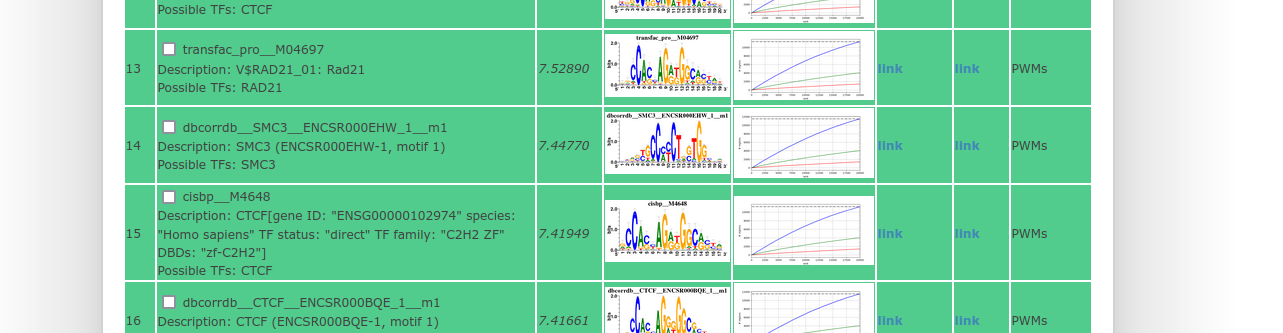
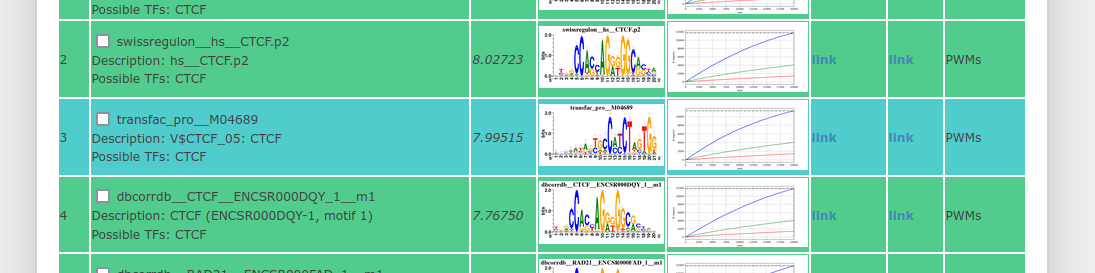

However, this is not very surprising when you know that cohesin, the protein complex of which SMC3 is a part, can bind at the same enhancers as CTCF. They work together to form chromatin loops.

In [50]:
cd ..
mkdir -p i-cisTarget
cd i-cisTarget

Genes associated with the candidate target regions for motif 14, the first ranked SMC3 motif.

In [97]:
cut -f 3 i-cisTarget_SMC3_candidateTargetGenes.txt | sort -u > iCisTarget.cand.genes
head iCisTarget.cand.genes

A2M
A2ML1
AAAS
AADAC
AADACL4
AADAT
AAGAB
AAK1
AANAT
AARD


In [149]:
wc -l iCisTarget.cand.genes

7532 iCisTarget.cand.genes


Again, many candidate regions distributed over the entire genome, but only half the number of peaks. So, the SMC3 motif explains only part of the peaks. Is the other half CTCF-associated? Or are there more peaks per gene, as in the peak calling image in IGV for the MXD1 gene above?

Downloading the bed file with candidate regions for the first CTCF motif (homer__ATAGTGCCACCTGGTGGCCA_CTCF).

In [9]:
wc -l i-cisTarget_CTCF_firstMotif_candidateTargetGenes.txt

11910 i-cisTarget_CTCF_firstMotif_candidateTargetGenes.txt


More genes, but still less than the number of peaks.

In [10]:
comm -12 <(cut -f 3 i-cisTarget_CTCF_firstMotif_candidateTargetGenes.txt | sort -u) iCisTarget.cand.genes | wc -l

7031


Many in common though.

### GREAT: Linking peaks to genes and GO terms

In [107]:
cd ..
mkdir -p GREAT
cd GREAT

A distance of 50 kb was allowed between peak and gene.

In [109]:
head 20221117-public-4.0.4-sUxIm4-hg38-all-gene.txt

# GREAT version 4.0.4	Species assembly: hg38	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 50000 bp max extension, curated regulatory domains included
A1BG	unnamed (+5945), unnamed (+24262)
A2ML1	unnamed (-41872)
A3GALT2	unnamed (-46853), unnamed (-43420), unnamed (-42412), unnamed (-29273), unnamed (-26068), unnamed (+22237), unnamed (+25405)
A4GALT	unnamed (+32810), unnamed (+38882), unnamed (+45216)
AAAS	unnamed (-3333), unnamed (-2441), unnamed (+1)
AACS	unnamed (-109), unnamed (+4951)
AADAC	unnamed (+25107)
AADACL4	unnamed (+14613)
AADAT	unnamed (-48640), unnamed (-19562), unnamed (+310), unnamed (+42265)


In [111]:
cat 20221117-public-4.0.4-sUxIm4-hg38-all-gene.txt | wc -l

15920


More genes than peaks, interesting...

In [163]:
cd ..

### Comparing i-CisTarget and GREAT gene candidates

In [154]:
comm -12 ./i-cisTarget/iCisTarget.cand.genes <(cut -f 1 ./GREAT/20221117-public-4.0.4-sUxIm4-hg38-all-gene.txt | sort) > common.targets
head common.targets

A2ML1
AAAS
AADAC
AADACL4
AADAT
AAGAB
AAK1
AANAT
AARD
AASDHPPT


In [127]:
wc -l common.targets
wc -l ./i-cisTarget/iCisTarget.cand.genes

6038 common.targets
7532 ./i-cisTarget/iCisTarget.cand.genes


About 80 % of the i-CisTarget candidate genes are also in the GREAT output.

In [155]:
cd GREAT

In [158]:
grep "GO Biological Process" greatExportAll.tsv | grep -v '#' | cut -f 3

neuron differentiation
central nervous system development
neuron development
regulation of nervous system development
negative regulation of transcription from RNA polymerase II promoter
RNA processing
head development
brain development
regulation of neurogenesis
regulation of cell development
single-organism cellular localization
neuron projection development
macromolecule catabolic process
regulation of neuron differentiation
animal organ morphogenesis
embryo development
transcription from RNA polymerase II promoter
regulation of transferase activity
cellular macromolecule catabolic process
regulation of anatomical structure morphogenesis
regulation of cellular localization
chromatin organization
cellular component morphogenesis
cell morphogenesis
cell projection morphogenesis
cell part morphogenesis
single-organism membrane organization
regulation of cell projection organization
peptidyl-amino acid modification
neuron projection morphogenesis
negative regulation of developmental pro

regulation of cellular catabolic process
regulation of axonogenesis
gland development
regulation of system process
positive regulation of protein kinase activity
reproductive structure development
cell fate commitment
central nervous system neuron differentiation
actin filament-based process
regulation of ion transmembrane transport
multicellular organismal reproductive process
negative regulation of transport
multicellular organism reproduction
developmental growth
heterocycle catabolic process
rhythmic process
morphogenesis of an epithelium
immune effector process
regulation of Wnt signaling pathway
multi-organism reproductive process
immune system development
response to peptide
nucleobase-containing compound catabolic process
methylation
regulated exocytosis
proteasomal protein catabolic process
response to peptide hormone
cognition
regulation of intracellular protein transport
cell projection assembly
regulation of hemopoiesis
cellular nitrogen compound catabolic process
post-tran

response to hypoxia
regulation of synapse organization
energy derivation by oxidation of organic compounds
regulation of protein binding
regulation of hormone secretion
cellular response to unfolded protein
cation homeostasis
RNA localization
establishment of vesicle localization
heart morphogenesis
nucleobase-containing compound transport
ribonucleoside triphosphate metabolic process
protein targeting to membrane
microtubule-based movement
monocarboxylic acid metabolic process
in utero embryonic development
nuclear-transcribed mRNA catabolic process, nonsense-mediated decay
purine ribonucleoside triphosphate metabolic process
regulation of mRNA metabolic process


In the introduction was stated that CTCF and cohesin (incl. SMC3) cooperate to form chromatin loops, which are associated with potential active transcription. This is something that might be reflected here. This chip-seq was performed for an in vitro differentiated human neural cell. So, it is not a surprise to find GO process terms linked to the differentiation of neurons and the development of the central nervous system and the brain at top.

In [ ]:
cd ..

### Comparison of GREAT targets with STRING annotations

Downloading the protein annotations of the 101 most significant interactions.

In [164]:
cut -f 1 SMC3_string_protein_annotations.tsv | tail -n +2

AKAP9
ARID4A
ATAD5
ATM
BPTF
BRCA1
BRCA2
BRD4
BUB1
BUB3
CBX3
CCNB1
CCNB2
CDCA5
CDK1
CHTF18
CTCF
DDX11
DSCC1
EID3
ESCO1
ESCO2
ESPL1
GSG2
H2AFX
HDAC2
HDAC8
MAU2
MCM4
MCM5
MCM7
MDC1
MRE11A
MSH2
MSH6
MYC
NBN
NCAPD2
NCAPG
NCAPG2
NCAPH
NDC80
NDNL2
NIPBL
NSMCE1
NSMCE2
NSMCE4A
PAN3
PDS5A
PDS5B
PHF3
PHIP
PLK1
POLA1
POLE
PPP2CA
PPP2CB
PPP2R1A
PPP2R5A
PPP2R5D
PRRC2C
PTGDR
RAD21
RAD21L1
RAD50
REC8
RFC1
RNF8
SCAF11
SETD2
SETX
SGOL1
SGOL2
SMARCA5
SMC1A
SMC1B
SMC2
SMC3
SMC4
SMC5
SMC6
SPO11
STAG1
STAG2
STAG3
SYCE1
SYCE2
SYCP1
SYCP2
SYCP3
TERF1
TEX12
TIMELESS
TINF2
TOP2A
TOP2B
TP53BP1
WAPAL
WDHD1
ZNF143
ZNF638


In [167]:
comm -12 <(cut -f 1 SMC3_string_protein_annotations.tsv | tail -n +2) \
         <(cut -f 1 ./GREAT/20221117-public-4.0.4-sUxIm4-hg38-all-gene.txt | sort) > string.common.txt
cat string.common.txt

AKAP9
ARID4A
ATAD5
ATM
BPTF
BRCA1
BRCA2
BRD4
BUB1
BUB3
CBX3
CCNB1
CCNB2
CDCA5
CDK1
CHTF18
CTCF
DDX11
DSCC1
EID3
ESCO1
ESCO2
ESPL1
H2AFX
HDAC2
HDAC8
MAU2
MCM4
MCM5
MCM7
MDC1
MSH2
MSH6
MYC
NBN
NCAPD2
NCAPG
NCAPG2
NCAPH
NDC80
NIPBL
NSMCE1
NSMCE2
NSMCE4A
PAN3
PDS5A
PDS5B
PHF3
PHIP
PLK1
POLA1
POLE
PPP2CA
PPP2CB
PPP2R1A
PPP2R5A
PPP2R5D
PRRC2C
PTGDR
RAD21
RAD21L1
RFC1
RNF8
SCAF11
SETD2
SETX
SMARCA5
SMC1A
SMC1B
SMC2
SMC3
SMC4
SMC5
SMC6
SPO11
STAG1
STAG2
STAG3
SYCE1
SYCP3
TERF1
TIMELESS
TINF2
TOP2A
TOP2B
TP53BP1
WDHD1
ZNF143
ZNF638


In [169]:
wc -l string.common.txt

89 string.common.txt


Almost 90 % in common. Not much new here.

### Conclusion

This SMC3 chip-seq dataset emphasised in different ways that SMC3 and CTCF are an important interacting protein pair binding at the same enhancer sequences. Both de novo and iCisTarget motif identifications point this out by reporting mainly CTCF motifs. Linking GO terms to the candidate genes via GREAT also hints that DNA loops maintained by SMC3-CTCF complexes indeed are correlated with the expression of genes. This was deduced from the observation that the GO terms that were enriched in this chip-seq of a human embryonic neural cell, are associated with the differentiation of neurons and the development of the brain.